# Pre-Processing the Data 

In [2]:
# Import the necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load the dataset

data = pd.read_csv("D:\downloads\genres_v2.csv")
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1080\67221310.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\downloads\genres_v2.csv")


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

There are 22 columns and 42304 rows in the dataset. The full list of genres included in the CSV are Trap, Techno, Techhouse, Trance, Psytrance, Dark Trap, DnB (drums and bass), Hardstyle, Underground Rap, Trap Metal, Emo, Rap, RnB, Pop and Hiphop.

## Features meaning:-

### Acousticness:
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### Danceability:
Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### Energy:
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

### Instrumentalness:
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### Liveness:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### Speechiness:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Tempo:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### Valence:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [4]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [5]:
# Dropping the unwanted columns

# Columns:'title','Unnamed: 0','id','uri','track_href','analysis_url','type','song_name' 
# are the unwanted columns which doesnot contribute to the prediction of genre.

data = data.drop(['title','Unnamed: 0','id','uri','track_href','analysis_url','type','song_name'],axis=1)
print(data.columns)
data.head

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')


<bound method NDFrame.head of        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalne

In [6]:
# Checking for null values

data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

It is clear that there are no null values in the dataset.

#  Data Analysis

#### Exploratory Data Analysis :-
We analyse how all the features are related to each other and perform statistical tests on them.

In [7]:
# Displays the number of rows and columns

data.shape

(42305, 14)

So after removing the unwanted columns we are left with 14 columns and 42305 rows.

<Axes: xlabel='genre', ylabel='duration_ms'>

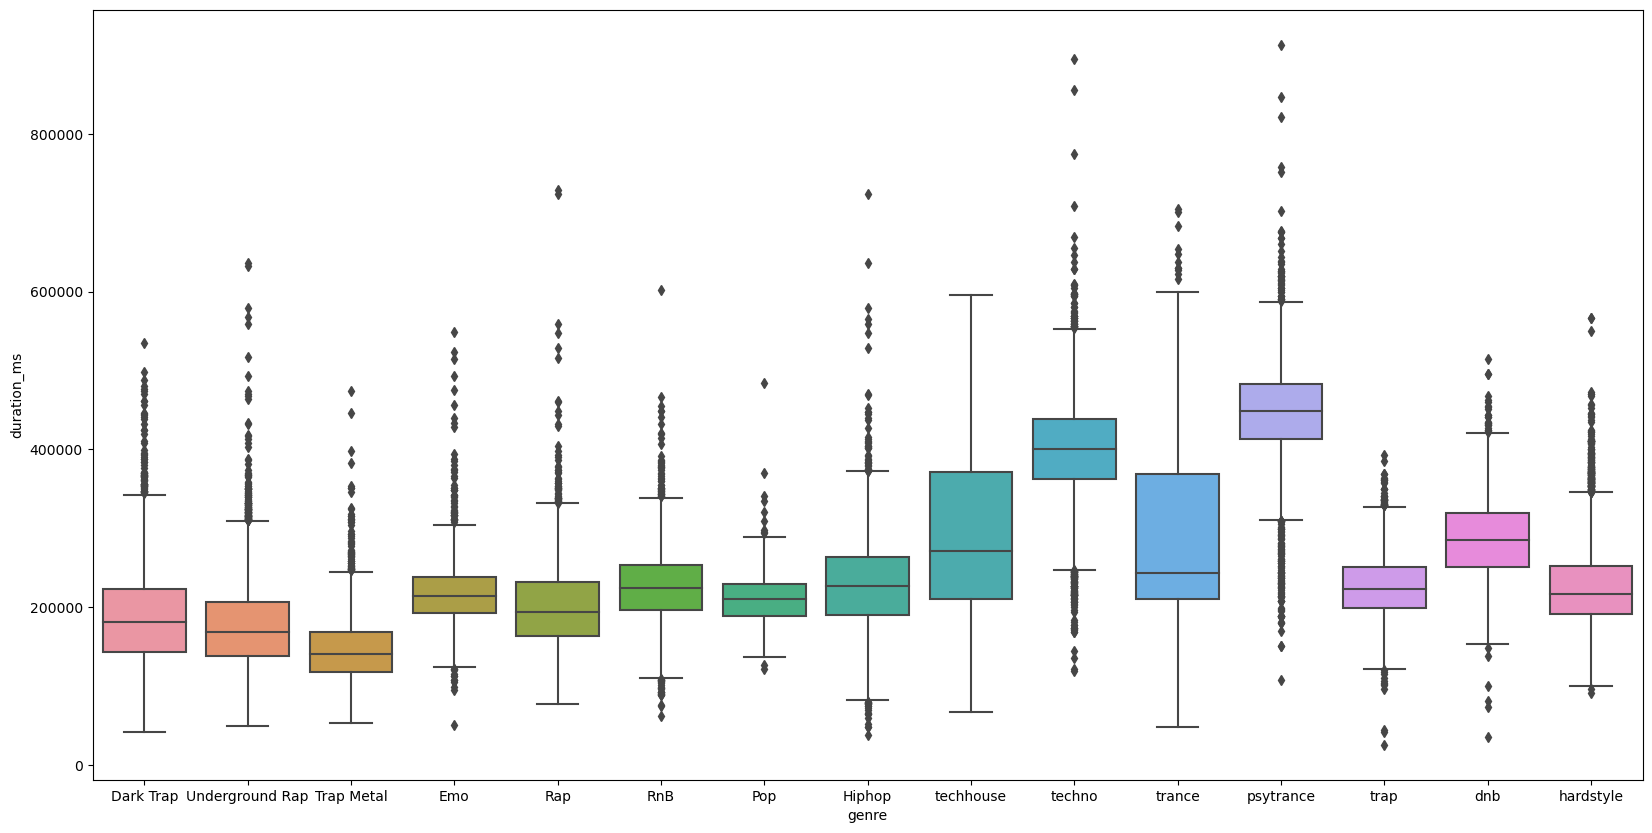

In [8]:
# Relation - duration and genre

plt.figure(figsize = (20, 10))
sns.boxplot(x = "genre", y = "duration_ms", data = data)

1. The median time duration of songs lying in trance genre is comparatively lower than those songs lying in techno genre.

2. Dispersion: the length of the boxes for trance and techno songs vary greatly. the time duration of trance songs is more dispersed.

<Axes: xlabel='genre', ylabel='time_signature'>

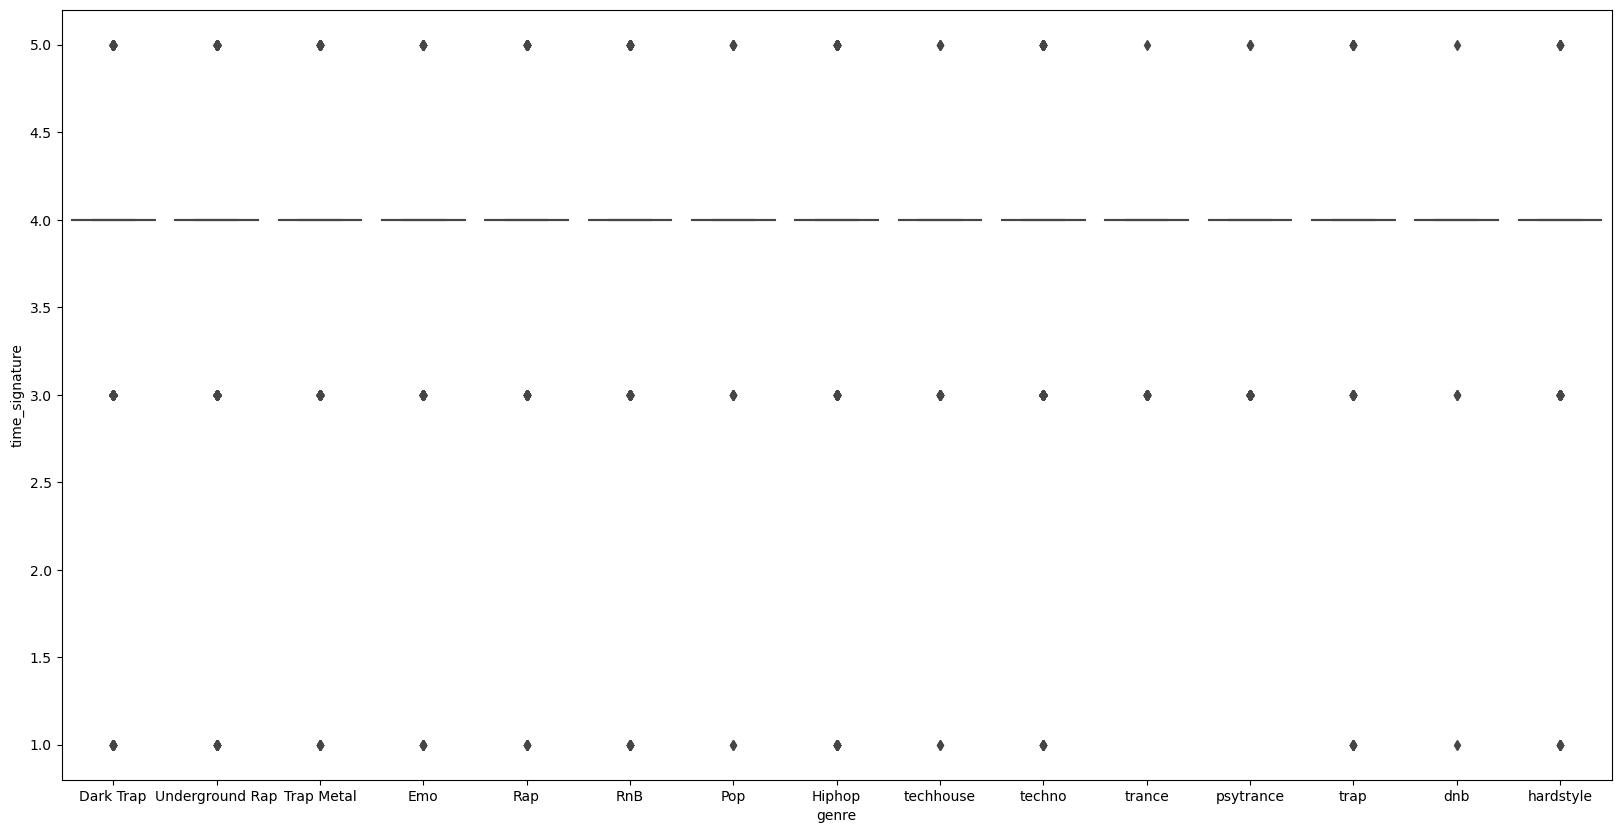

In [9]:
# Relation - time signature and genre

plt.figure(figsize = (20, 10))
sns.boxplot(x = "genre", y = "time_signature", data = data)

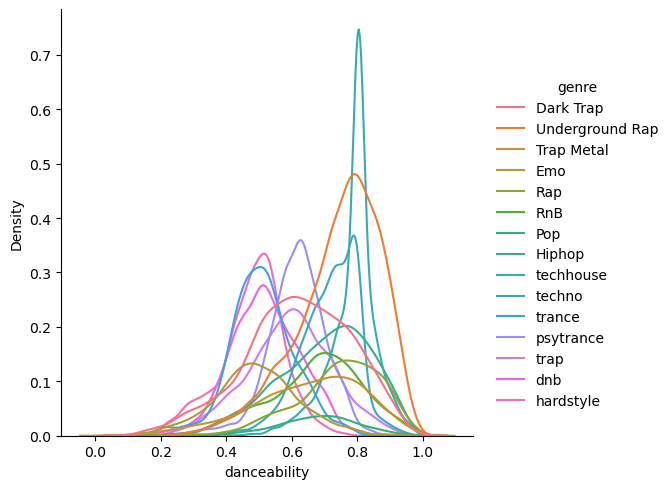

In [10]:
# Genre-wise distributions of columns

sns.displot(data = data, x = "danceability", hue = "genre", kind = "kde", legend = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1080\394779996.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 10))


<Figure size 1000x1000 with 0 Axes>

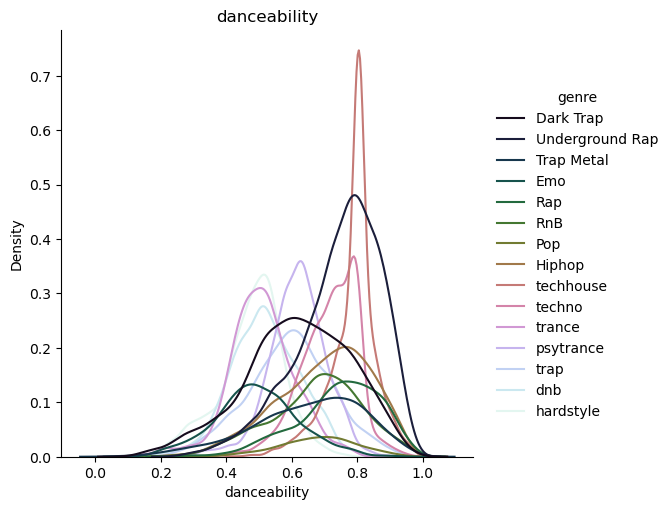

<Figure size 1000x1000 with 0 Axes>

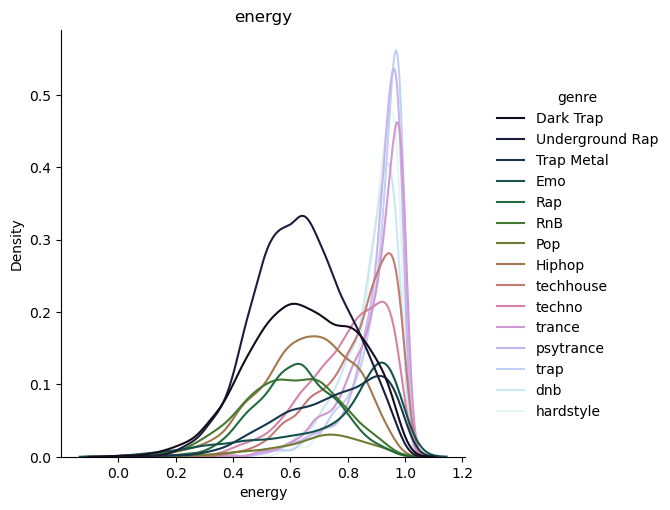

<Figure size 1000x1000 with 0 Axes>

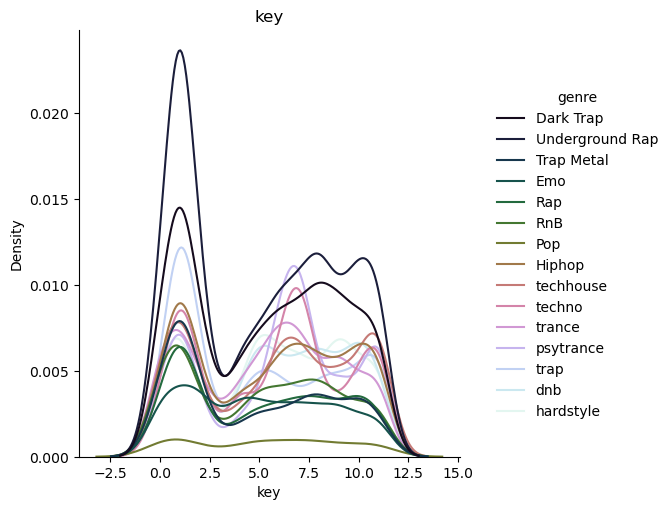

<Figure size 1000x1000 with 0 Axes>

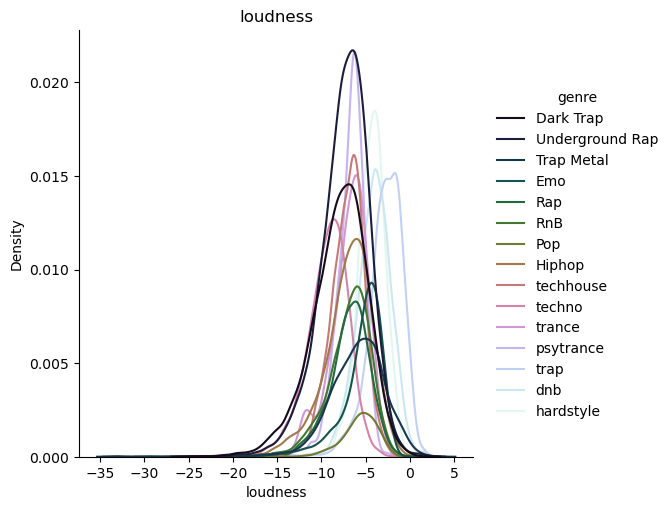

<Figure size 1000x1000 with 0 Axes>

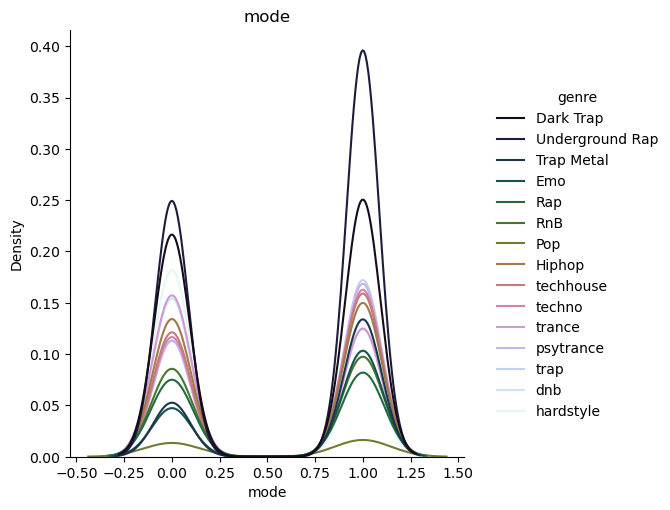

<Figure size 1000x1000 with 0 Axes>

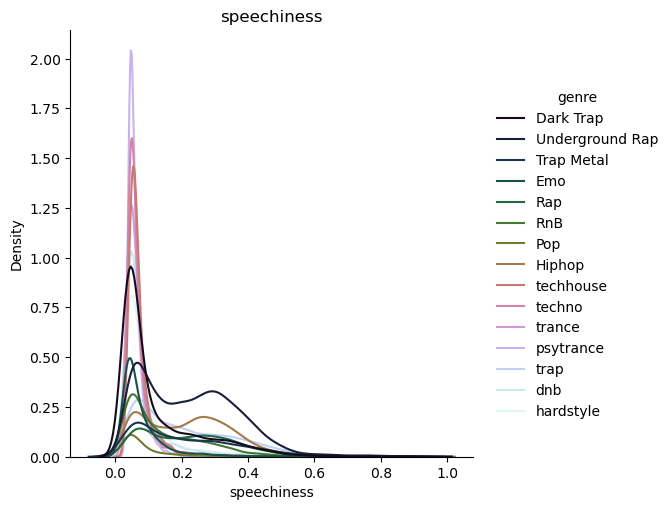

<Figure size 1000x1000 with 0 Axes>

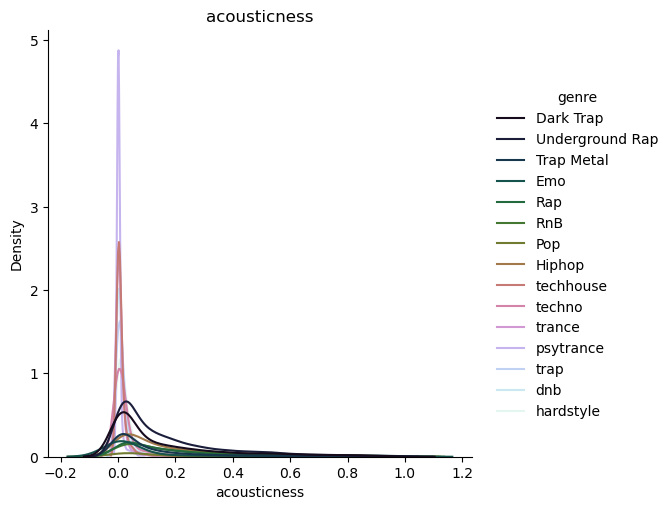

<Figure size 1000x1000 with 0 Axes>

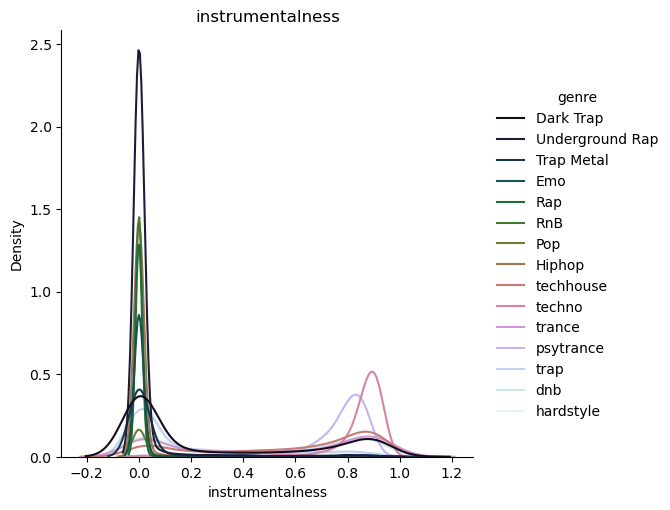

<Figure size 1000x1000 with 0 Axes>

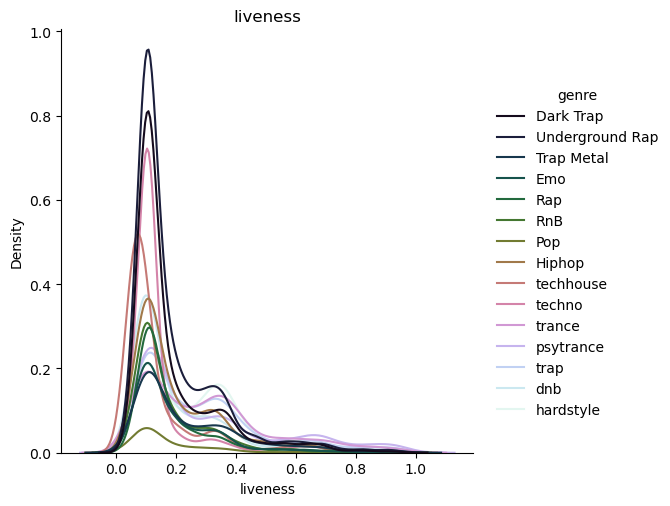

<Figure size 1000x1000 with 0 Axes>

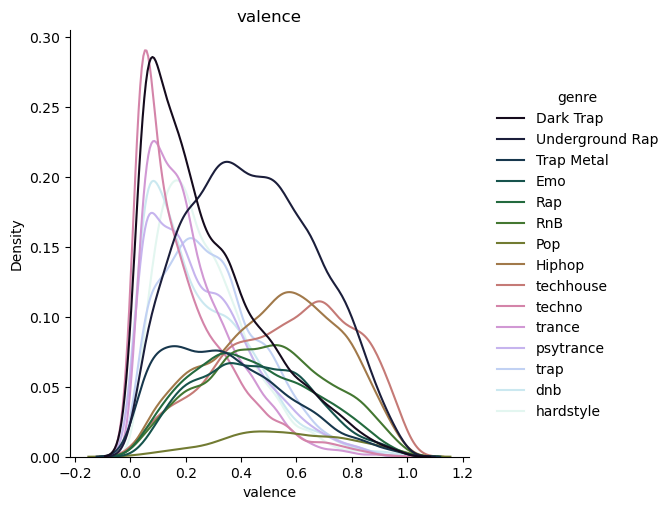

<Figure size 1000x1000 with 0 Axes>

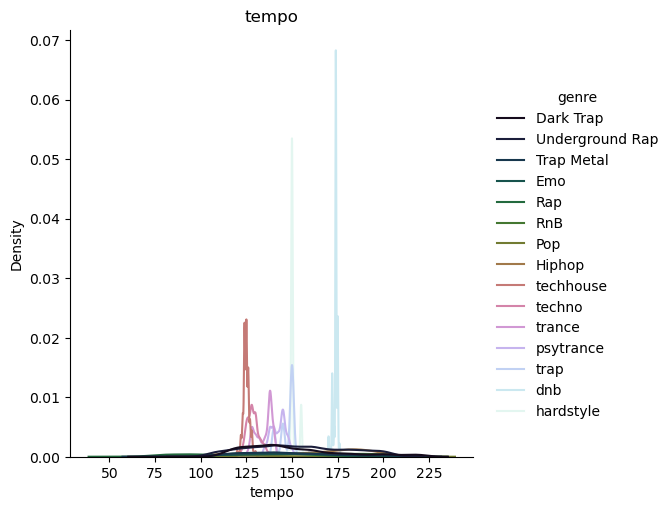

<Figure size 1000x1000 with 0 Axes>

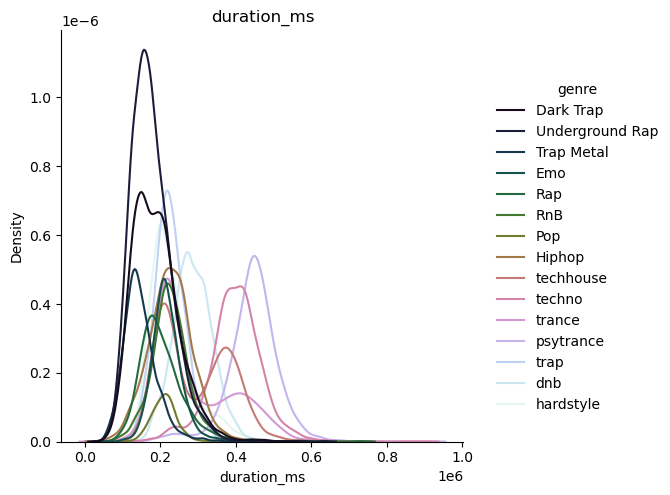

<Figure size 1000x1000 with 0 Axes>

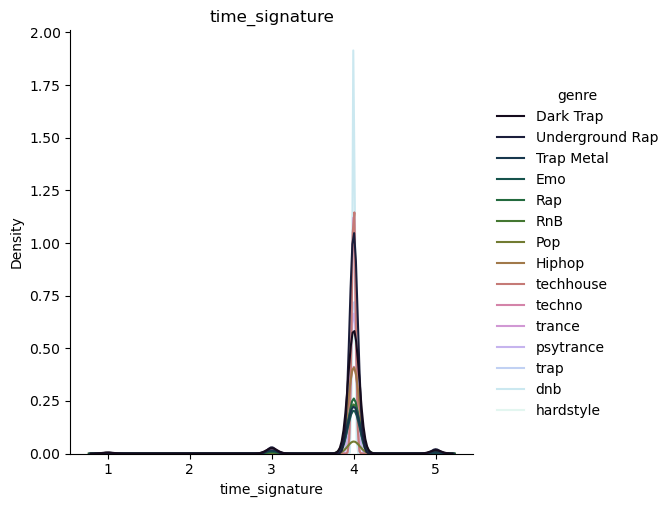

In [11]:
sns.color_palette("flare", as_cmap = True)
for column in data.columns[:-1]:
    plt.figure(figsize = (10, 10))
    sns.displot(data = data, x = column, hue = "genre", kind = "kde", legend = True, palette = "cubehelix")
    plt.title(f"{column}")

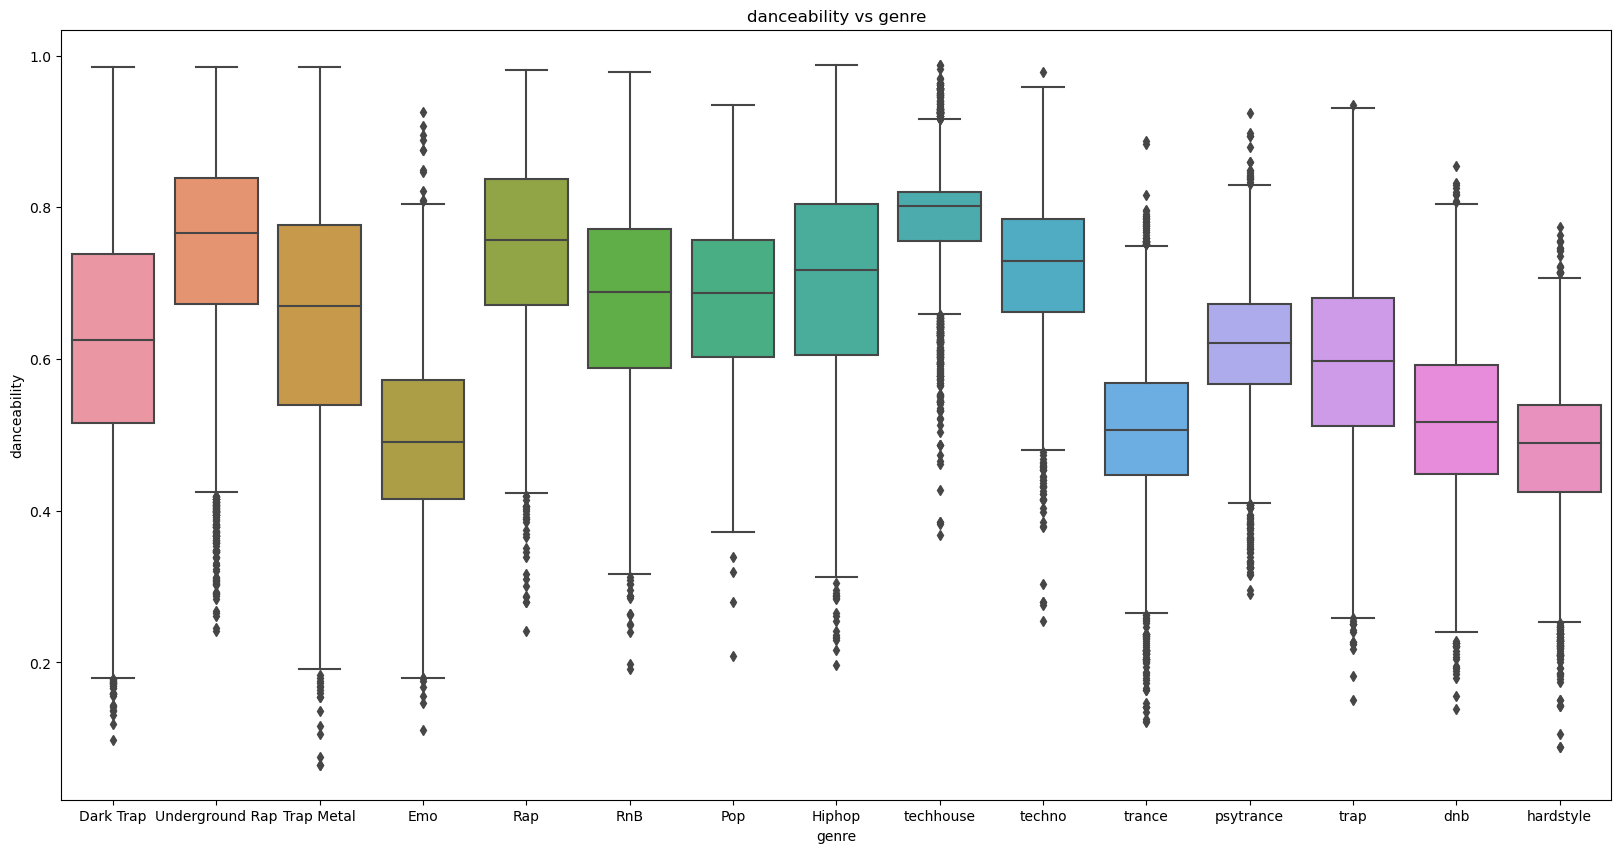

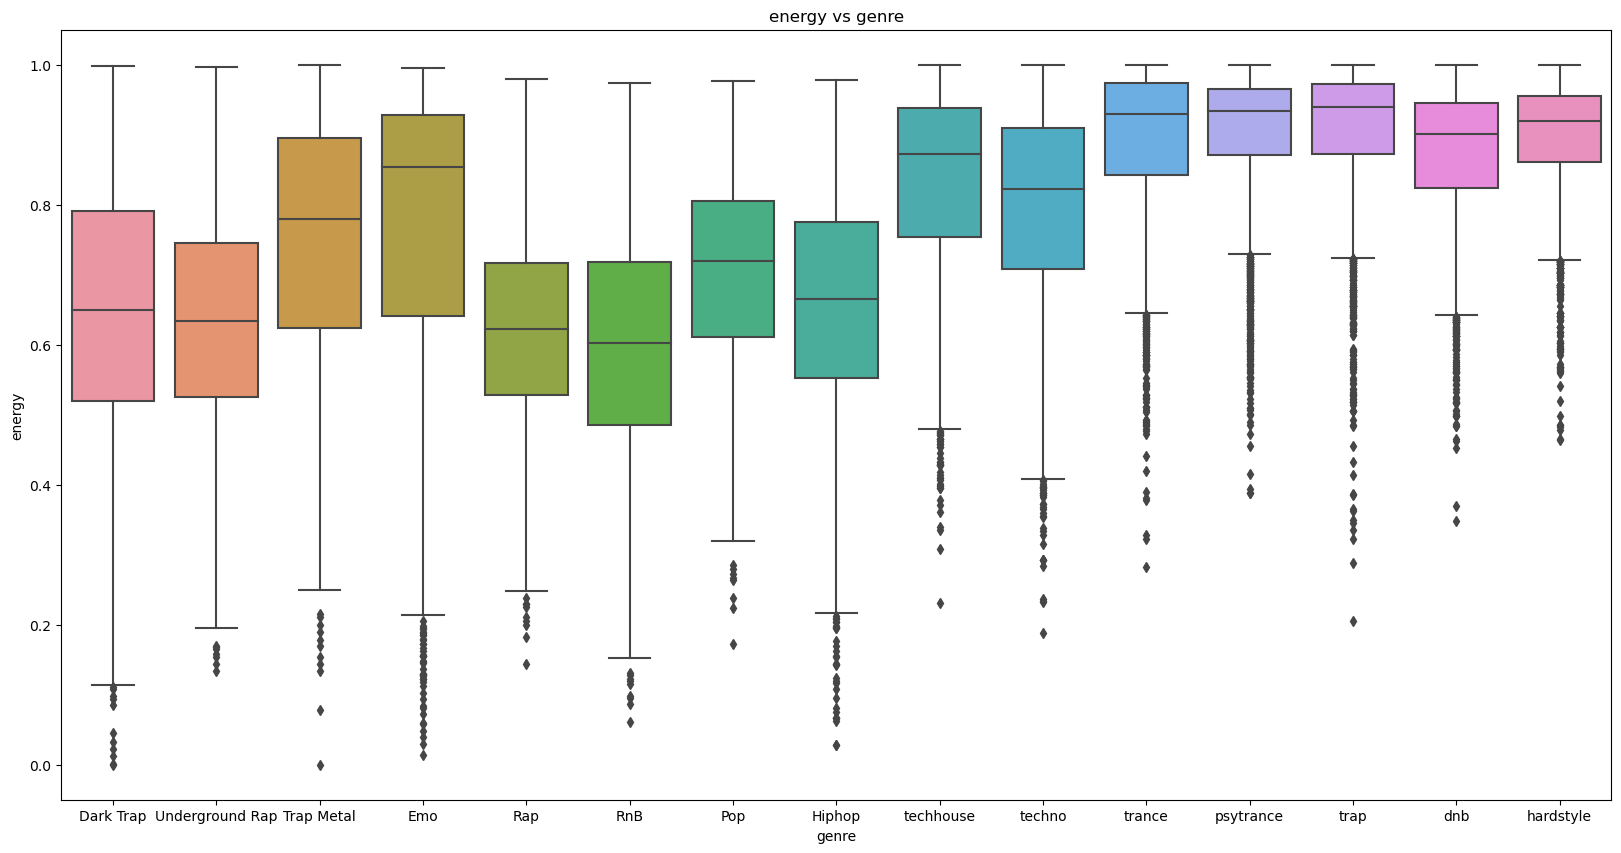

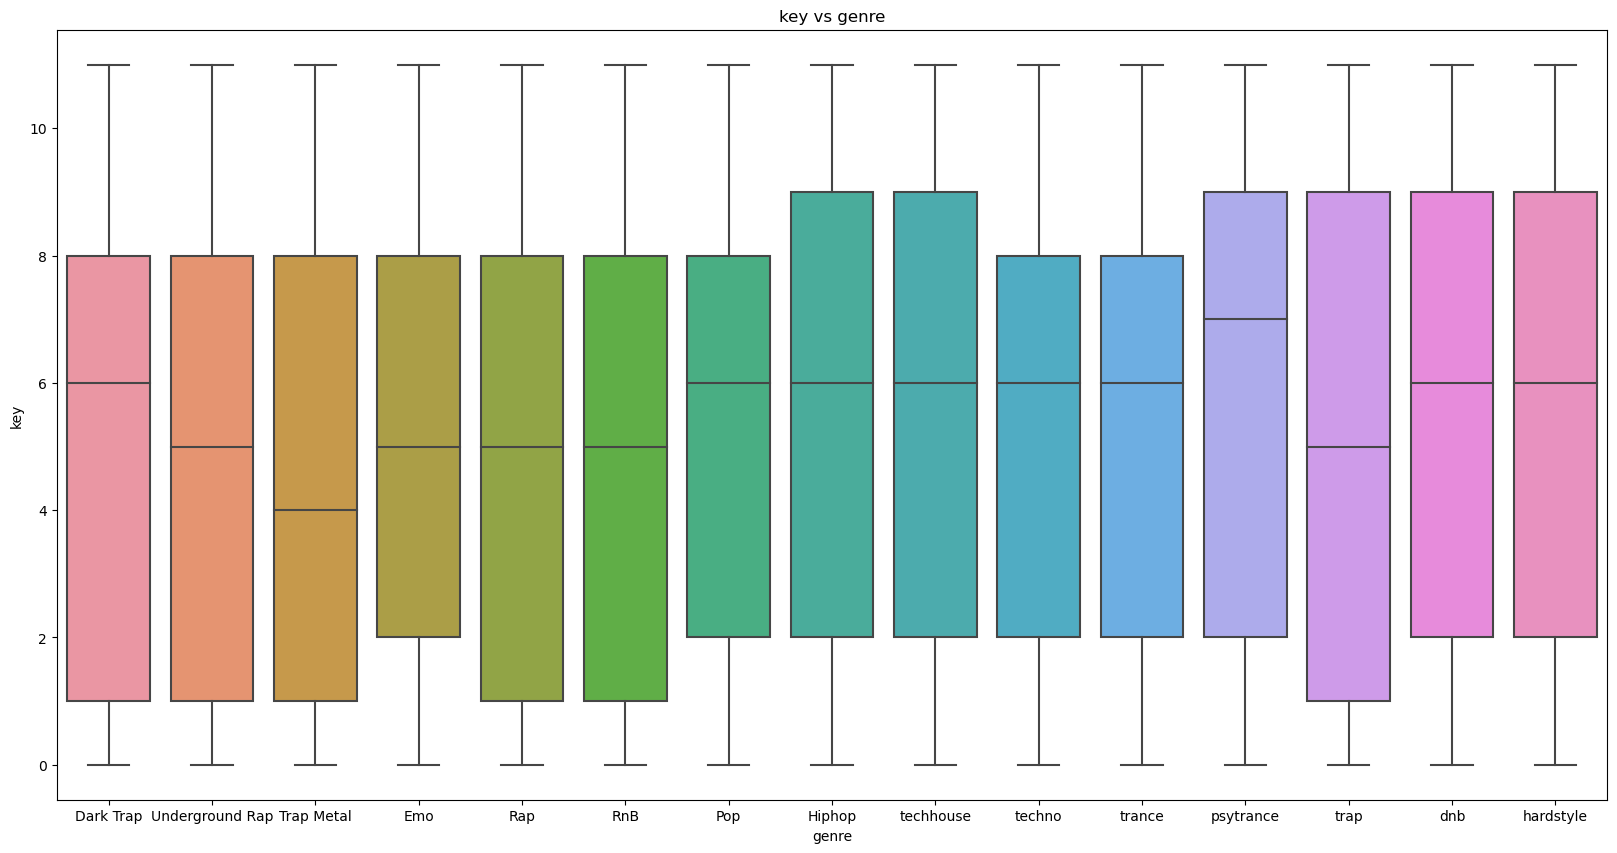

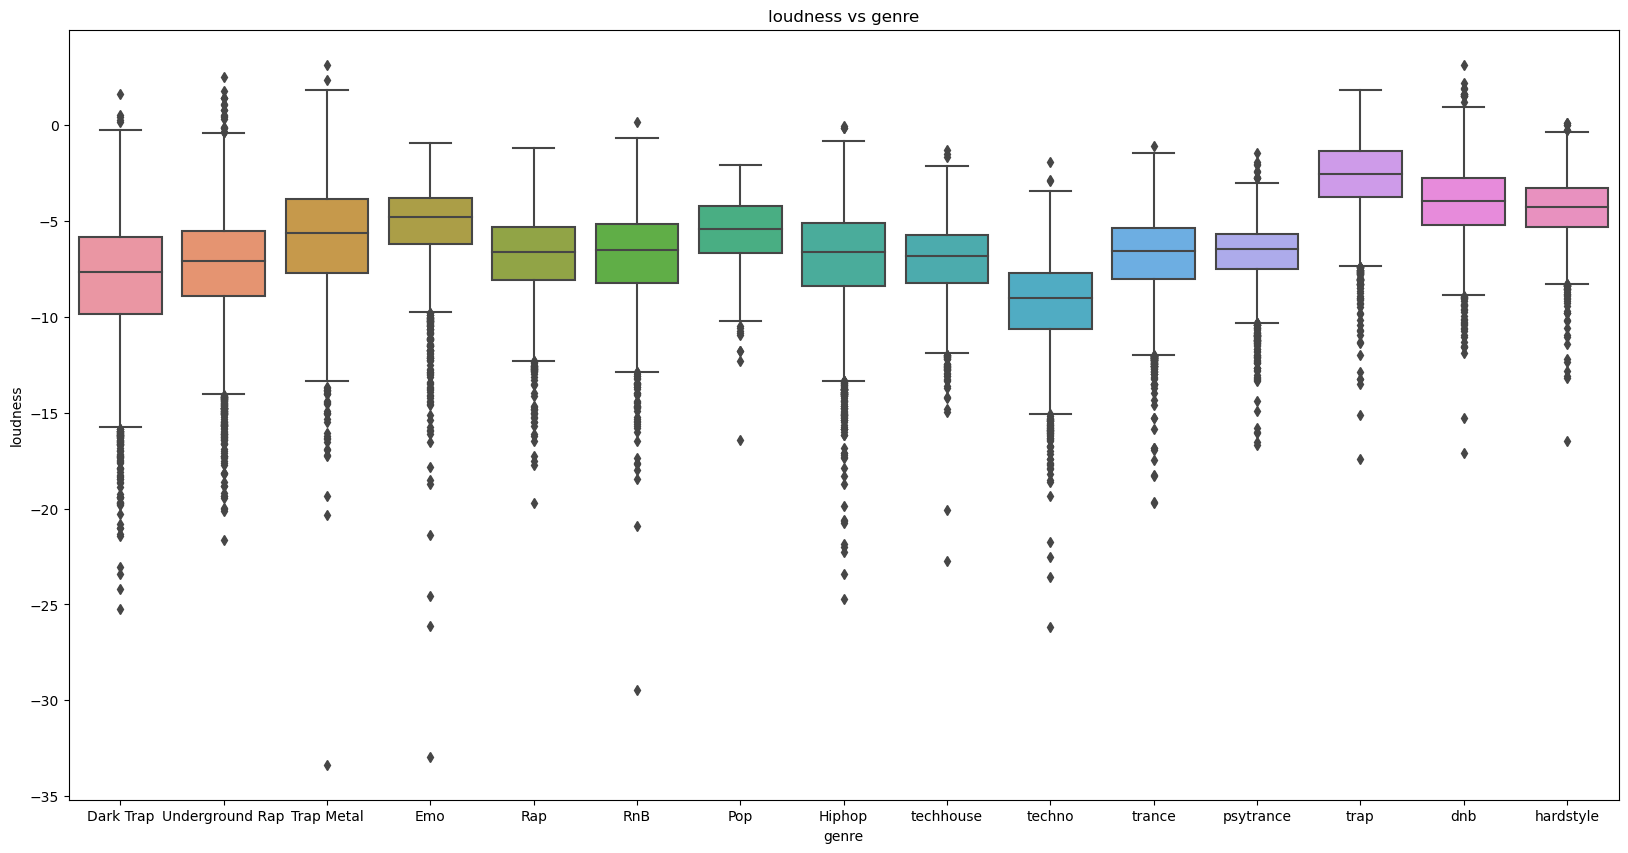

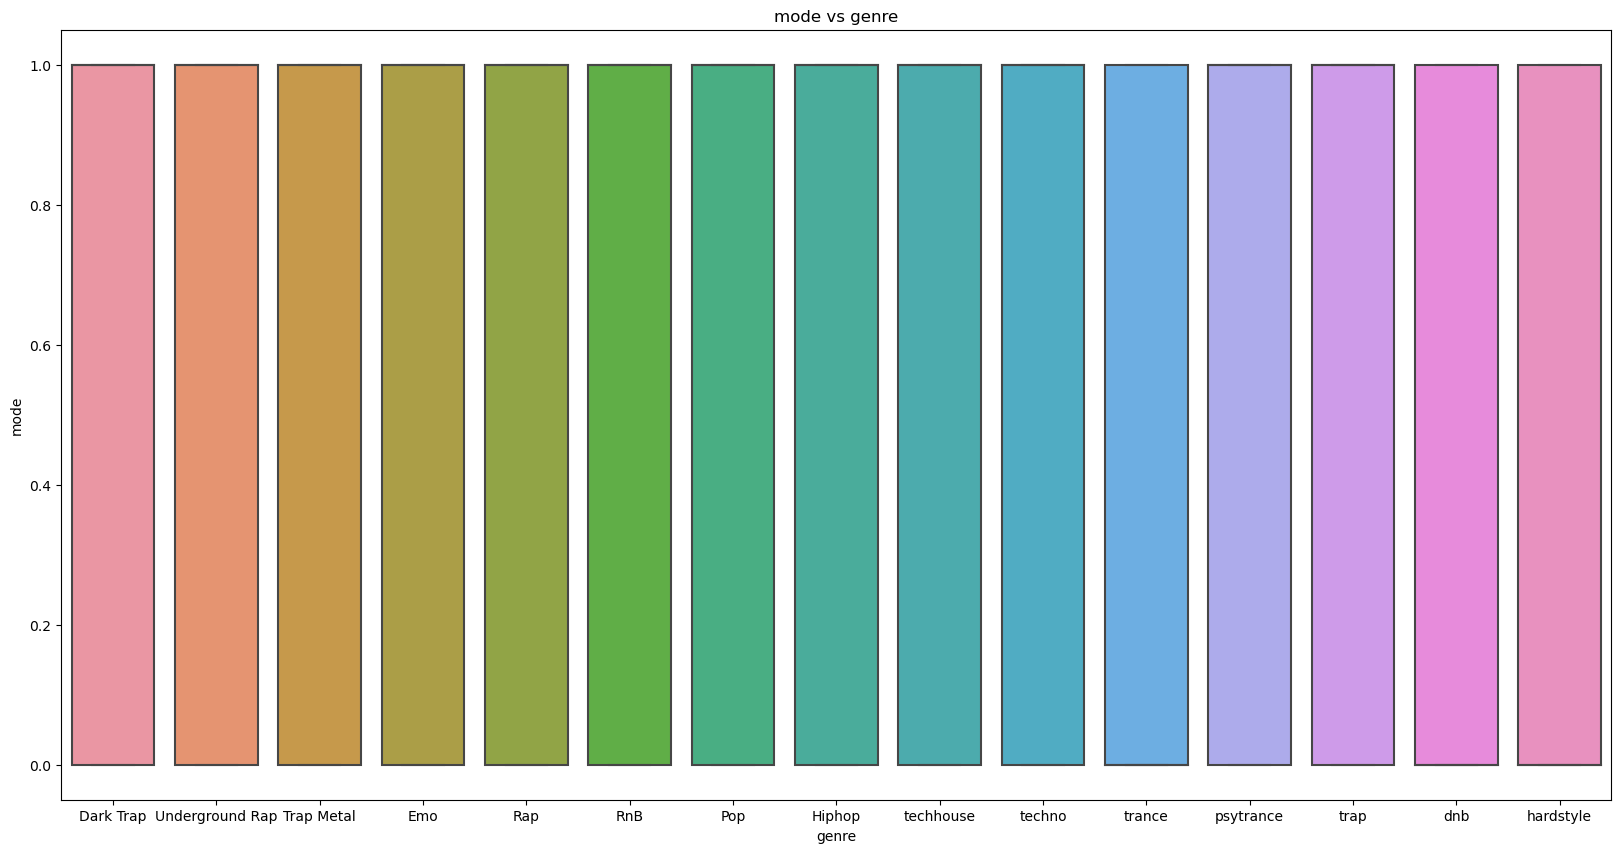

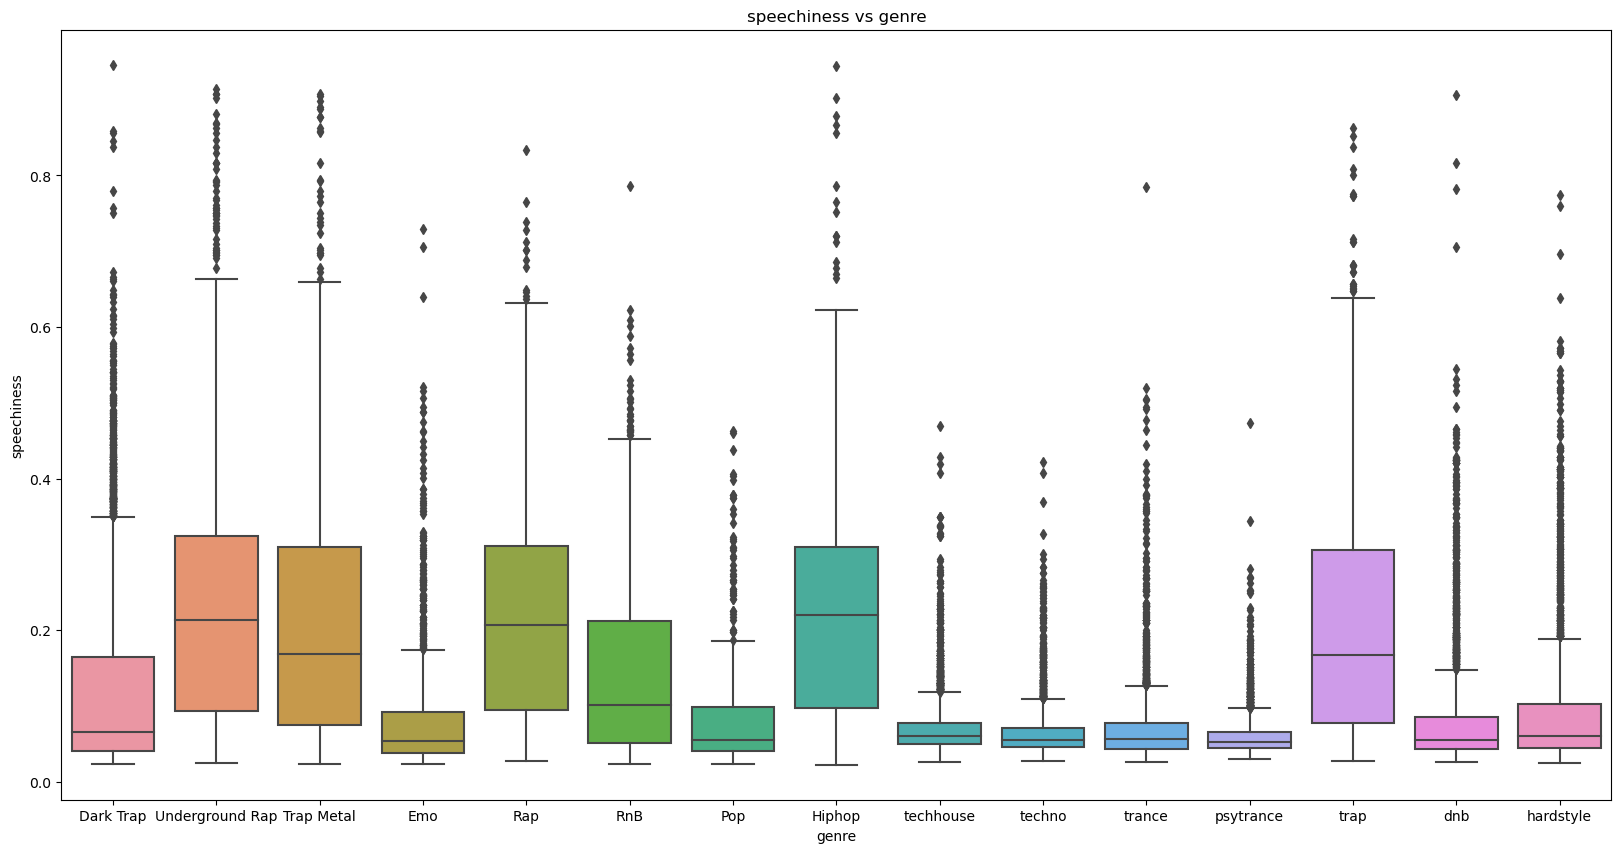

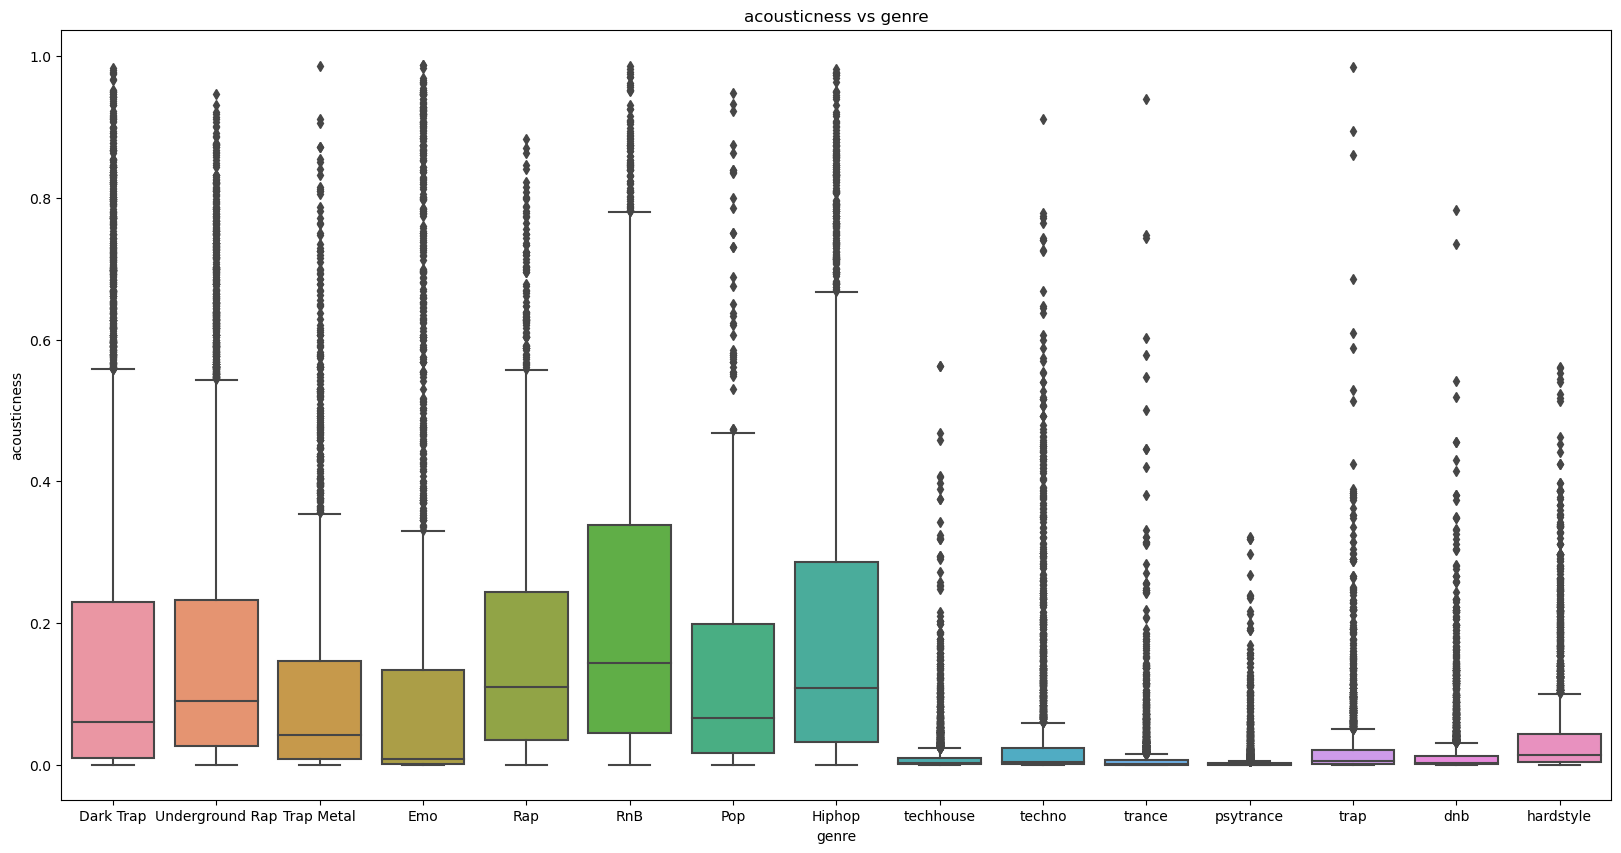

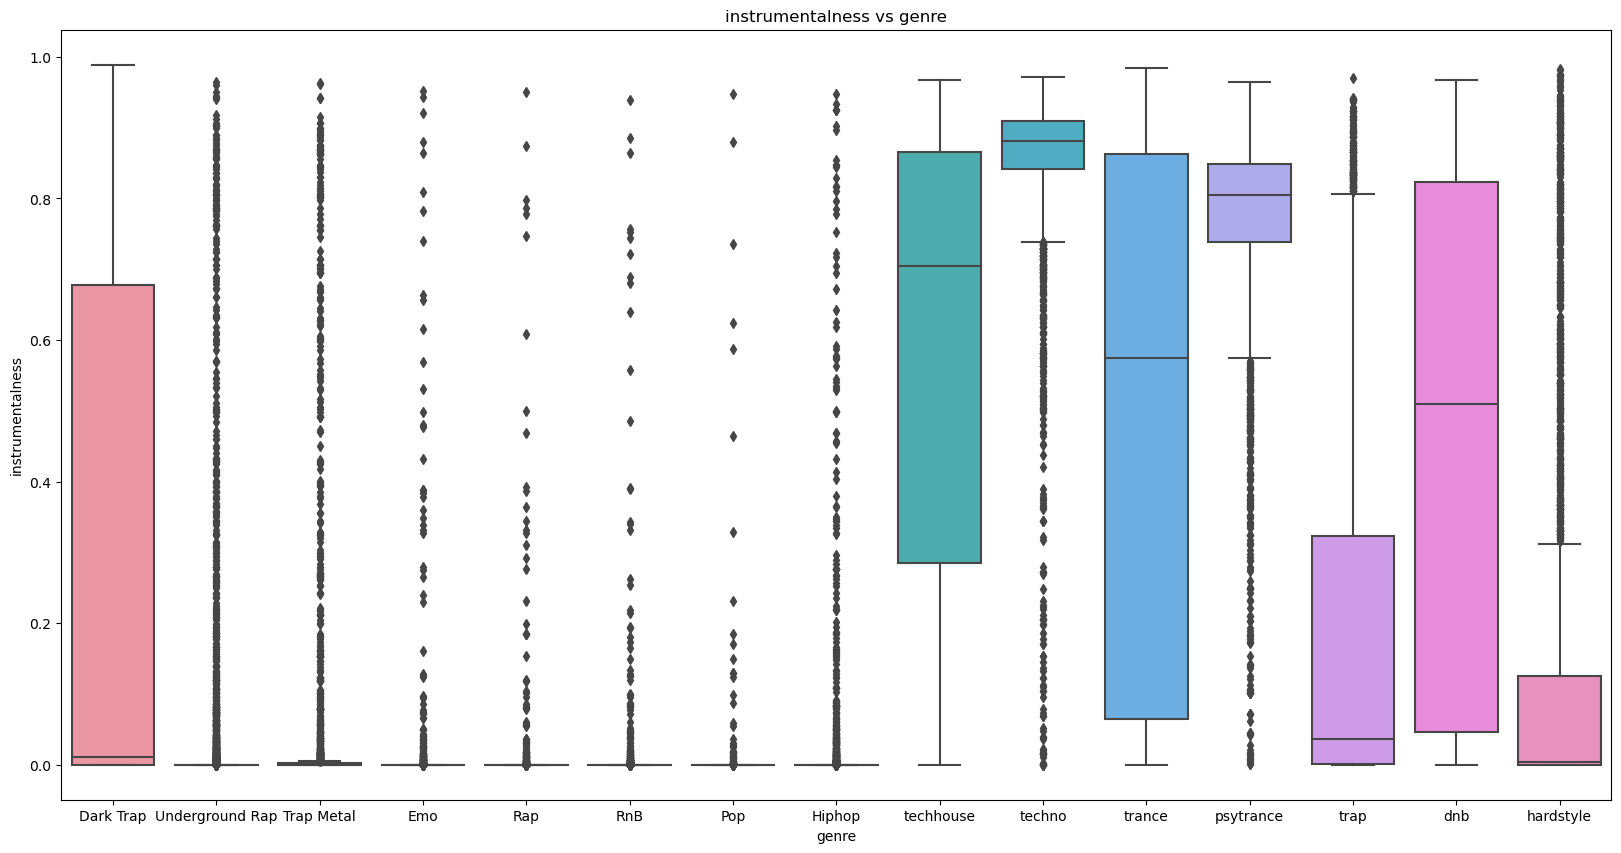

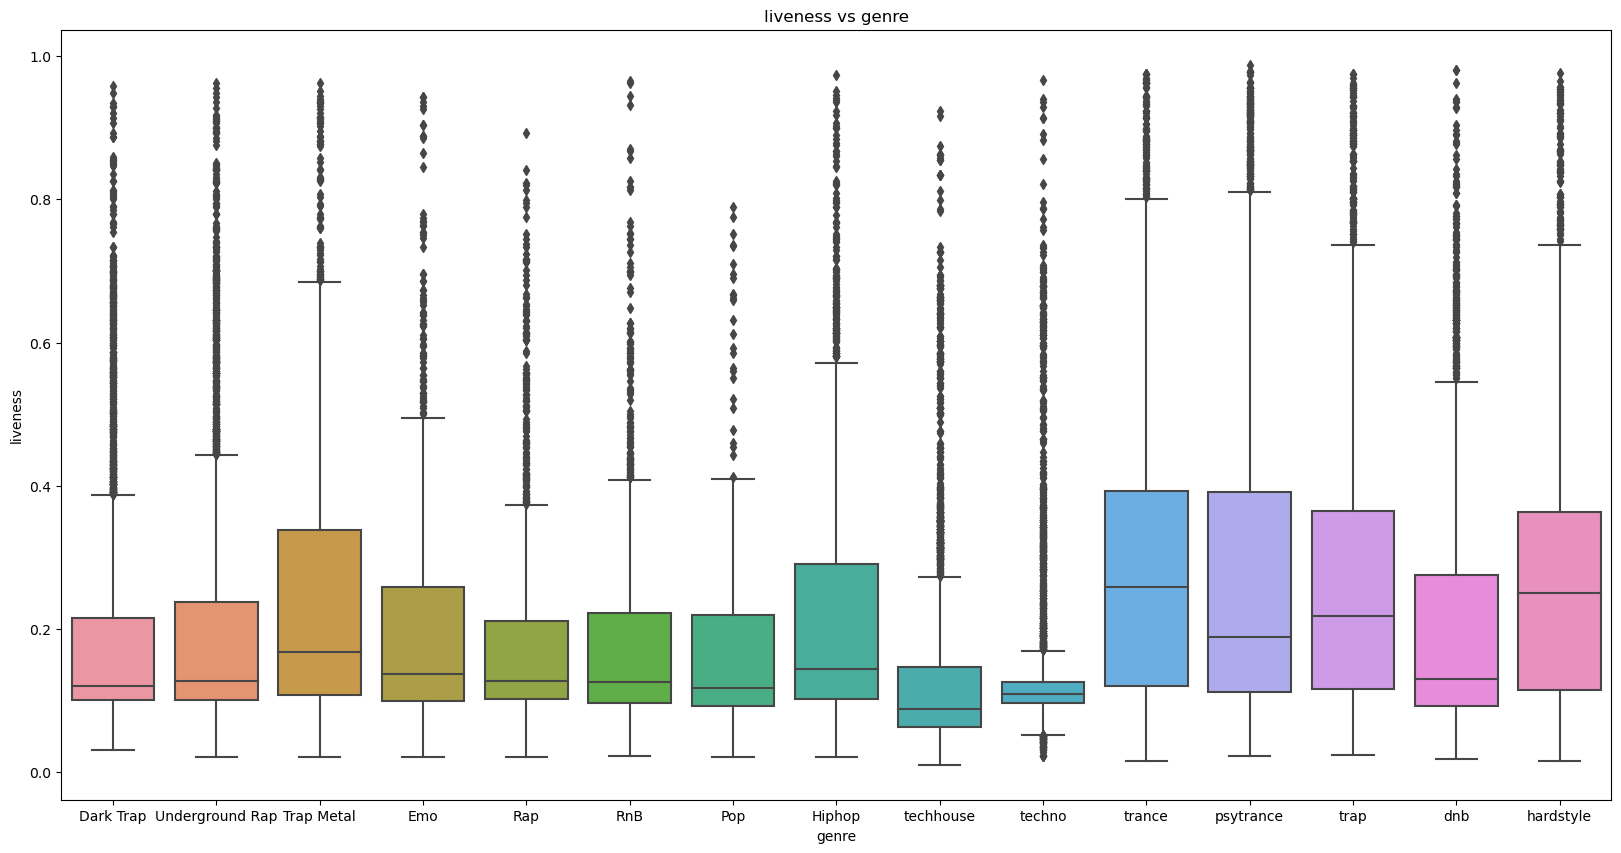

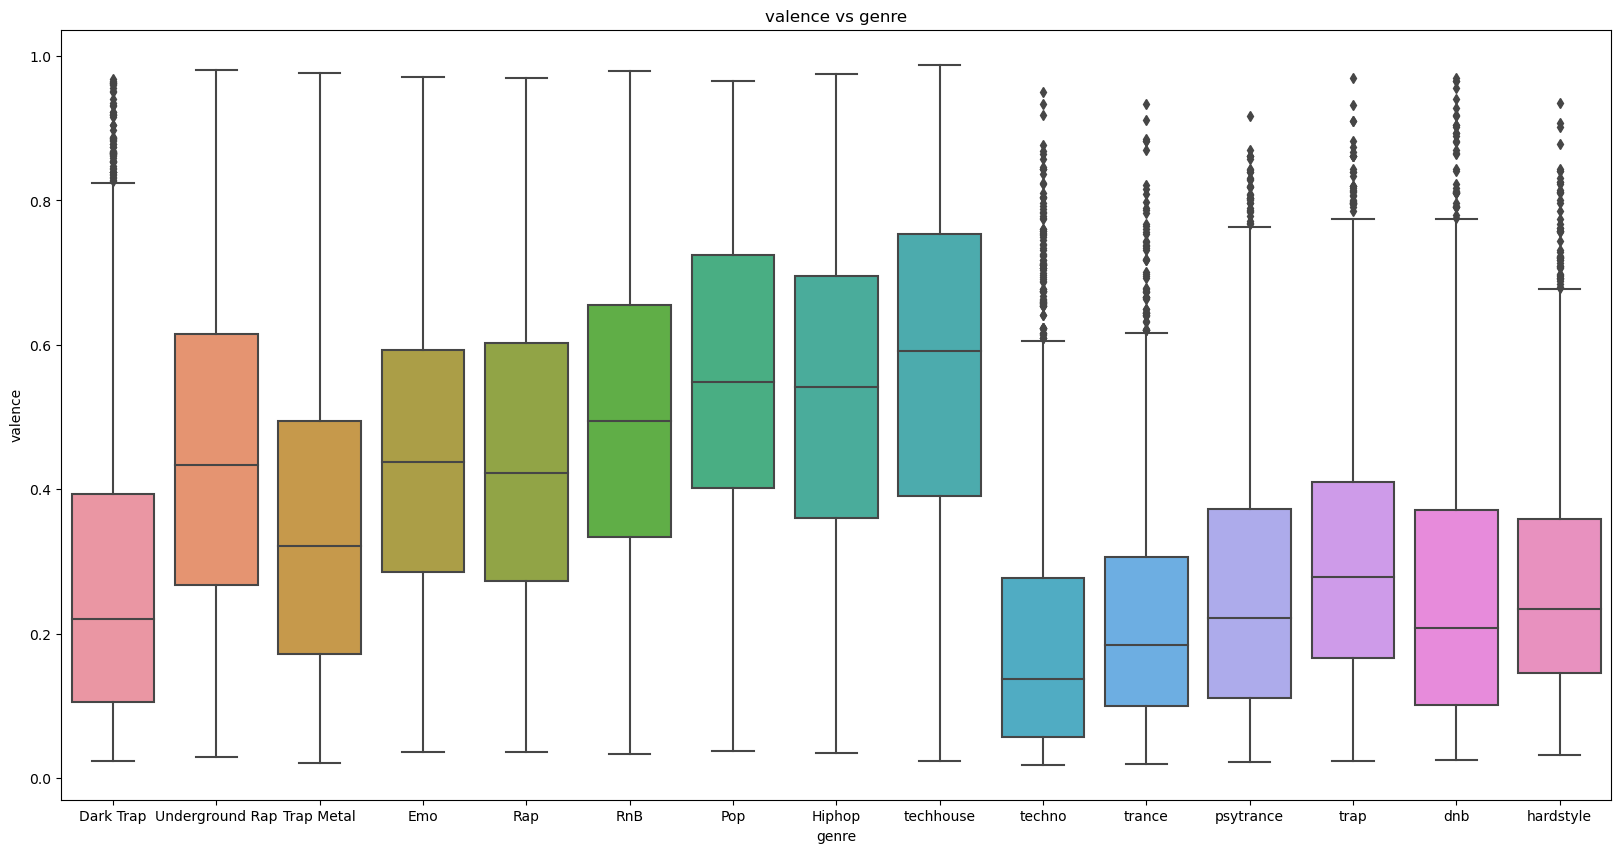

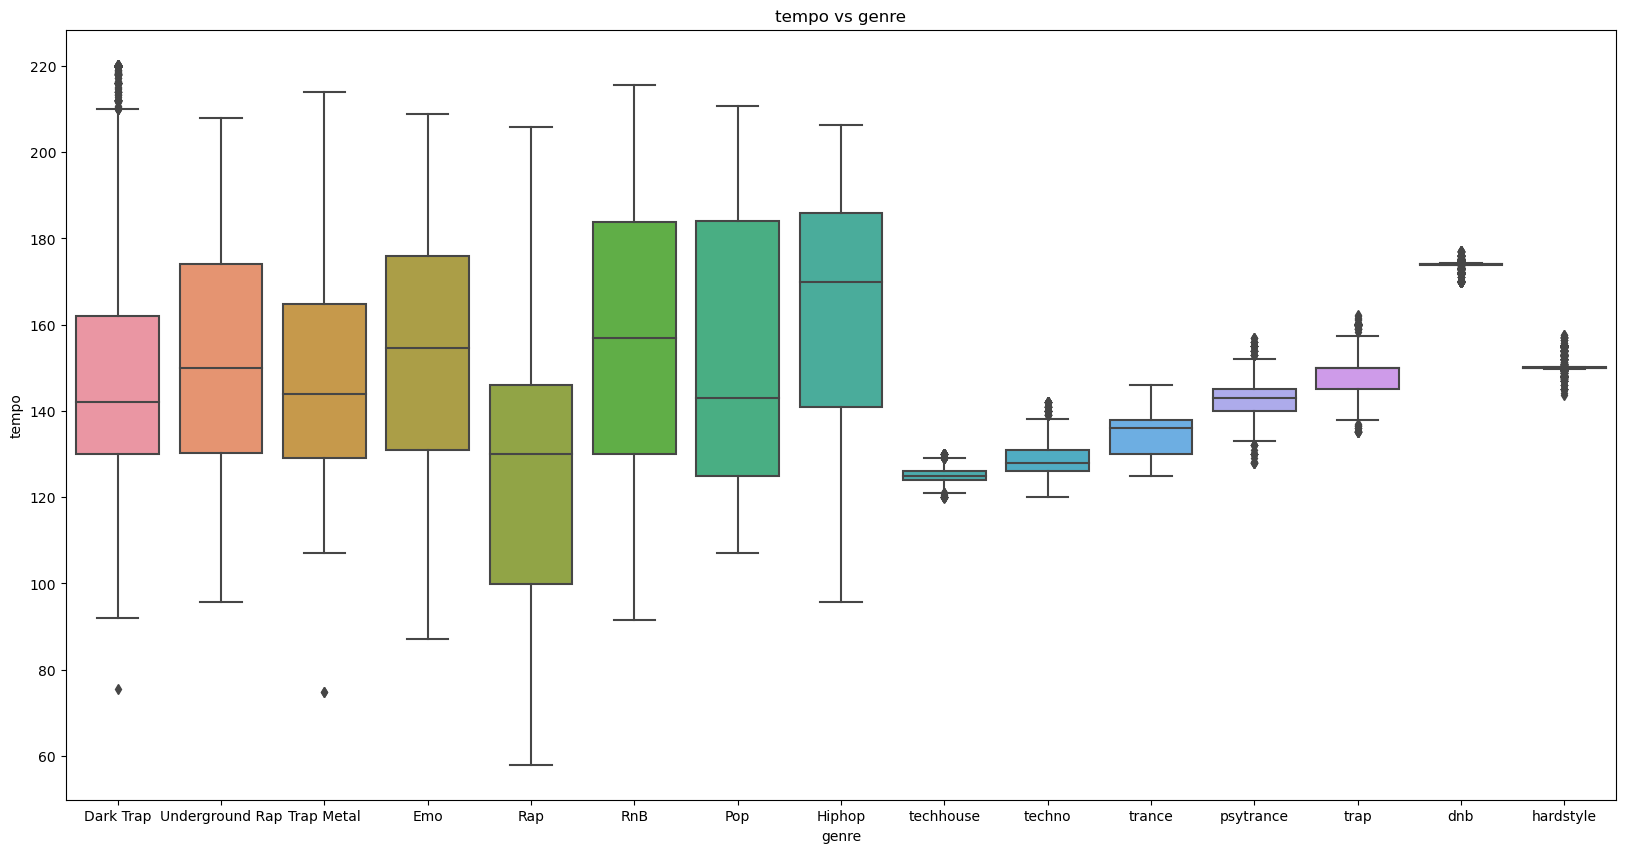

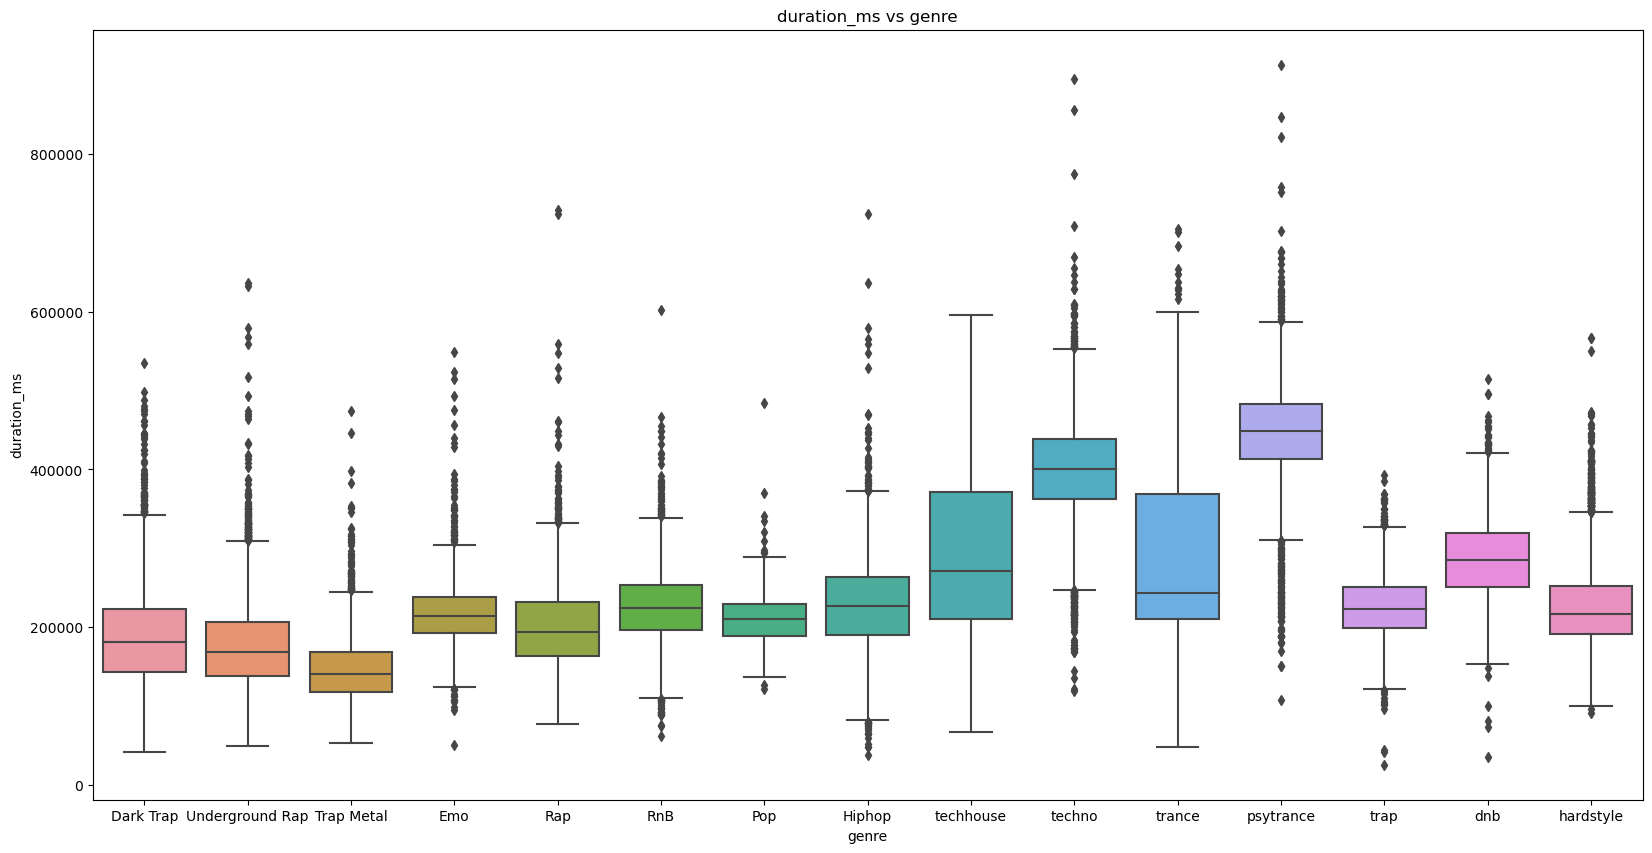

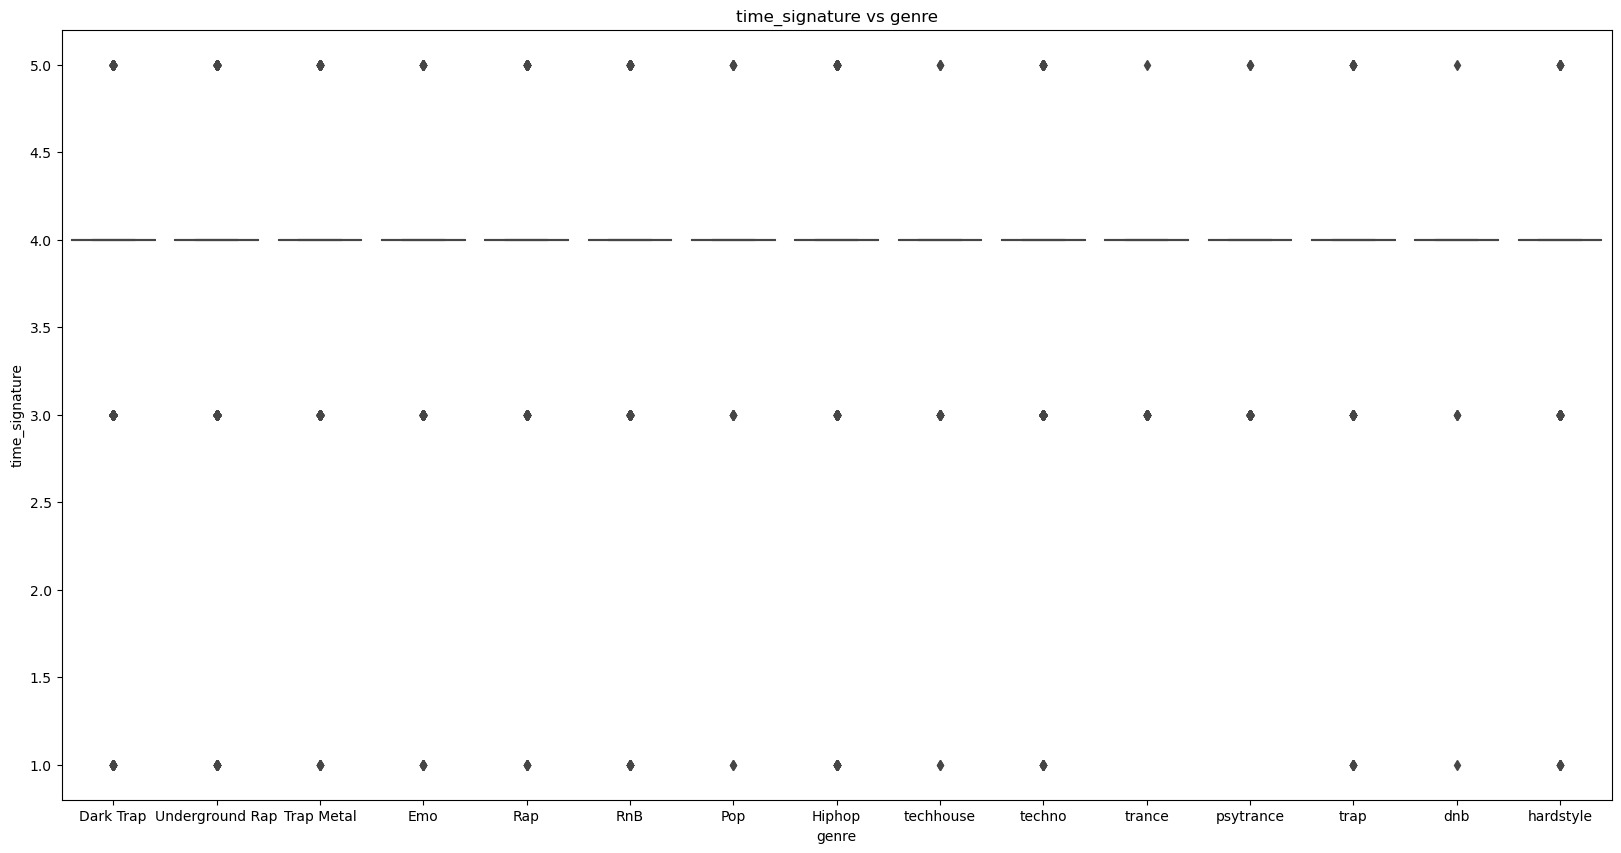

In [12]:
# Relation - columns and genre

for column in data.columns[:-1]:
    plt.figure(figsize = (20, 10))
    sns.boxplot(x = "genre", y = column, data = data)
    plt.title(f"{column} vs genre")

In [13]:
# Identifying all the numeric coulumns

numeric = data._get_numeric_data()
genre = data['genre']
print(numeric.head())
print("Numeric columns: ",end = " ")
print(numeric.columns)
print(len(numeric.columns))

numeric.describe()

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.013400    0.0556   0.3890  156.985       124539               4  
1          0.000000    0.1180   0.1240  115.080       224427               4  
2          0.000004    0.3720   0.0391  218.050        98821               4  
3          0.000000    0.1140   0.1750  186.948       123661               3  
4          0.000000    0.1660   0.5910  147.988       123298               4  
Numeric columns:  Index(['danceability', 'energy', 'key', 'loudness', 'mode

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature  
count  42305.000000  42305.000000   42305.000000    42305.000000  
mean       0.357101    147.474056  250865.846685        3.972580  
std        0.233200     23.844623  102957.713571        0.268342  
min        0.018700     57.967000   25600.000000        1.000000  
25%        0.161000    129.931000  179840.000000        4.000000  
50%        0.322000    144.973000  224760.000000        4.000000  
75%        0.522000    161.464000  301133.000000        4.000000  
max        0.988000    220.290000  913052.000000        5.000000

<function matplotlib.pyplot.show(close=None, block=None)>

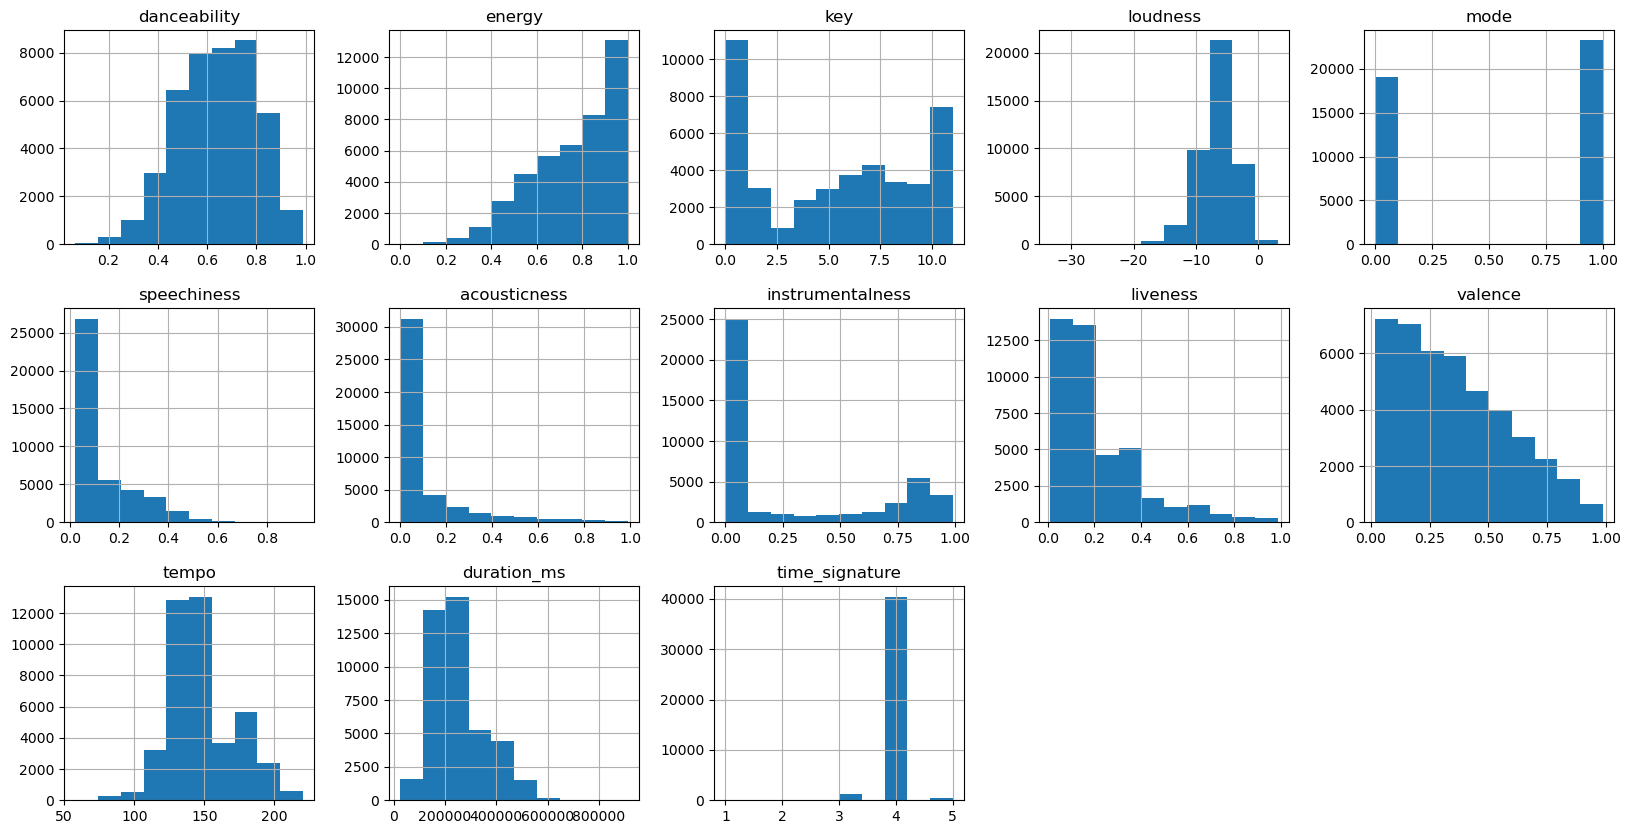

In [14]:
# Histogram of numeric coulumns in the dataset

num_hist = numeric.hist(layout=(3,5),figsize=(20,10))
plt.show

#### Features Of Each Genre:-
Here we analyze the features with respect to genre

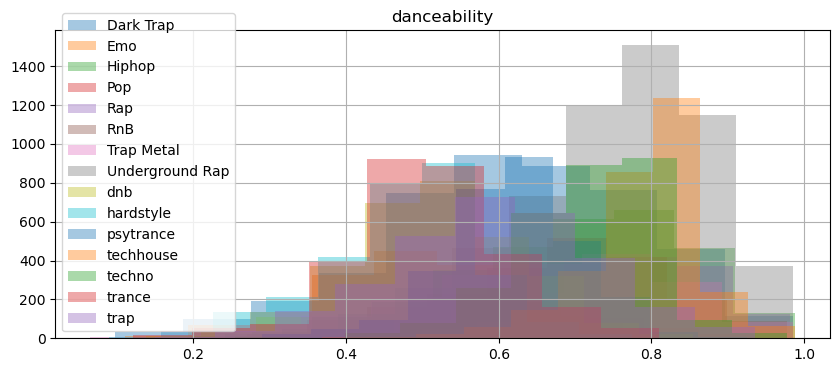

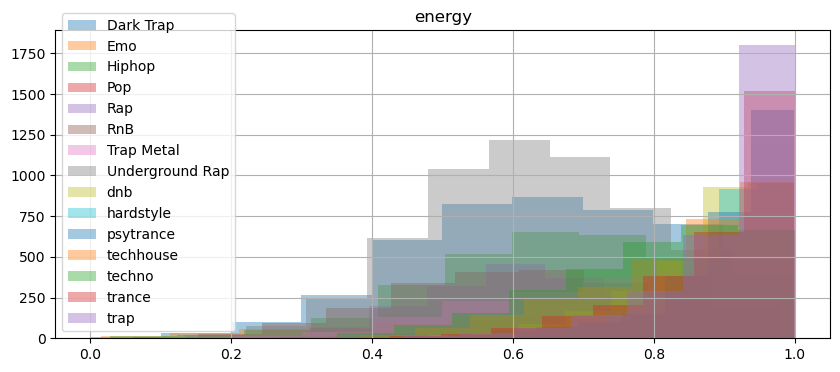

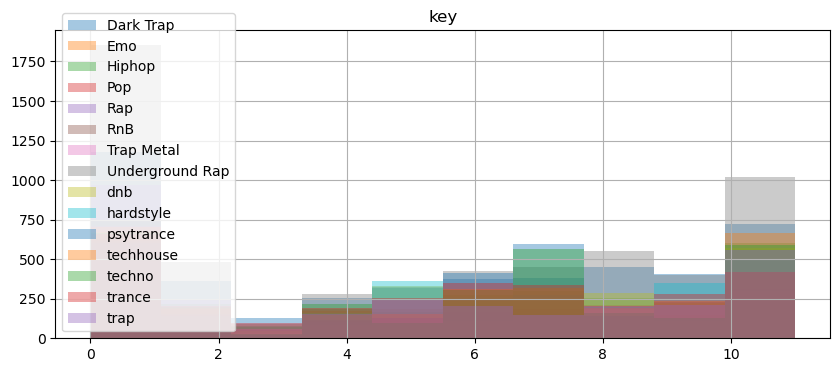

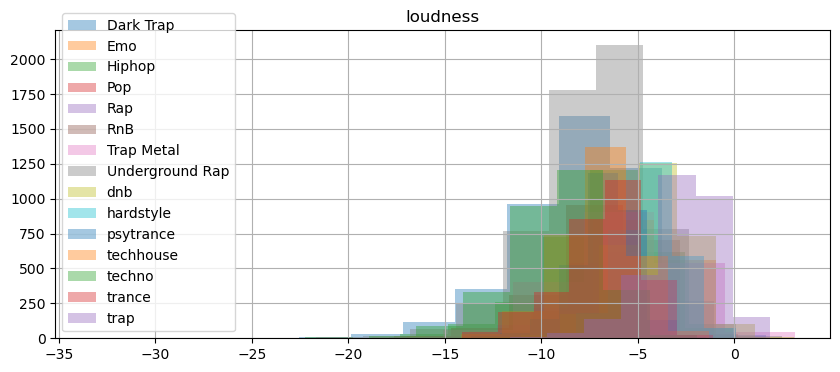

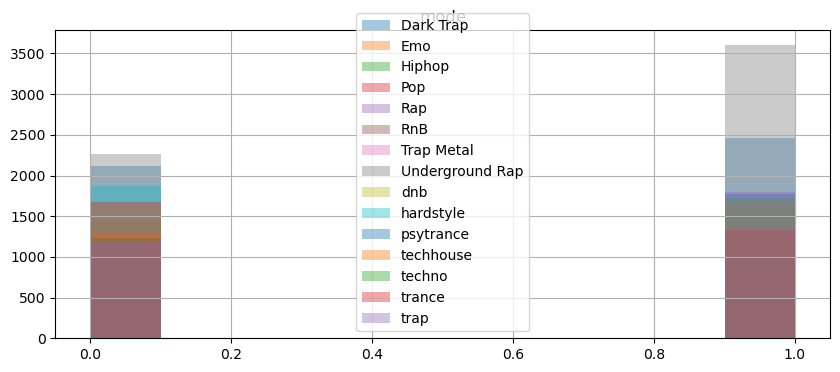

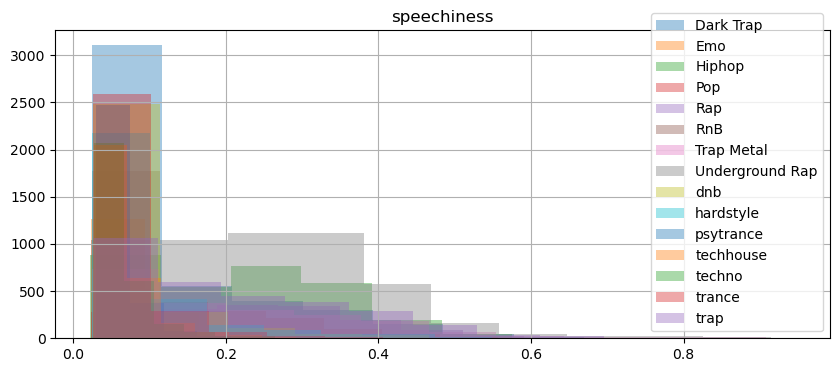

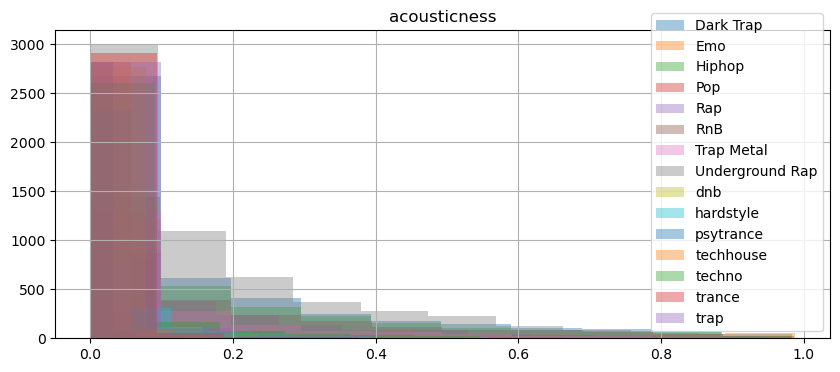

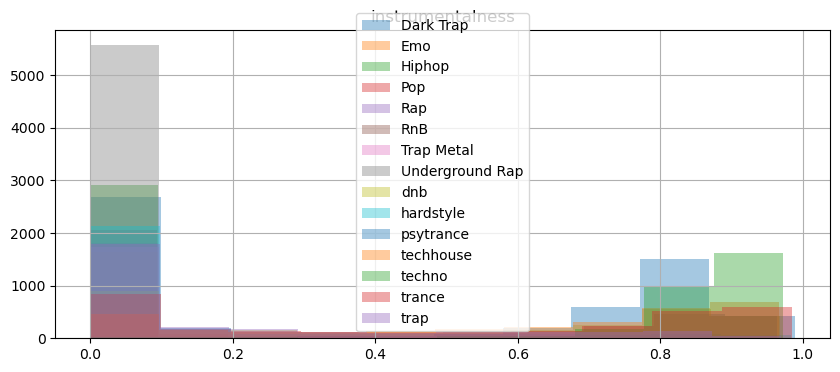

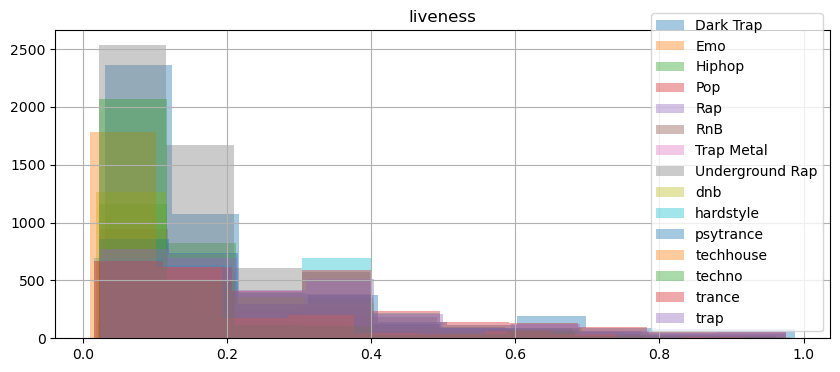

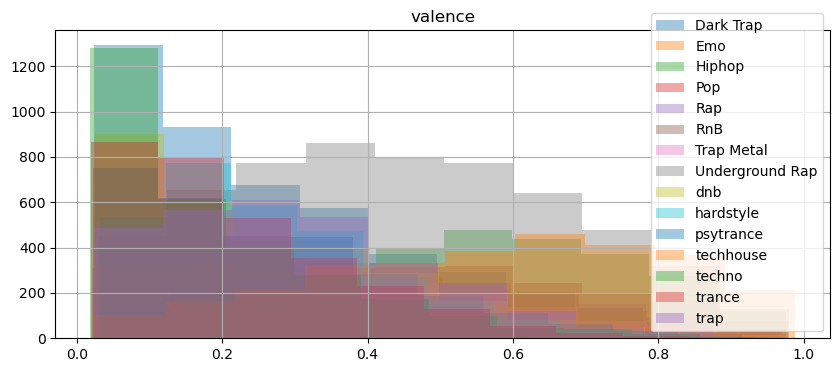

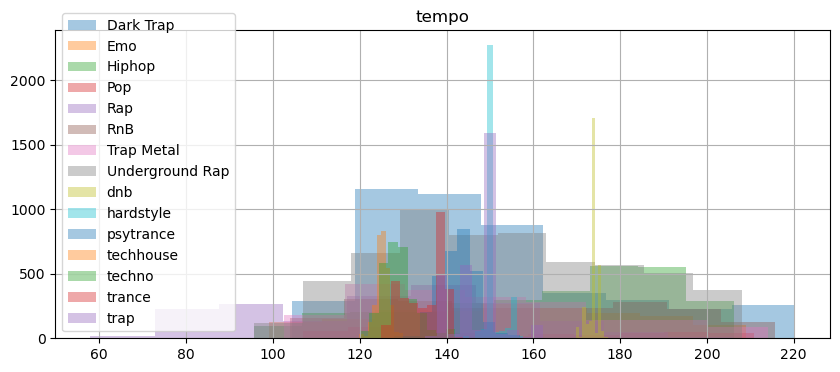

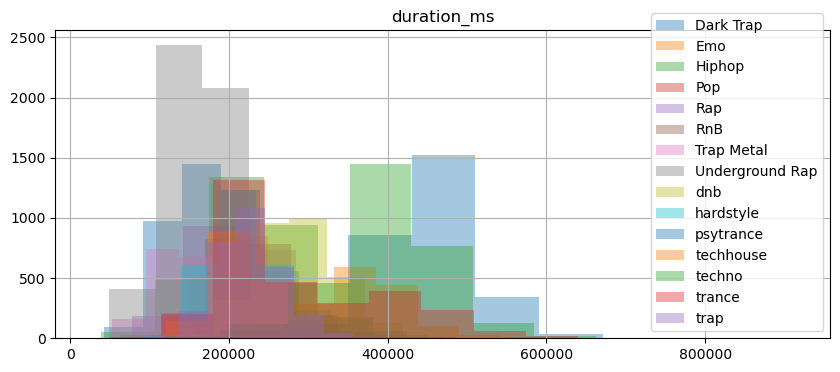

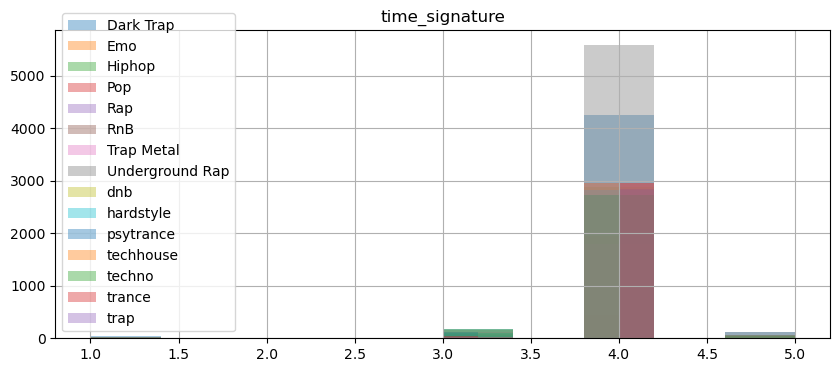

In [15]:
# Features of each genre

grouped_genre = data.groupby('genre')

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i,d in grouped_genre:
        d[col].hist(alpha=0.4, ax=ax, label=i, figsize =(10,4))
        ax.set_title(col)
        
    ax.legend()
    plt.show()

Mean of different features in genre

In [16]:
# Mean of different features in genre

grouped_genre.mean()

danceability    energy       key  loudness      mode  \
genre                                                                   
Dark Trap            0.618834  0.646851  5.298384 -7.998401  0.536479   
Emo                  0.493699  0.761175  5.052976 -5.433641  0.685714   
Hiphop               0.698982  0.654418  5.553170 -7.014983  0.527741   
Pop                  0.676807  0.697638  5.399132 -5.632072  0.548807   
Rap                  0.742877  0.620083  5.048701 -6.887086  0.522186   
RnB                  0.674206  0.598884  5.021915 -6.899896  0.532158   
Trap Metal           0.647564  0.749157  4.663088 -5.879087  0.717791   
Underground Rap      0.744658  0.635776  5.059064 -7.362036  0.613617   
dnb                  0.520944  0.873433  5.619016 -4.063237  0.446055   
hardstyle            0.478027  0.896238  5.710831 -4.349444  0.360695   
psytrance            0.617462  0.902392  5.989531 -6.703383  0.598446   
techhouse            0.786794  0.834481  5.794622 -7.054302  0.567395   
techno               0.715742  0.795714  5.698917 -9.290230  0.582544   
trance               0.507724  0.892435  5.389797 -6.907600  0.442814   
trap                 0.593180  0.906060  5.024439 -2.725578  0.603616   

                 speechiness  acousticness  instrumentalness  liveness  \
genre                                                                    
Dark Trap           0.123434      0.159493          0.277276  0.185081   
Emo                 0.080325      0.143094          0.011402  0.195243   
Hiphop              0.217150      0.195569          0.017154  0.210581   
Pop                 0.088363      0.149251          0.013831  0.177949   
Rap                 0.217862      0.170566          0.006939  0.181320   
RnB                 0.143110      0.225276          0.007400  0.178984   
Trap Metal          0.209677      0.114926          0.057051  0.243655   
Underground Rap     0.224992      0.162708          0.025280  0.191116   
dnb                 0.083478      0.019543          0.459998  0.202883   
hardstyle           0.094624      0.040841          0.137431  0.273830   
psytrance           0.060425      0.006333          0.766458  0.293434   
techhouse           0.072255      0.014223          0.580083  0.141387   
techno              0.066170      0.039556          0.847089  0.149137   
trance              0.071306      0.012970          0.495374  0.296976   
trap                0.205966      0.024439          0.196289  0.276127   

                  valence       tempo    duration_ms  time_signature  
genre                                                                 
Dark Trap        0.273663  149.791186  187707.330275        3.961337  
Emo              0.444145  153.888640  218317.432143        3.938690  
Hiphop           0.523628  162.980479  227954.272787        3.975561  
Pop              0.550264  152.098937  211392.828633        3.984816  
Rap              0.440921  126.006374  203007.674784        3.985931  
RnB              0.493974  157.533793  226402.473559        3.960934  
Trap Metal       0.348786  148.684947  147195.234151        3.953476  
Underground Rap  0.444629  152.914521  176152.595234        3.979915  
dnb              0.253062  173.849166  286548.825017        3.998314  
hardstyle        0.267171  150.659340  229493.391349        3.964237  
psytrance        0.259625  142.688529  445575.322864        3.961499  
techhouse        0.568175  124.927316  291691.778151        3.993277  
techno           0.192331  128.971052  399263.969553        3.945873  
trance           0.220285  134.625598  287512.124708        3.985995  
trap             0.301178  147.691379  225174.448945        3.987948

Standard deviation of different features in a Genre

In [17]:
# Standard deviation of different features in a Genre

grouped_genre.std()

danceability    energy       key  loudness      mode  \
genre                                                                   
Dark Trap            0.161002  0.180810  3.638048  3.156933  0.498722   
Emo                  0.126014  0.220404  3.477168  2.598227  0.464369   
Hiphop               0.142183  0.162416  3.679533  2.827193  0.499312   
Pop                  0.119175  0.155379  3.644698  1.947846  0.498153   
Rap                  0.127670  0.137444  3.705862  2.353116  0.499643   
RnB                  0.140207  0.164788  3.638515  2.518220  0.499084   
Trap Metal           0.169564  0.174147  3.748826  3.038965  0.450189   
Underground Rap      0.128180  0.155994  3.777848  2.755624  0.486962   
dnb                  0.106605  0.097925  3.589637  1.946063  0.497165   
hardstyle            0.099230  0.082729  3.534666  1.589293  0.480284   
psytrance            0.086189  0.093983  3.502445  1.585368  0.490295   
techhouse            0.073436  0.131920  3.782393  1.899141  0.495520   
techno               0.088053  0.141080  3.570704  2.383438  0.493223   
trance               0.102201  0.107369  3.486528  2.210131  0.496802   
trap                 0.128669  0.098066  3.801735  1.946665  0.489228   

                 speechiness  acousticness  instrumentalness  liveness  \
genre                                                                    
Dark Trap           0.123217      0.214746          0.366365  0.144774   
Emo                 0.075109      0.260326          0.077927  0.145681   
Hiphop              0.131501      0.219940          0.093075  0.162457   
Pop                 0.081074      0.198390          0.085986  0.140379   
Rap                 0.134830      0.178520          0.058052  0.132247   
RnB                 0.112993      0.231904          0.060419  0.133160   
Trap Metal          0.159220      0.166583          0.177845  0.186634   
Underground Rap     0.144794      0.186051          0.116380  0.148016   
dnb                 0.076611      0.051514          0.359274  0.167220   
hardstyle           0.090424      0.070447          0.253083  0.189537   
psytrance           0.027955      0.023667          0.140714  0.234006   
techhouse           0.041437      0.040741          0.326697  0.142550   
techno              0.036655      0.097297          0.133038  0.128944   
trance              0.052799      0.047673          0.372017  0.209879   
trap                0.146998      0.060583          0.273228  0.201278   

                  valence      tempo    duration_ms  time_signature  
genre                                                                
Dark Trap        0.206191  27.201544   60377.140798        0.368688  
Emo              0.202451  27.545931   43426.023963        0.318840  
Hiphop           0.222957  28.188804   60884.353006        0.329274  
Pop              0.215627  32.360009   35368.133282        0.250624  
Rap              0.215302  29.106285   59281.310692        0.284631  
RnB              0.221235  29.820987   50866.054759        0.361912  
Trap Metal       0.215788  26.672863   45075.031628        0.343568  
Underground Rap  0.224521  26.671957   54752.469716        0.283957  
dnb              0.185296   1.141970   51728.231272        0.066194  
hardstyle        0.157019   1.917755   58437.289366        0.232932  
psytrance        0.181496   4.450475   68718.084176        0.197630  
techhouse        0.233905   1.655647   91206.405796        0.112837  
techno           0.169857   3.852044   69792.810230        0.309653  
trance           0.153906   4.437328  103359.717162        0.120334  
trap             0.177189   4.760100   41354.219861        0.186236

Min values of different features in a Genre

In [18]:
# Min values of different features in a Genre

grouped_genre.min()

danceability    energy  key  loudness  mode  speechiness  \
genre                                                                       
Dark Trap              0.0979  0.000243    0   -25.222     0       0.0242   
Emo                    0.1110  0.014800    0   -32.929     0       0.0232   
Hiphop                 0.1970  0.027900    0   -24.694     0       0.0227   
Pop                    0.2090  0.173000    0   -16.423     0       0.0232   
Rap                    0.2410  0.144000    0   -19.720     0       0.0271   
RnB                    0.1910  0.060900    0   -29.478     0       0.0239   
Trap Metal             0.0651  0.000243    0   -33.357     0       0.0242   
Underground Rap        0.2410  0.134000    0   -21.657     0       0.0251   
dnb                    0.1380  0.349000    0   -17.088     0       0.0265   
hardstyle              0.0891  0.464000    0   -16.475     0       0.0253   
psytrance              0.2900  0.388000    0   -16.694     0       0.0300   
techhouse              0.3680  0.231000    0   -22.714     0       0.0269   
techno                 0.2540  0.188000    0   -26.172     0       0.0276   
trance                 0.1210  0.282000    0   -19.708     0       0.0259   
trap                   0.1500  0.205000    0   -17.419     0       0.0272   

                 acousticness  instrumentalness  liveness  valence    tempo  \
genre                                                                         
Dark Trap            0.000001          0.000000    0.0307   0.0235   75.418   
Emo                  0.000001          0.000000    0.0210   0.0358   87.018   
Hiphop               0.000017          0.000000    0.0219   0.0352   95.622   
Pop                  0.000068          0.000000    0.0215   0.0383  106.960   
Rap                  0.000151          0.000000    0.0221   0.0362   57.967   
RnB                  0.000081          0.000000    0.0235   0.0338   91.560   
Trap Metal           0.000001          0.000000    0.0221   0.0206   74.716   
Underground Rap      0.000018          0.000000    0.0221   0.0294   95.622   
dnb                  0.000003          0.000000    0.0189   0.0253  169.857   
hardstyle            0.000008          0.000000    0.0153   0.0318  143.803   
psytrance            0.000002          0.000924    0.0228   0.0228  128.008   
techhouse            0.000004          0.000000    0.0107   0.0242  119.900   
techno               0.000001          0.000000    0.0222   0.0187  120.001   
trance               0.000003          0.000000    0.0159   0.0199  125.000   
trap                 0.000006          0.000000    0.0241   0.0237  135.019   

                 duration_ms  time_signature  
genre                                         
Dark Trap              42133               1  
Emo                    50720               1  
Hiphop                 38333               1  
Pop                   121143               1  
Rap                    77500               1  
RnB                    62213               1  
Trap Metal             52963               1  
Underground Rap        49227               1  
dnb                    35862               1  
hardstyle              91617               1  
psytrance             108000               3  
techhouse              67431               1  
techno                119629               1  
trance                 48667               3  
trap                   25600               1

Max values of different features in a Genre

In [19]:
# Max values of different features in a Genre

grouped_genre.max()

danceability  energy  key  loudness  mode  speechiness  \
genre                                                                     
Dark Trap               0.985   0.998   11     1.646     1        0.946   
Emo                     0.926   0.995   11    -0.946     1        0.729   
Hiphop                  0.988   0.978   11    -0.067     1        0.944   
Pop                     0.935   0.977   11    -2.058     1        0.463   
Rap                     0.981   0.980   11    -1.181     1        0.833   
RnB                     0.978   0.974   11     0.175     1        0.786   
Trap Metal              0.985   0.999   11     3.148     1        0.908   
Underground Rap         0.985   0.997   11     2.499     1        0.914   
dnb                     0.855   0.999   11     3.108     1        0.906   
hardstyle               0.774   0.999   11     0.101     1        0.774   
psytrance               0.925   0.999   11    -1.464     1        0.473   
techhouse               0.988   0.999   11    -1.318     1        0.469   
techno                  0.978   1.000   11    -1.927     1        0.422   
trance                  0.887   1.000   11    -1.093     1        0.785   
trap                    0.935   1.000   11     1.851     1        0.863   

                 acousticness  instrumentalness  liveness  valence    tempo  \
genre                                                                         
Dark Trap               0.984             0.989     0.958    0.968  220.290   
Emo                     0.988             0.952     0.943    0.971  208.951   
Hiphop                  0.982             0.947     0.973    0.975  206.247   
Pop                     0.948             0.947     0.790    0.966  210.796   
Rap                     0.883             0.951     0.892    0.970  205.895   
RnB                     0.986             0.939     0.965    0.979  215.669   
Trap Metal              0.986             0.963     0.962    0.976  214.034   
Underground Rap         0.947             0.964     0.962    0.980  207.982   
dnb                     0.783             0.968     0.981    0.970  177.100   
hardstyle               0.562             0.983     0.976    0.935  157.687   
psytrance               0.321             0.964     0.988    0.917  157.033   
techhouse               0.563             0.967     0.923    0.988  130.044   
techno                  0.911             0.972     0.966    0.950  142.031   
trance                  0.939             0.985     0.975    0.934  146.009   
trap                    0.985             0.970     0.975    0.970  162.148   

                 duration_ms  time_signature  
genre                                         
Dark Trap             534857               5  
Emo                   548253               5  
Hiphop                723573               5  
Pop                   484147               5  
Rap                   728413               5  
RnB                   602297               5  
Trap Metal            474157               5  
Underground Rap       636213               5  
dnb                   514629               5  
hardstyle             566495               5  
psytrance             913052               5  
techhouse             596191               5  
techno                894386               5  
trance                705131               5  
trap                  392683               5

#### Removing outliers:

<Axes: xlabel='duration_ms'>

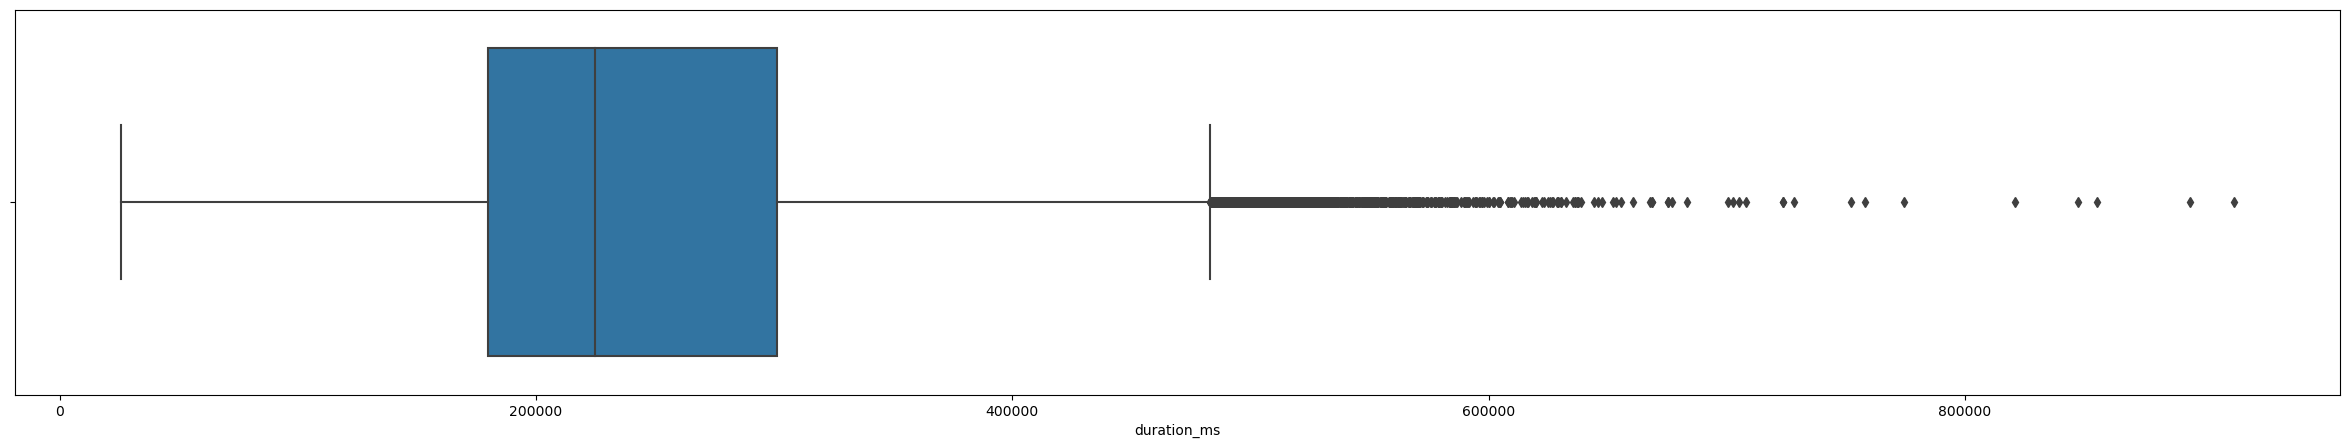

In [20]:
plt.figure(figsize = (30, 5))
sns.boxplot(data = data, x ="duration_ms" )

In [21]:
data["duration_ms"].quantile([0.25, 0.50, 0.75])

0.25    179840.0
0.50    224760.0
0.75    301133.0
Name: duration_ms, dtype: float64

In [22]:
Q3 = data["duration_ms"].quantile(0.75)
Q1 = data["duration_ms"].quantile(0.25)
IQR = Q3-Q1
IQR

121293.0

In [23]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
data[data["duration_ms"] > upper_limit]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
2709          0.499   0.950    7    -6.848     1       0.0707      0.003560   
3971          0.653   0.784    9    -6.232     1       0.0320      0.000428   
3976          0.571   0.942    3    -5.253     0       0.0322      0.021000   
5972          0.701   0.856   11    -5.465     1       0.2190      0.239000   
6056          0.290   0.827    8    -3.451     1       0.0362      0.000659   
...             ...     ...  ...       ...   ...          ...           ...   
37688         0.505   0.855   10    -4.518     0       0.0405      0.000176   
37817         0.319   0.943    0    -5.228     1       0.0423      0.012900   
39443         0.579   0.833    8    -4.544     1       0.0363      0.523000   
40105         0.269   0.913    9    -4.233     0       0.1490      0.019300   
42279         0.269   0.913    9    -4.233     0       0.1490      0.019300   

       instrumentalness  liveness  valence    tempo  duration_ms  \
2709           0.792000    0.1120   0.1990  134.998       497778   
3971           0.833000    0.1240   0.0438  210.004       534857   
3976           0.904000    0.2680   0.4380  128.007       487500   
5972           0.000000    0.1060   0.5630  167.964       559533   
6056           0.000003    0.3010   0.4500  167.086       493400   
...                 ...       ...      ...      ...          ...   
37688          0.732000    0.0845   0.2390  172.044       496042   
37817          0.968000    0.4540   0.0498  174.939       495086   
39443          0.743000    0.3680   0.1740  150.004       550400   
40105          0.003120    0.0603   0.1300  150.416       566495   
42279          0.003120    0.0603   0.1300  150.416       566495   

       time_signature            genre  
2709                4        Dark Trap  
3971                4        Dark Trap  
3976                4        Dark Trap  
5972                4  Underground Rap  
6056                4  Underground Rap  
...               ...              ...  
37688               4              dnb  
37817               4              dnb  
39443               4        hardstyle  
40105               4        hardstyle  
42279               4        hardstyle  

[1220 rows x 14 columns]

<Axes: xlabel='duration_ms'>

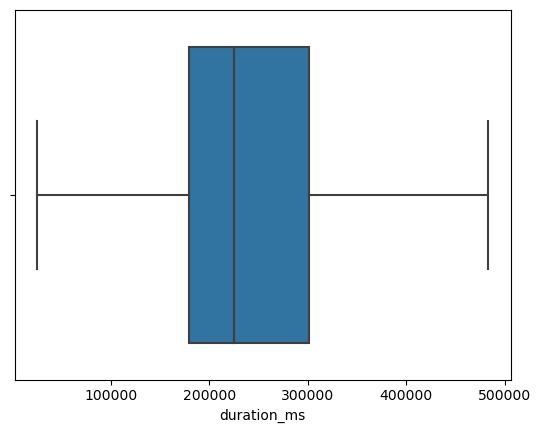

In [24]:
data.loc[(data["duration_ms"] > upper_limit), "duration_ms"] = upper_limit
sns.boxplot(data = data, x = "duration_ms")

#### Before removing the outliers:

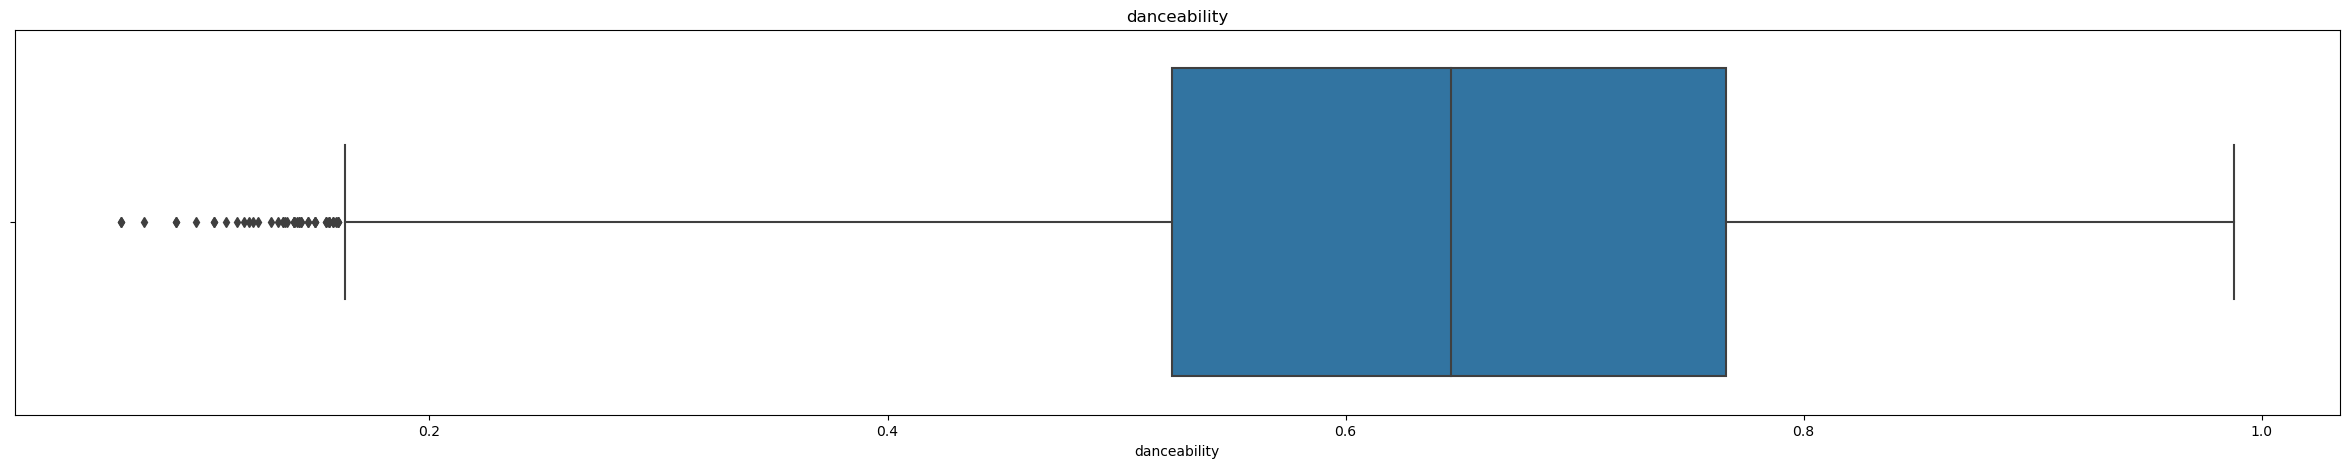

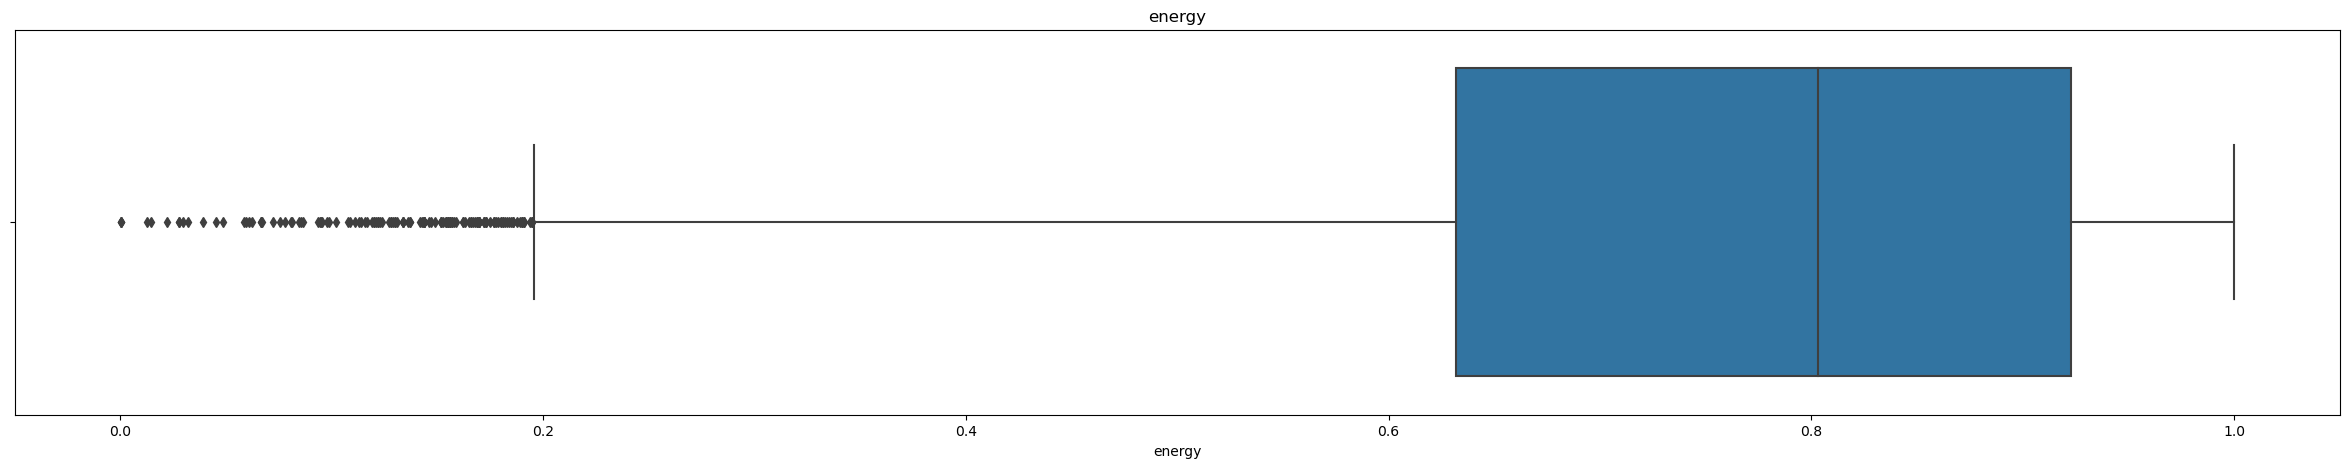

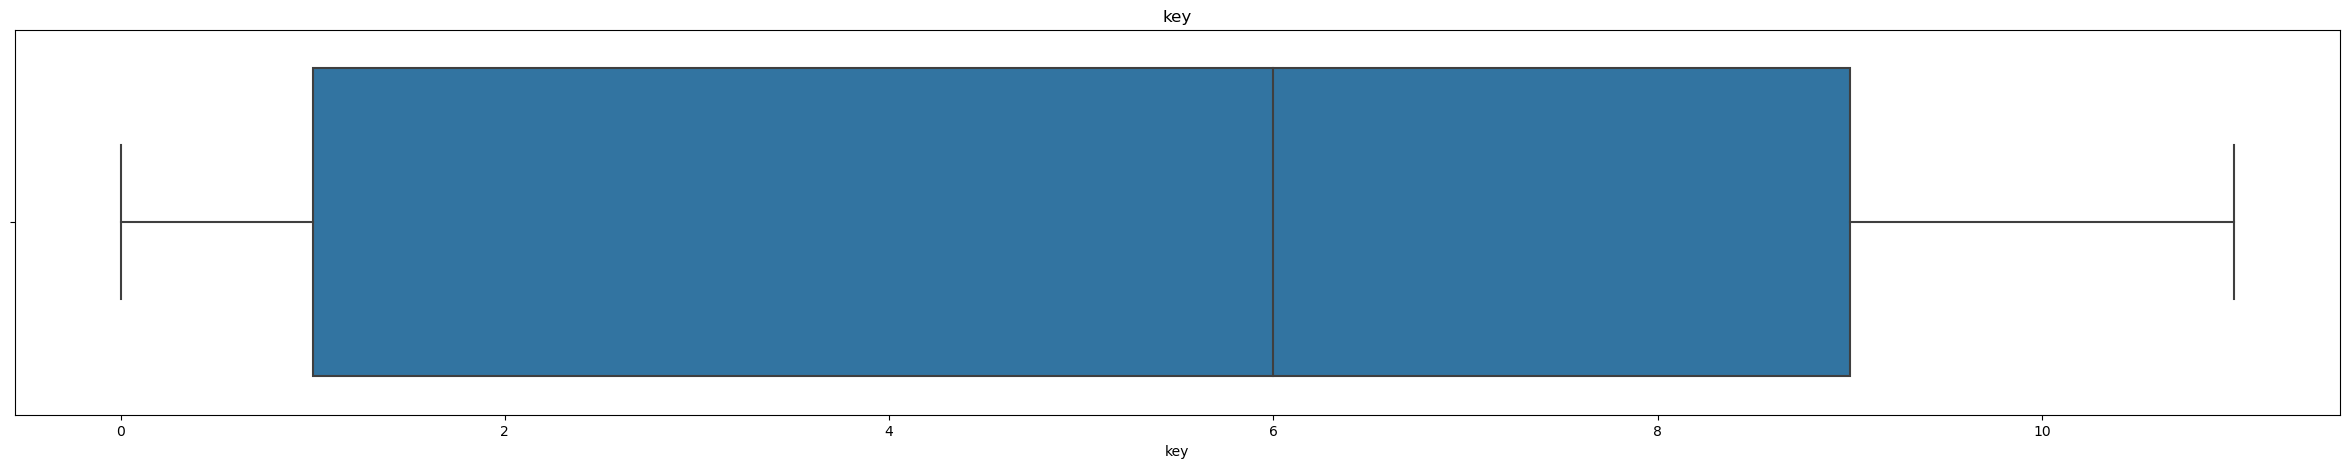

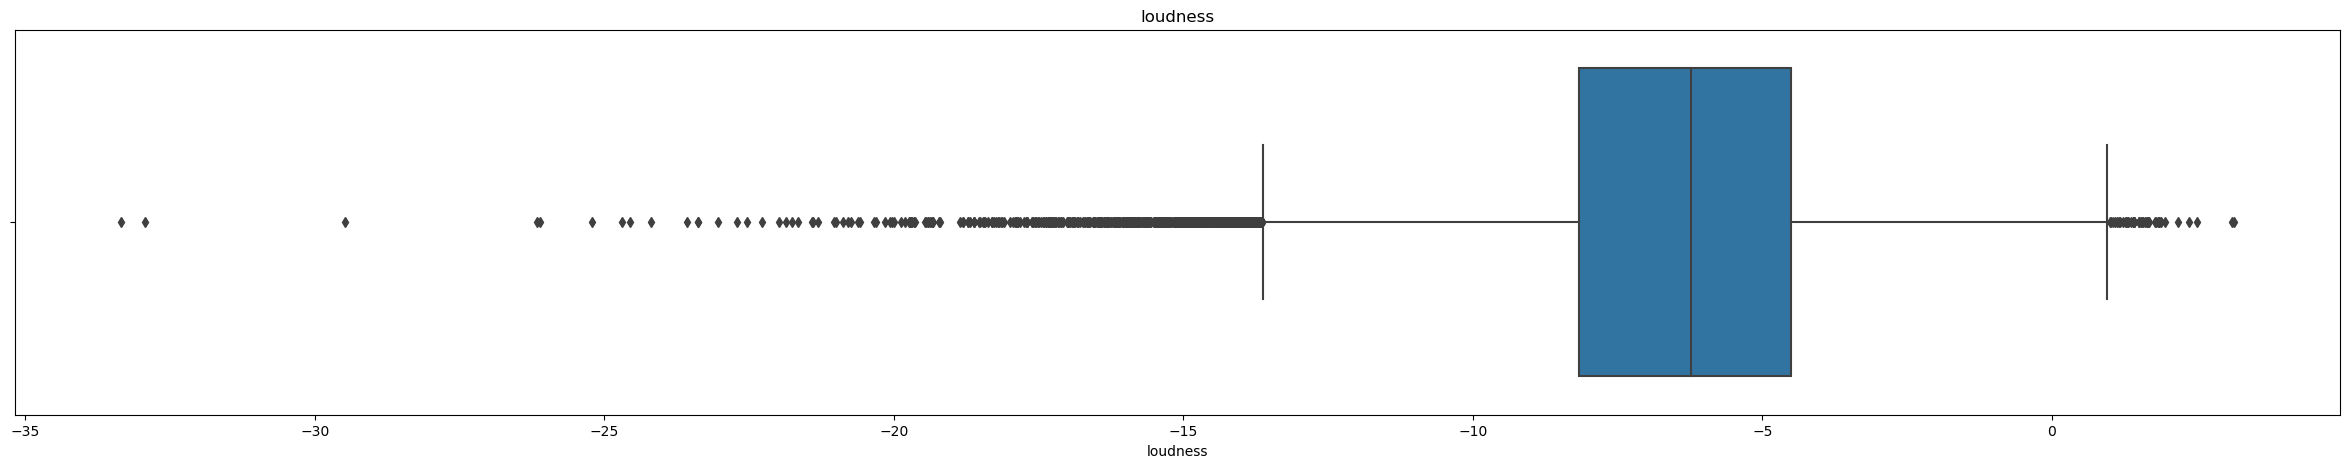

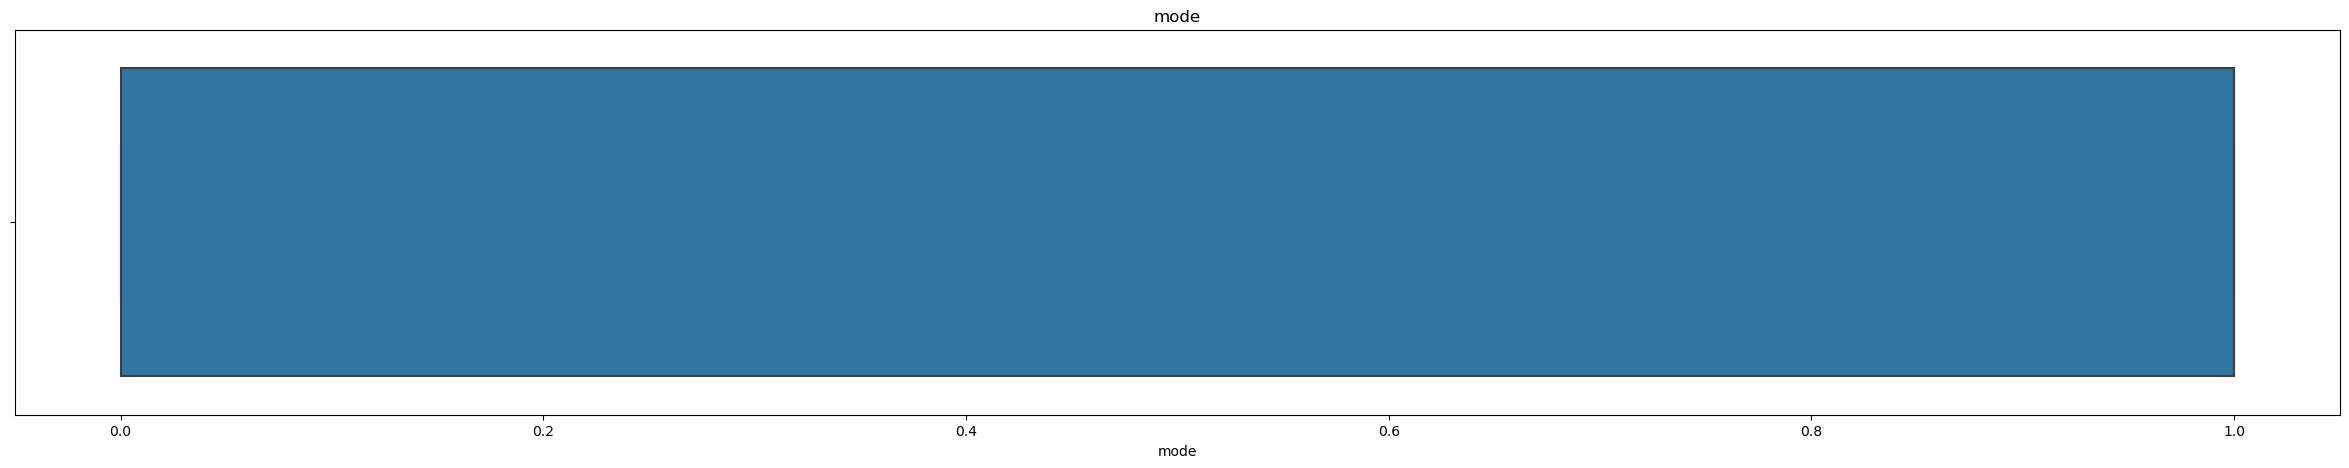

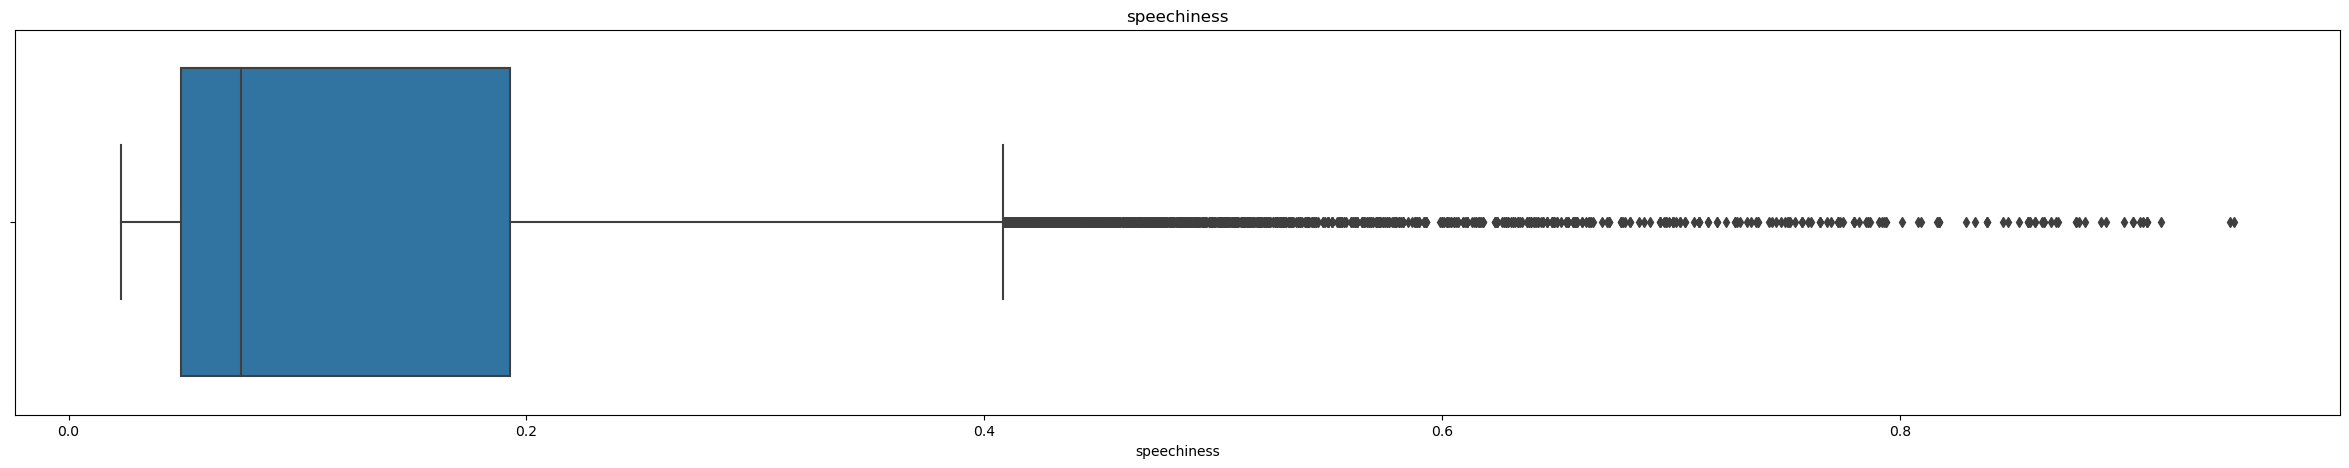

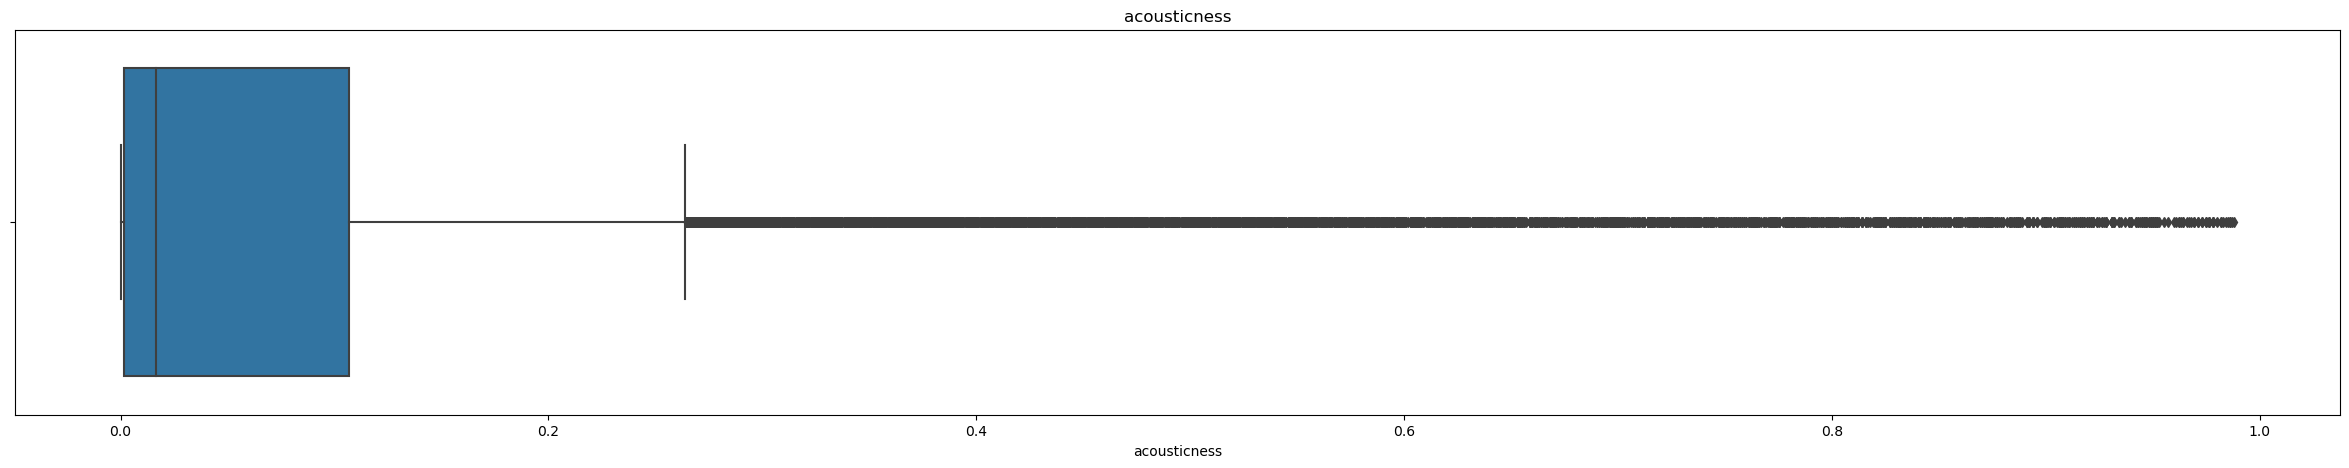

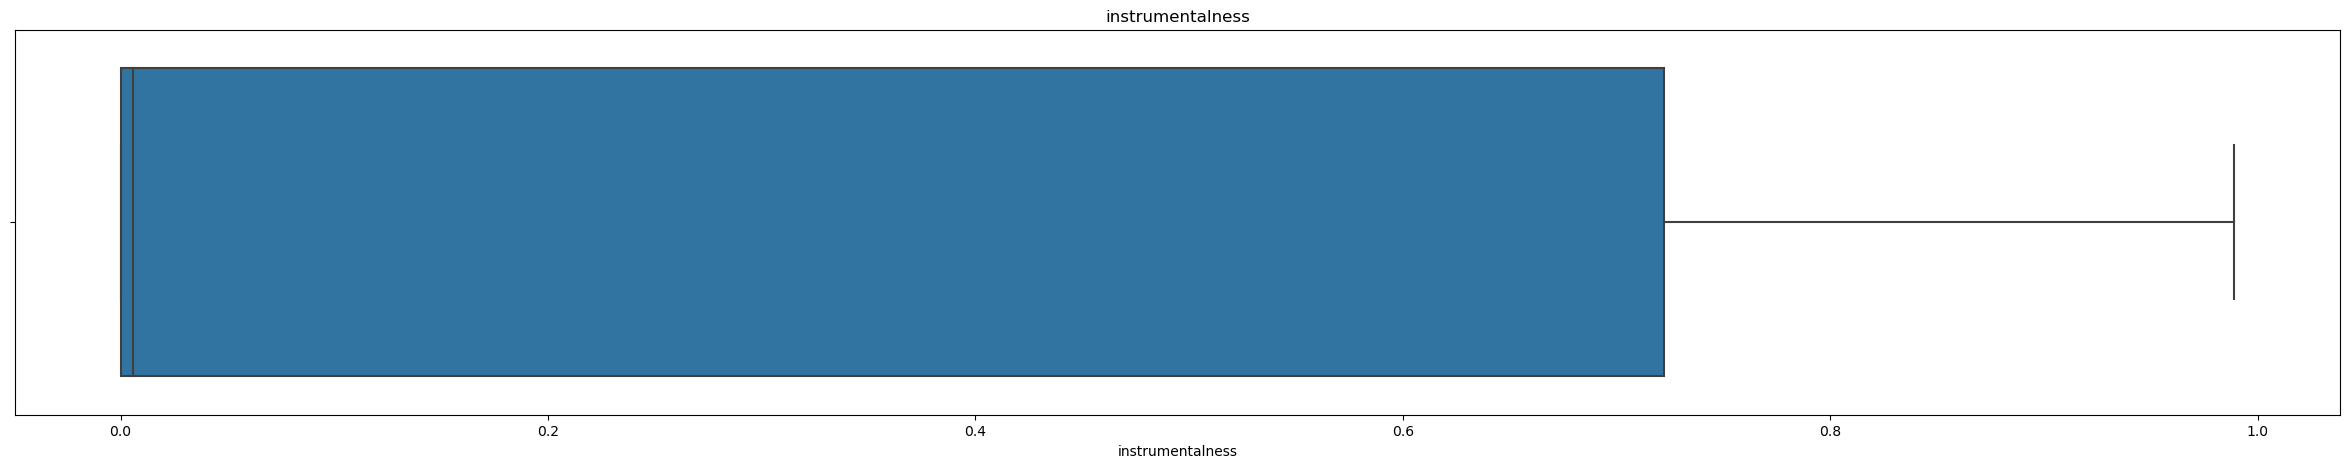

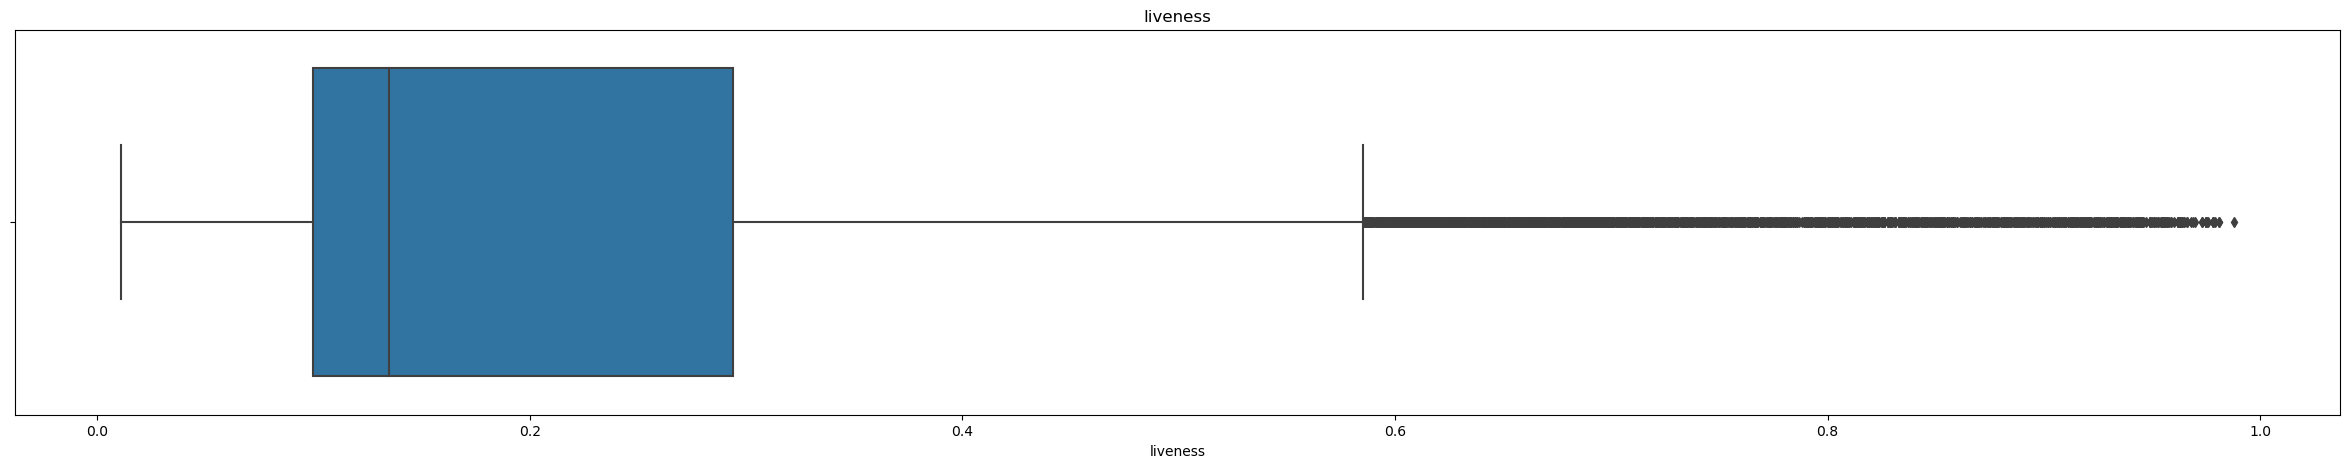

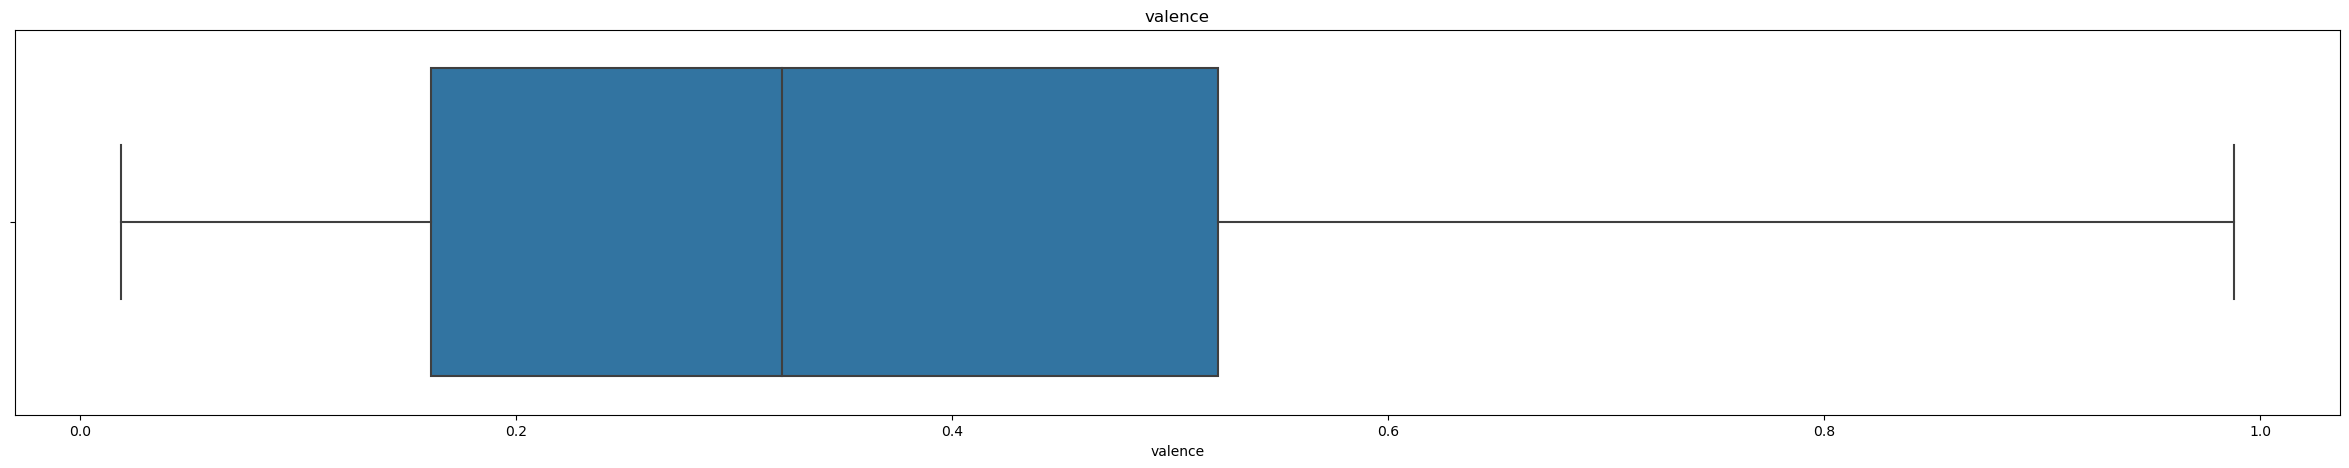

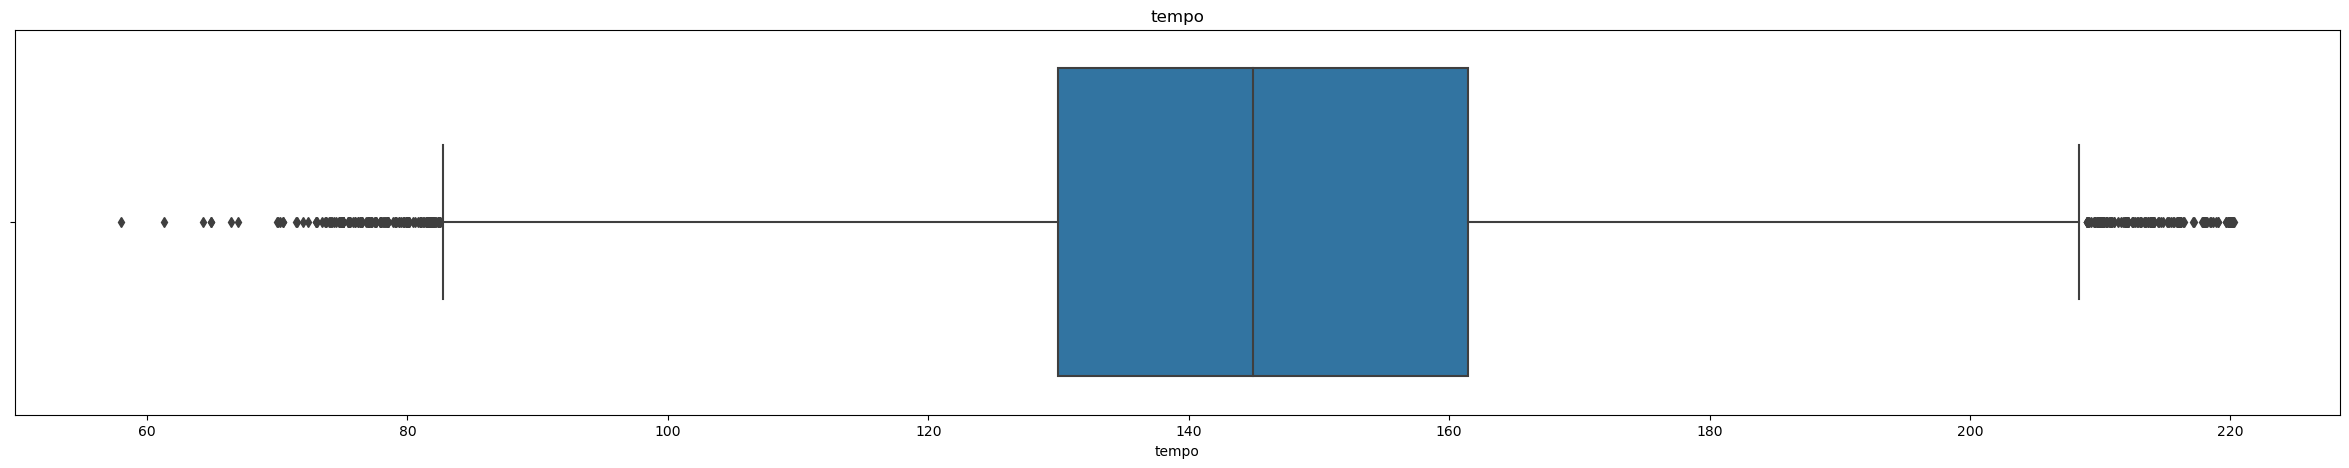

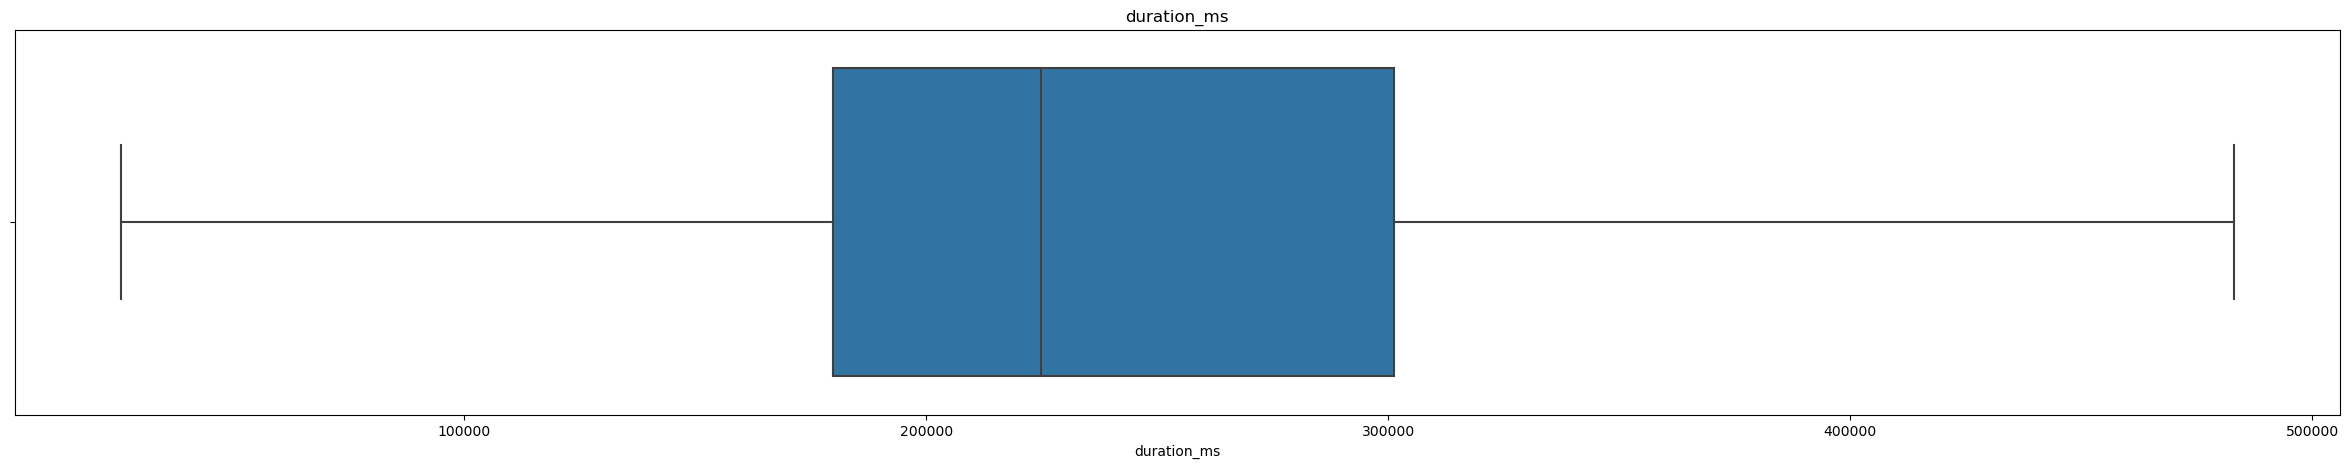

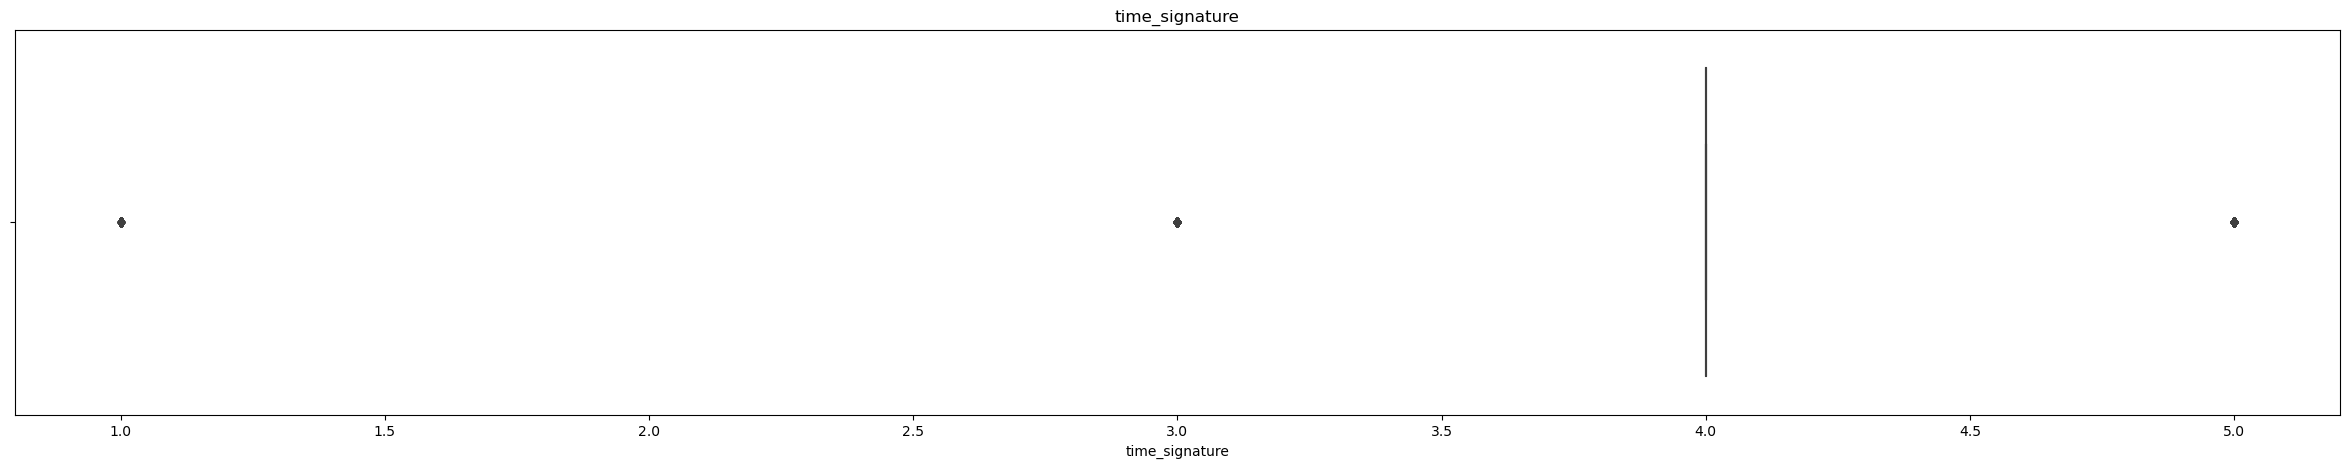

In [25]:
for column in data.columns[:-1]:
    plt.figure(figsize = (30, 5))
    sns.boxplot(data = data, x = column)
    plt.title(f"{column}")

#### After removing the outliers:

In [26]:
def remove_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    
    df.loc[( df[column] > upper_limit ), column] = upper_limit
    df.loc[( df[column] < lower_limit ), column] = lower_limit

In [27]:
# Replacing outliers with upper and lower limits

for column in data.columns[:-1]:
    if column == "duration_ms":
        continue
    
    remove_outliers(data, column)

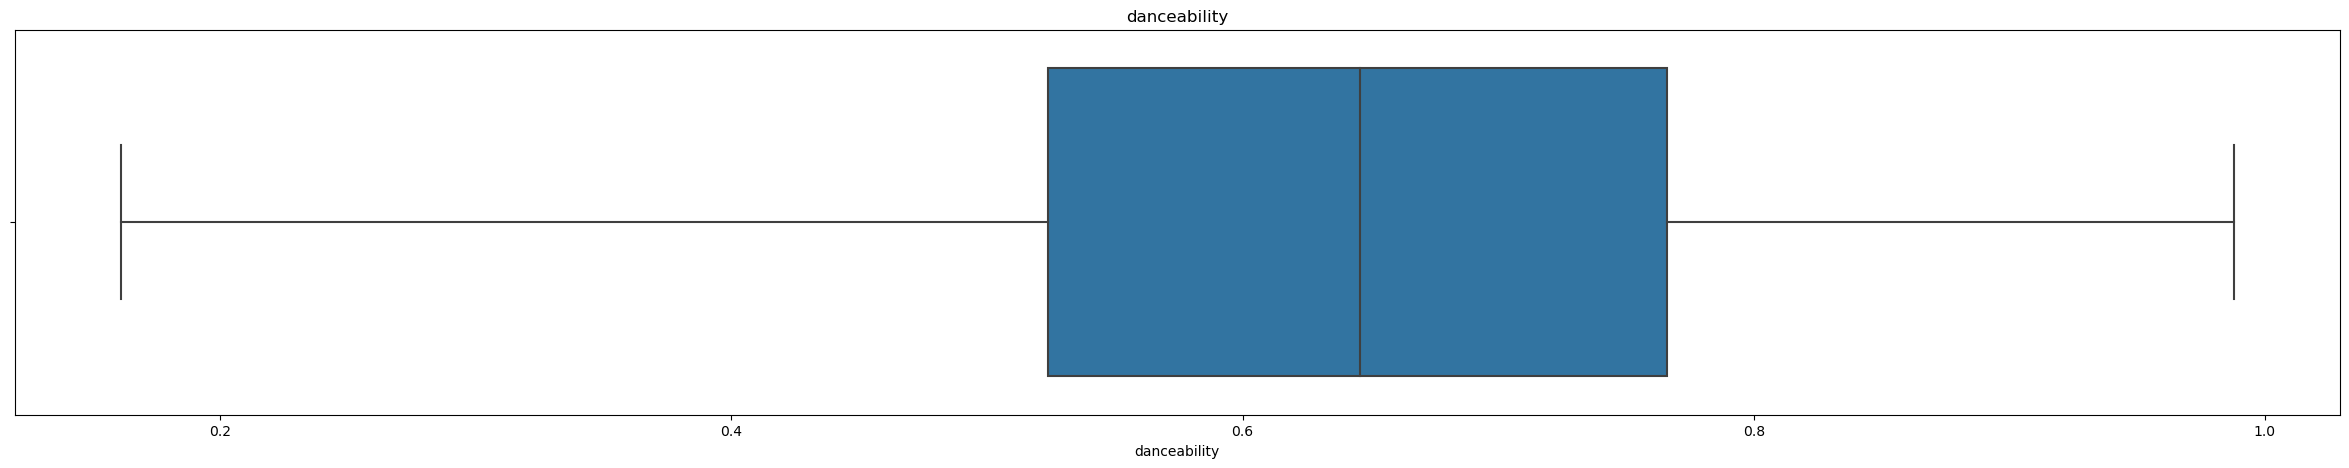

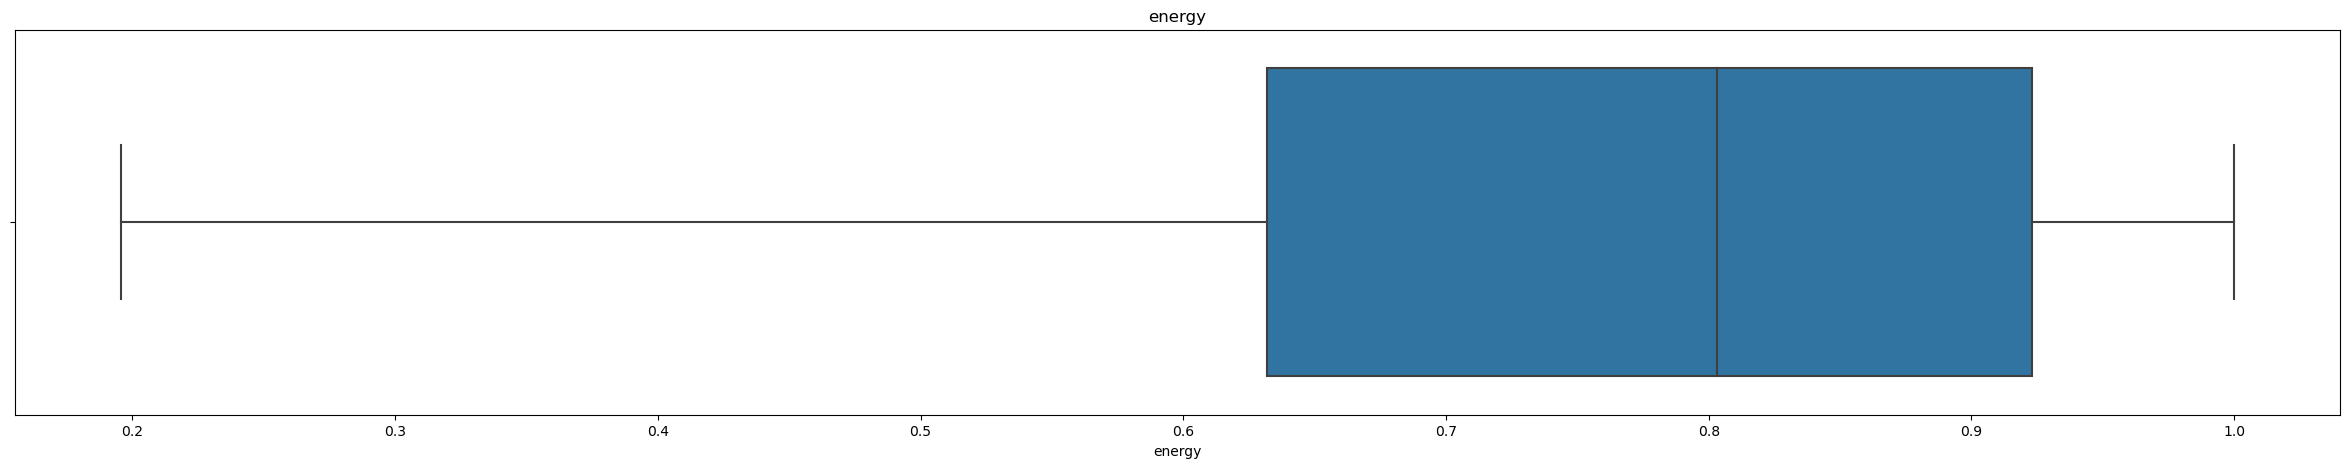

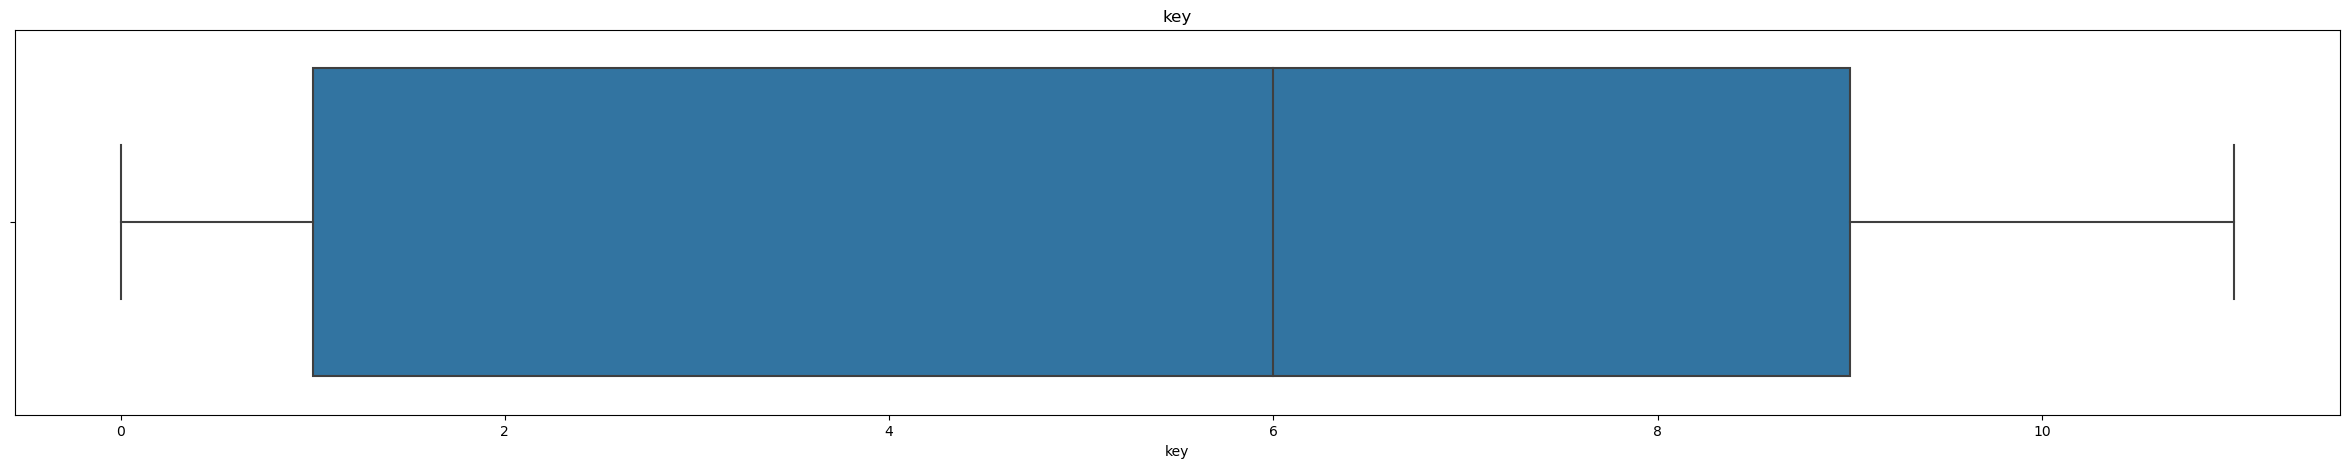

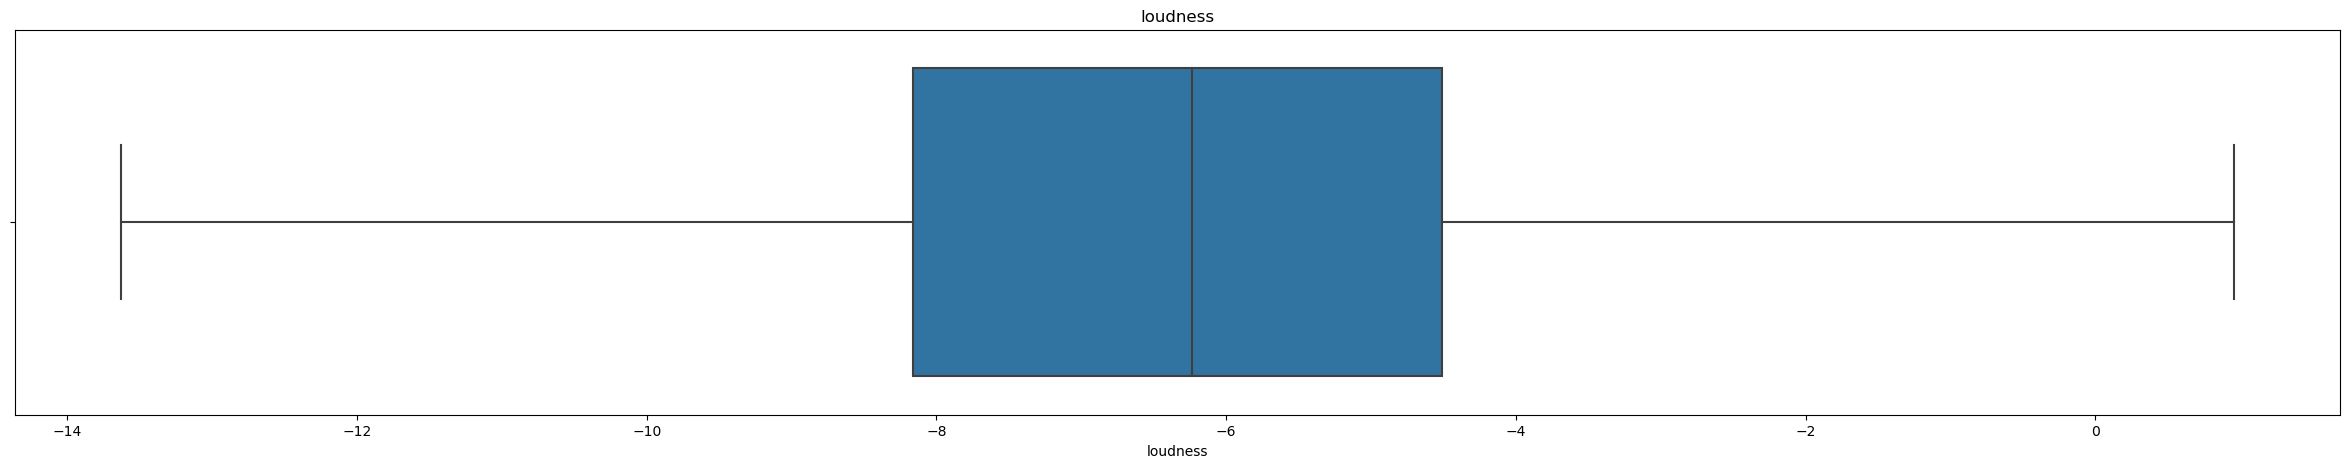

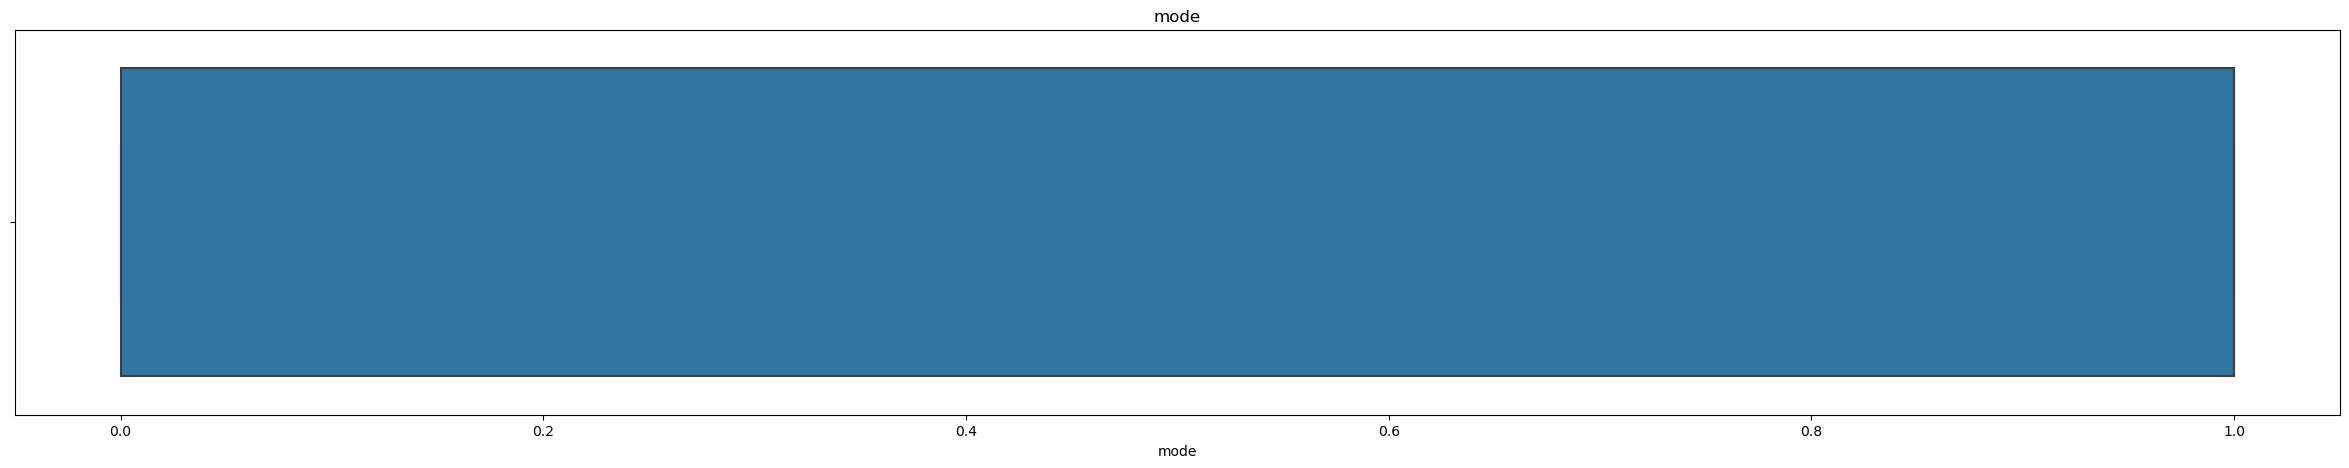

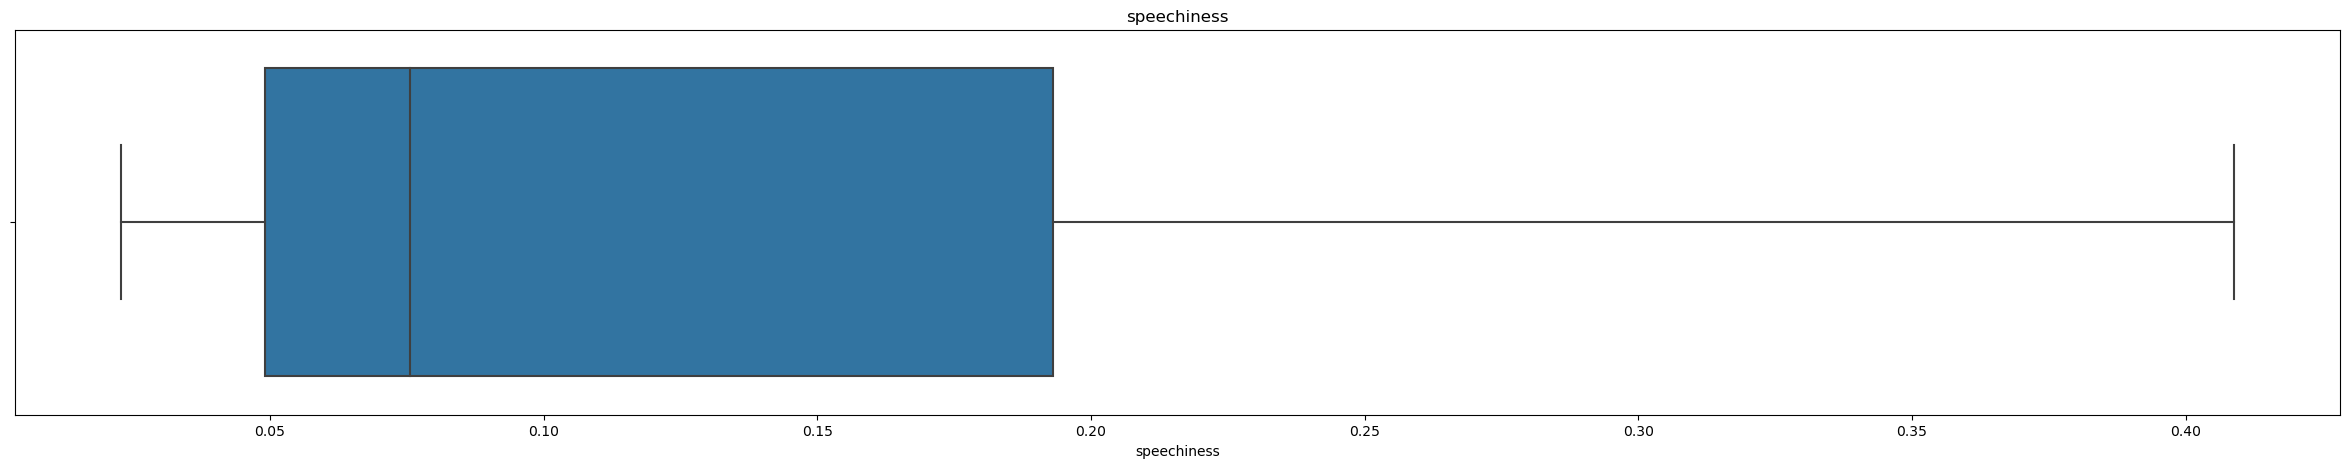

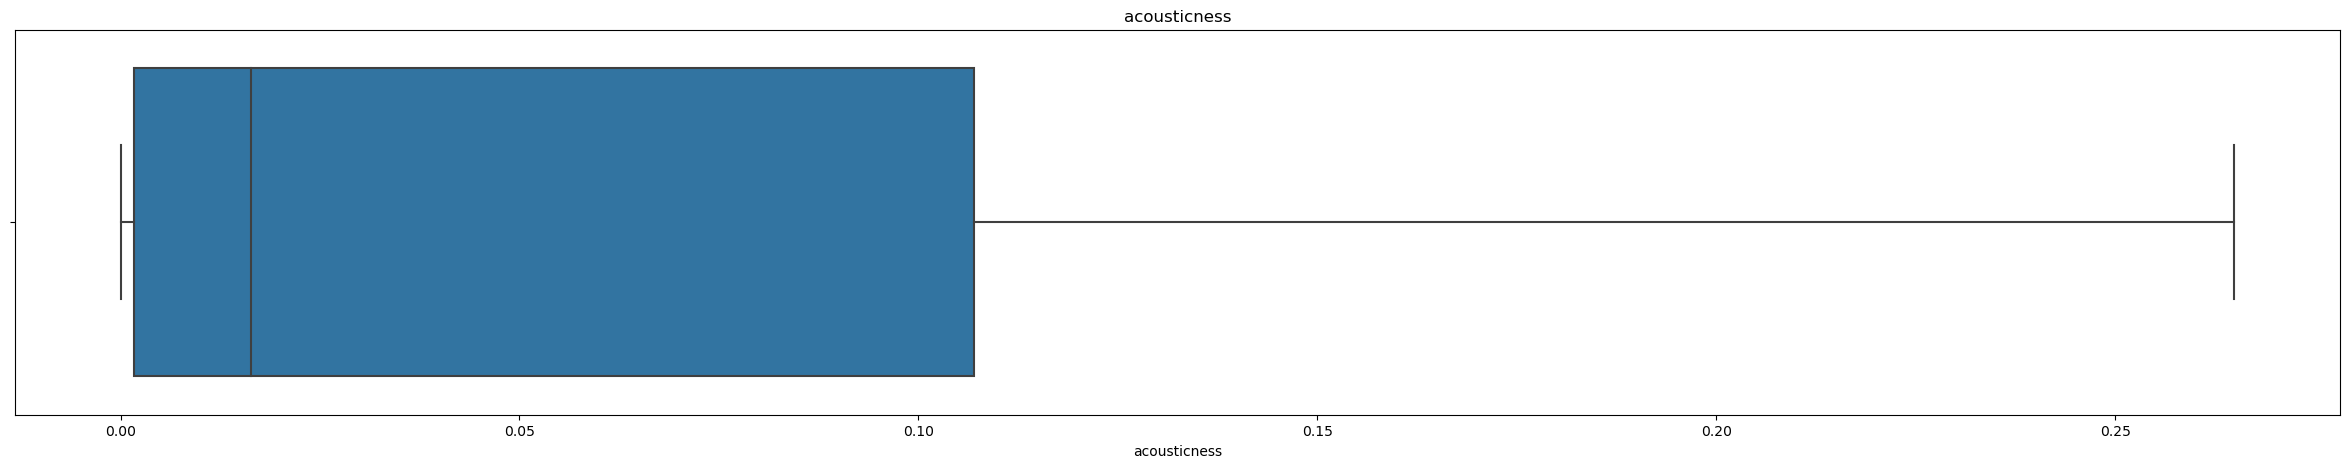

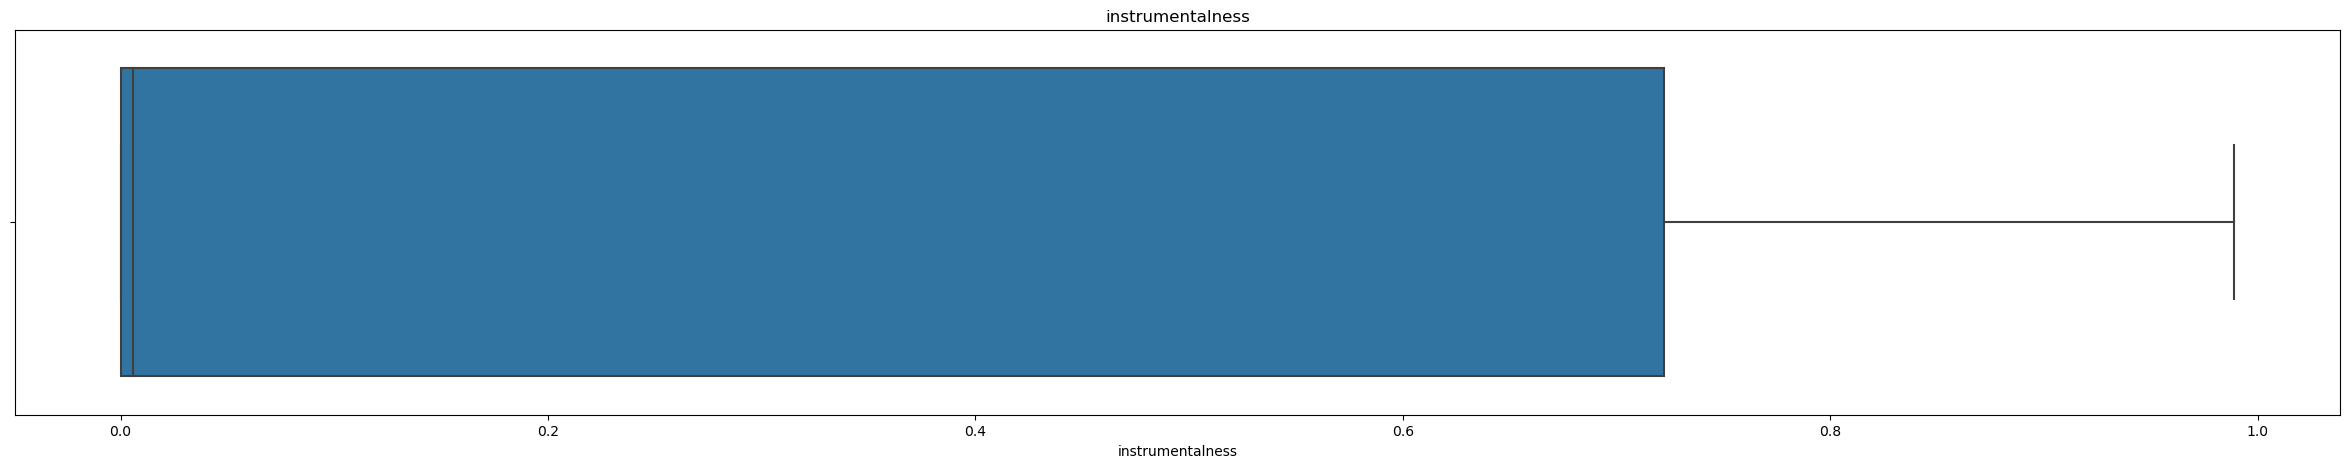

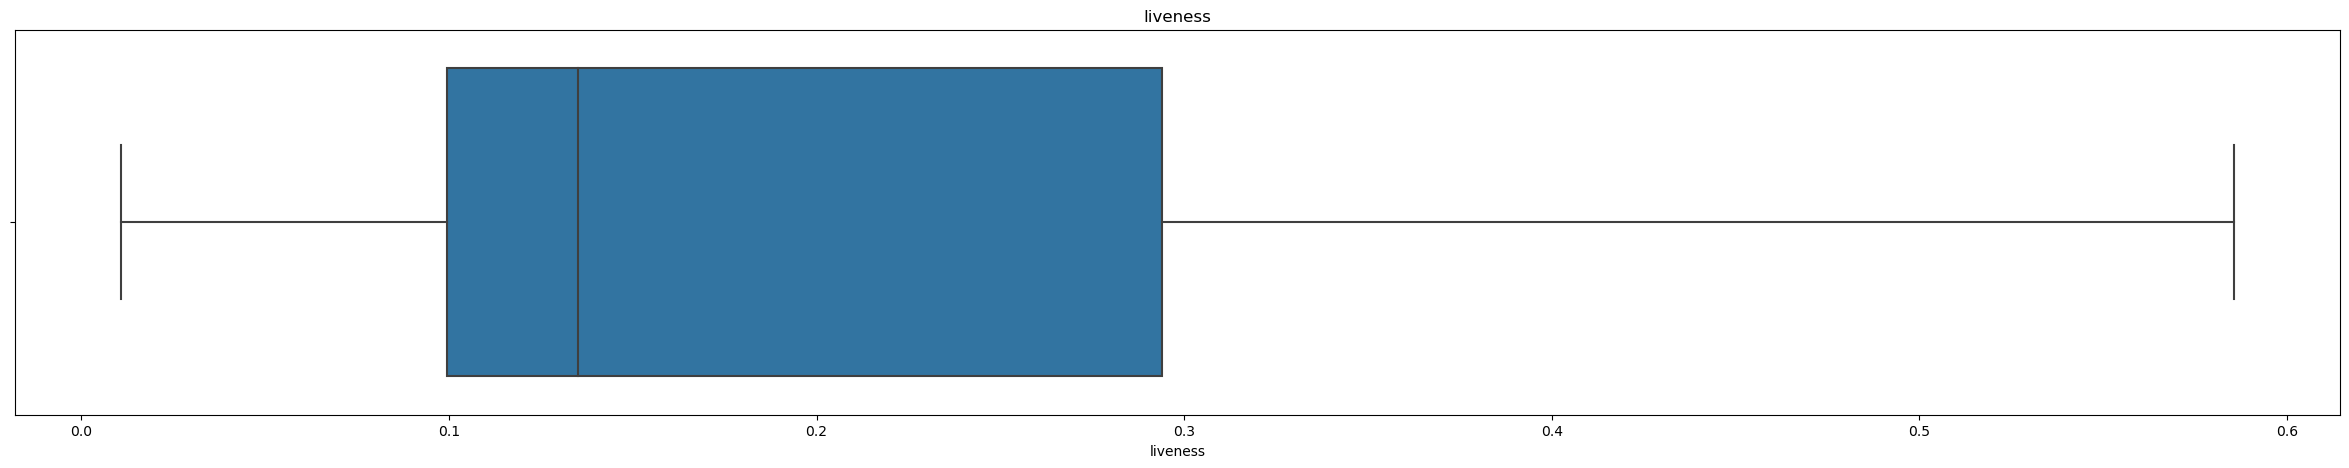

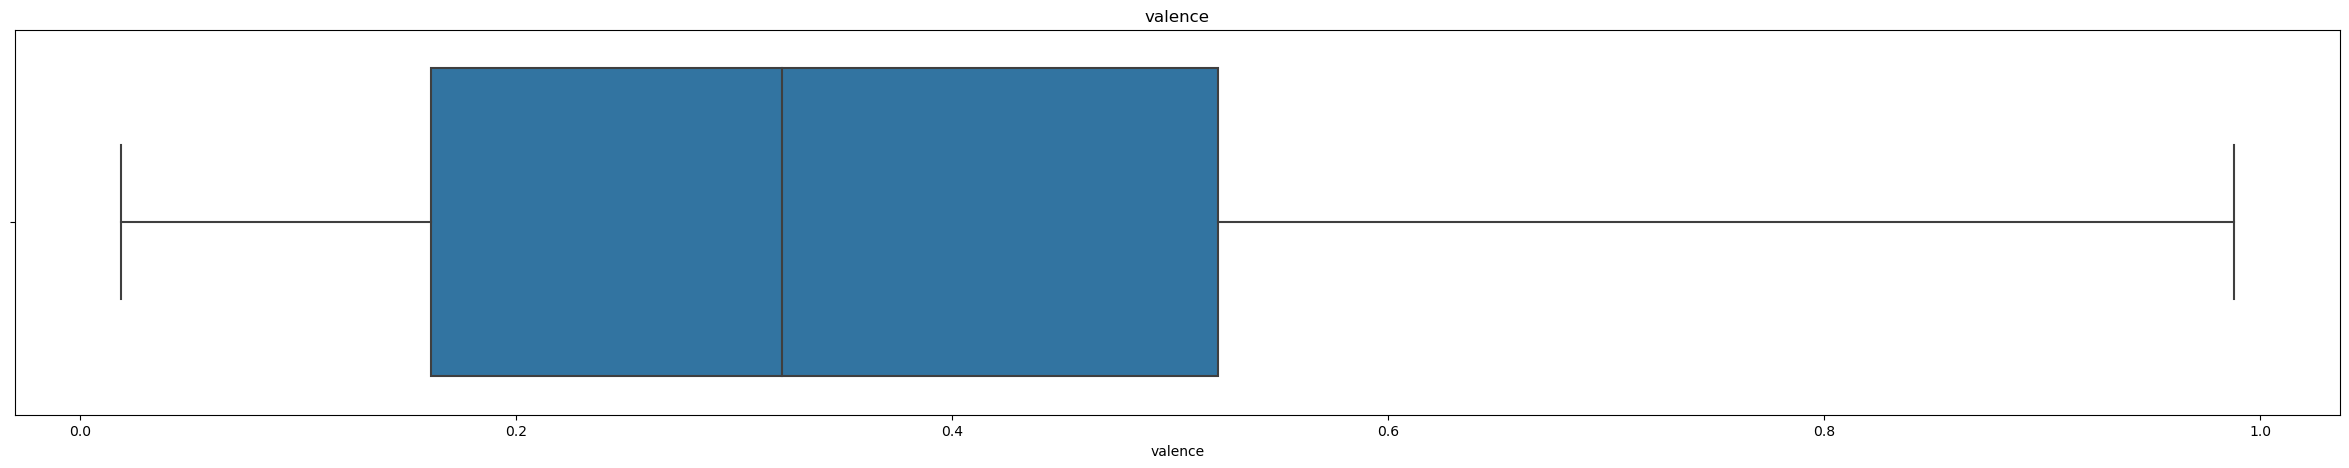

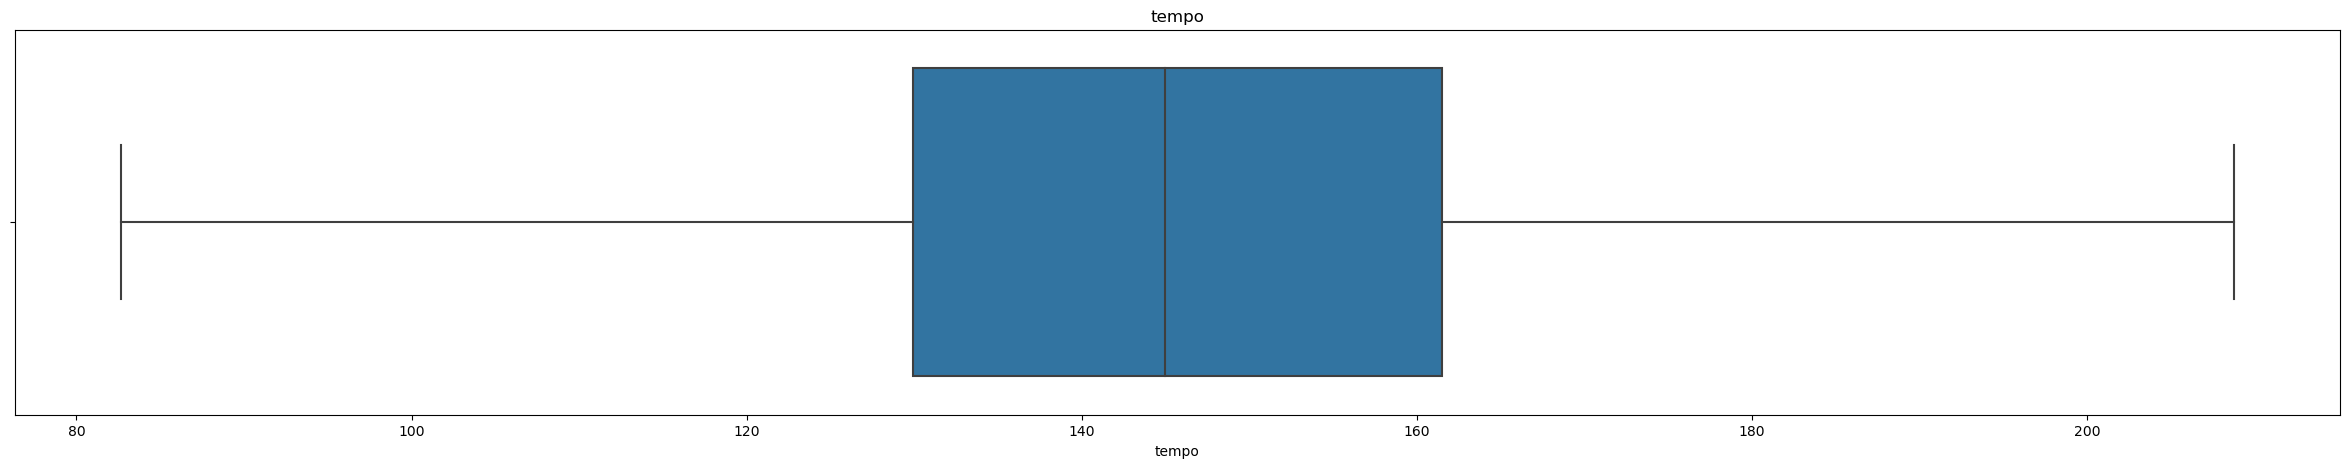

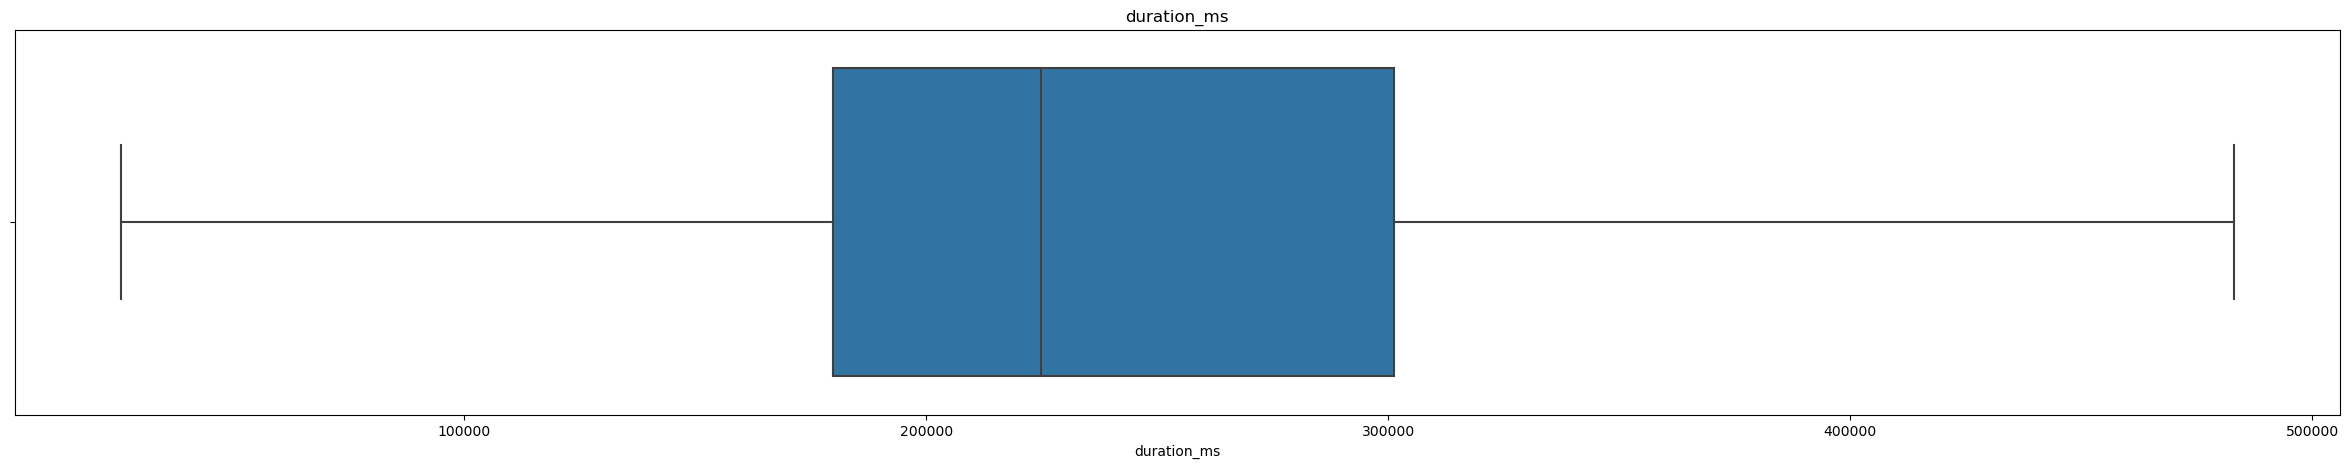

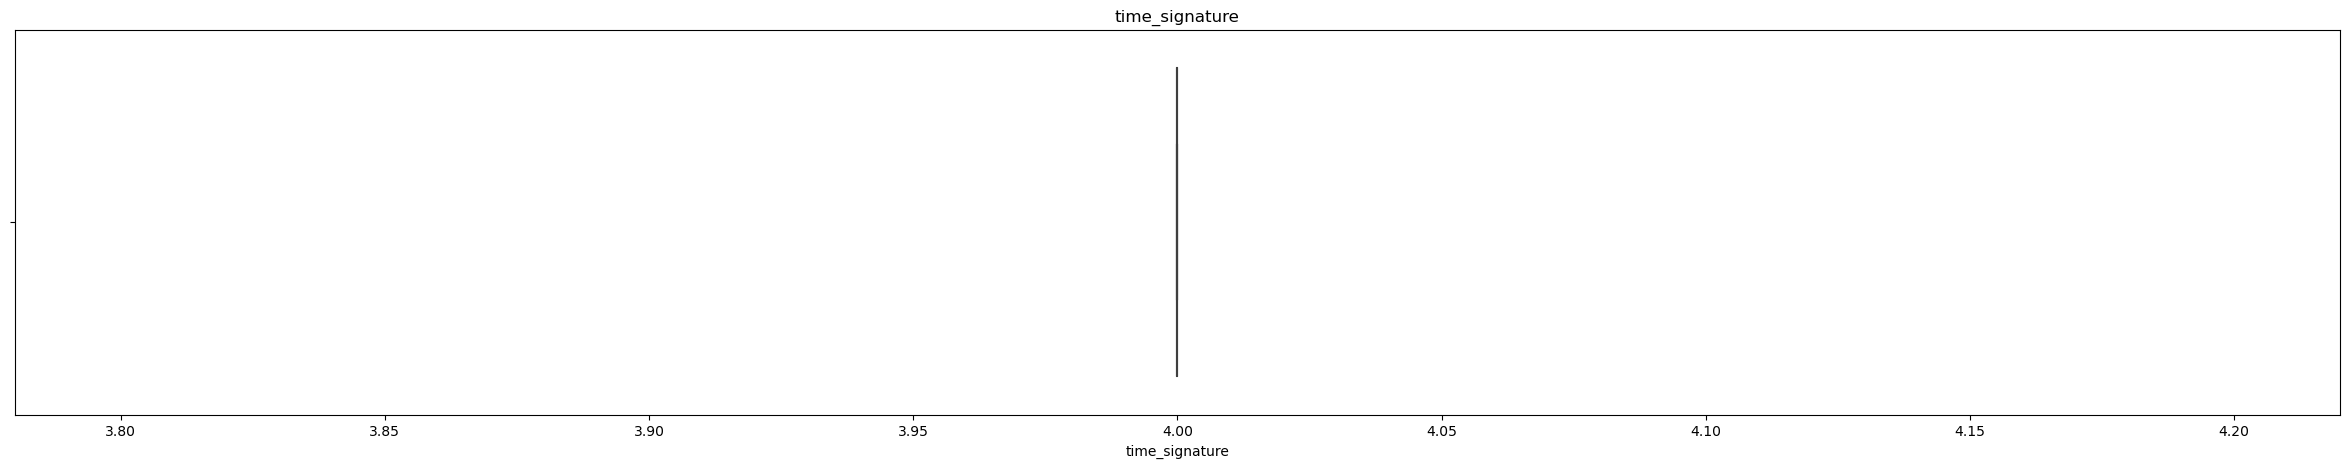

In [28]:
# After removing outliers

for column in data.columns[:-1]:
    plt.figure(figsize = (30, 5))
    sns.boxplot(data = data, x = column)
    plt.title(f"{column}")

C:\Users\HP\AppData\Local\Temp\ipykernel_1080\735391162.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 10))
C:\Users\HP\AppData\Local\Temp\ipykernel_1080\735391162.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = data, x = column, hue = "genre", kind = "kde", legend = True, palette = "cubehelix")


<Figure size 1000x1000 with 0 Axes>

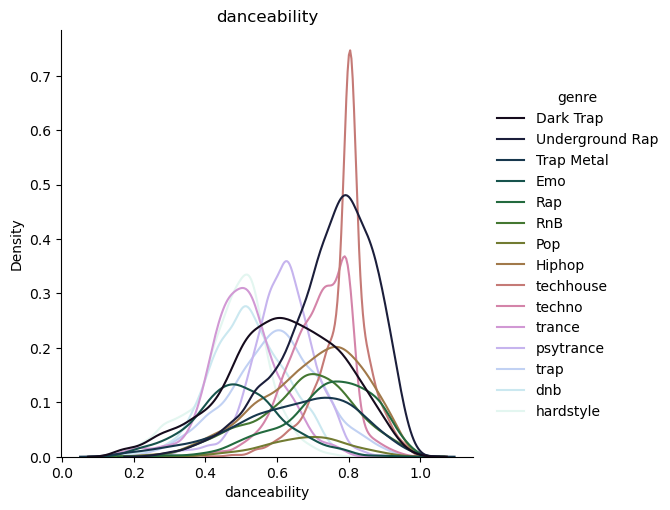

<Figure size 1000x1000 with 0 Axes>

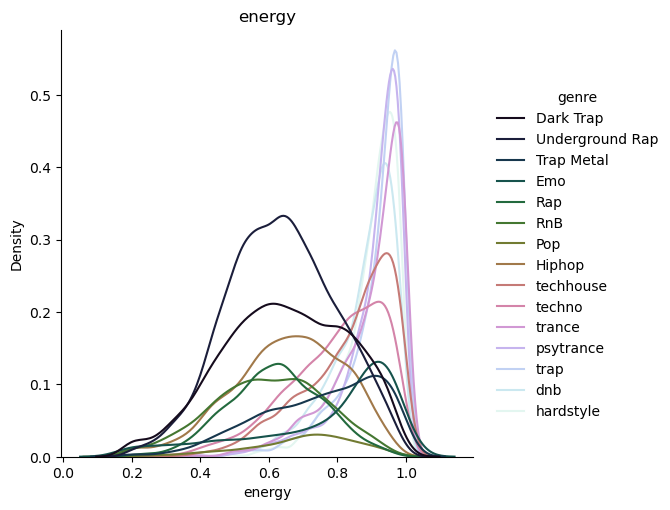

<Figure size 1000x1000 with 0 Axes>

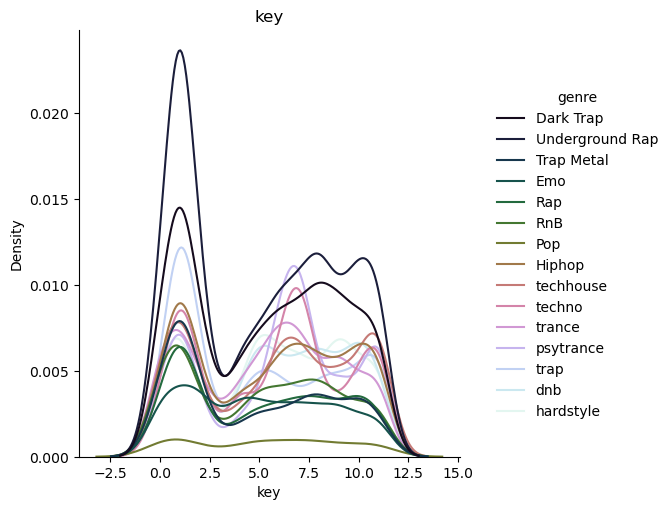

<Figure size 1000x1000 with 0 Axes>

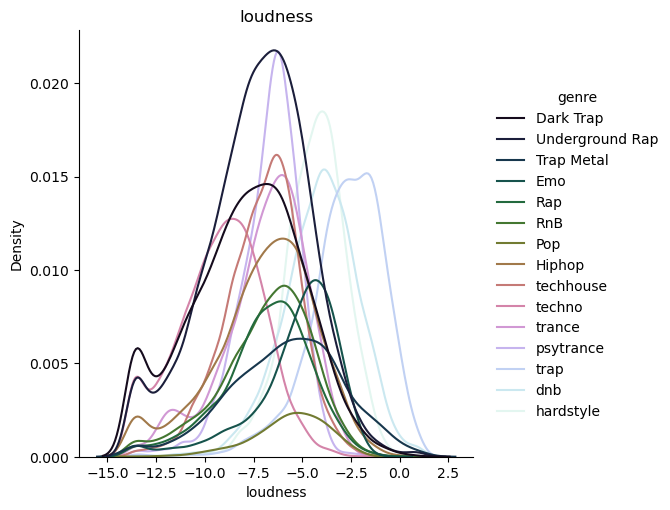

<Figure size 1000x1000 with 0 Axes>

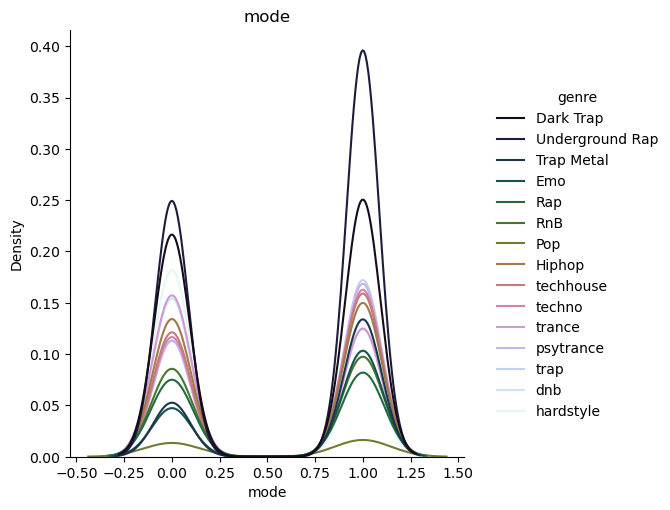

<Figure size 1000x1000 with 0 Axes>

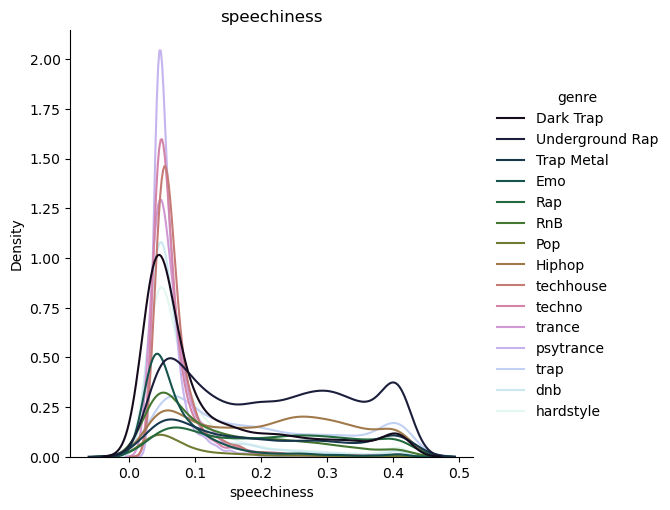

<Figure size 1000x1000 with 0 Axes>

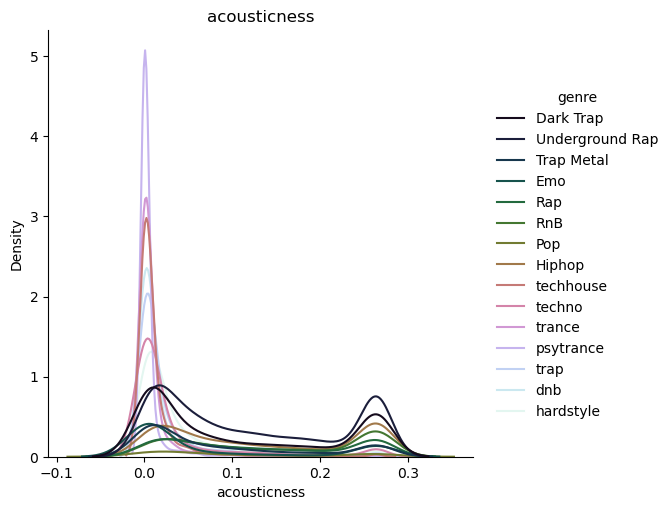

<Figure size 1000x1000 with 0 Axes>

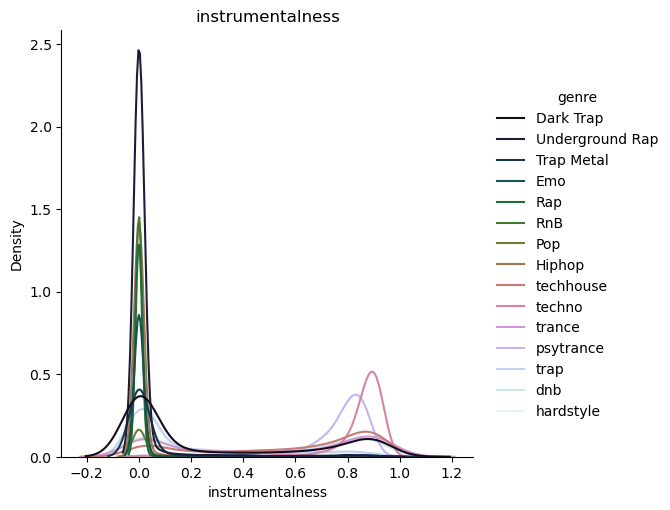

<Figure size 1000x1000 with 0 Axes>

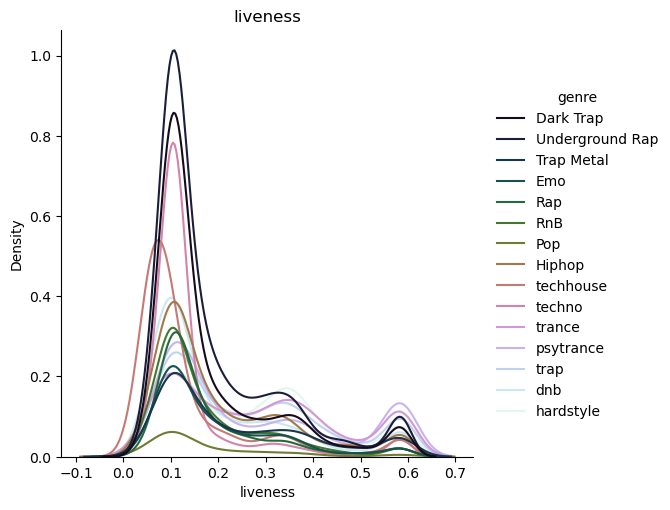

<Figure size 1000x1000 with 0 Axes>

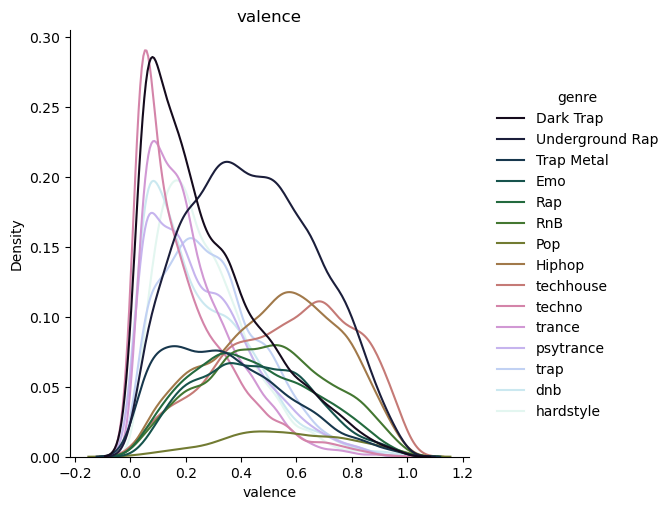

<Figure size 1000x1000 with 0 Axes>

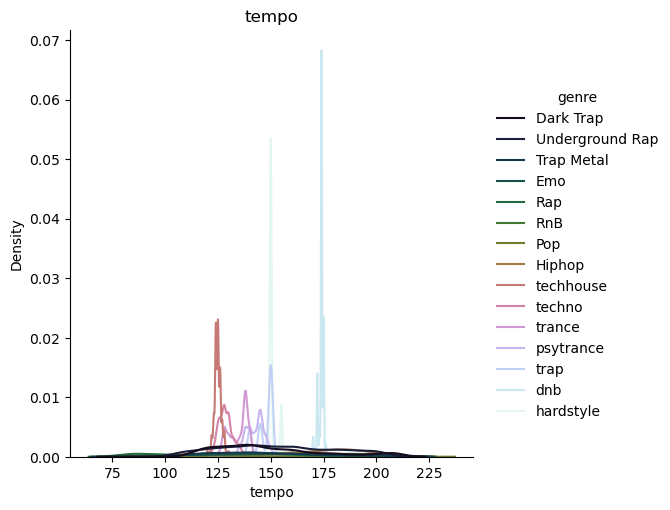

<Figure size 1000x1000 with 0 Axes>

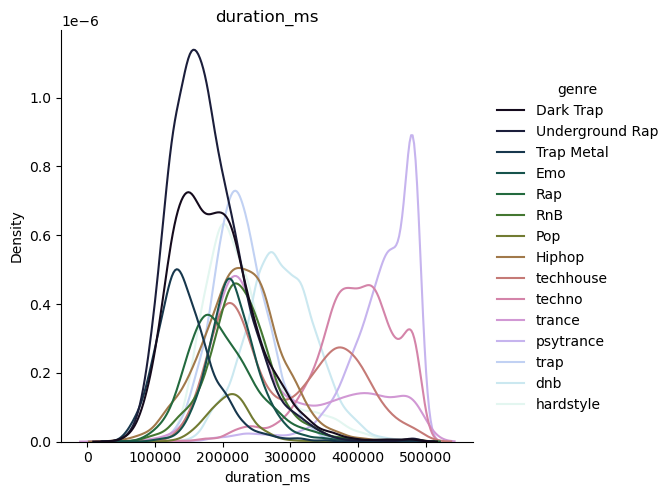

<Figure size 1000x1000 with 0 Axes>

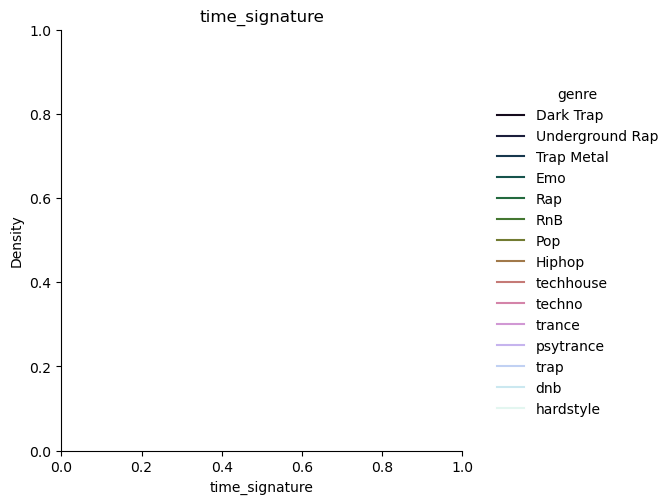

In [29]:
for column in data.columns[:-1]:
    plt.figure(figsize = (10, 10))
    sns.displot(data = data, x = column, hue = "genre", kind = "kde", legend = True, palette = "cubehelix")
    plt.title(f"{column}")

Songs count for all the genre's

In [30]:
# Songs count for all the genre's

genre_count = {}
for gen in np.unique(genre):
    genre_count[gen] = len(data[data['genre'] == gen])
genre_count

{'Dark Trap': 4578,
 'Emo': 1680,
 'Hiphop': 3028,
 'Pop': 461,
 'Rap': 1848,
 'RnB': 2099,
 'Trap Metal': 1956,
 'Underground Rap': 5875,
 'dnb': 2966,
 'hardstyle': 2936,
 'psytrance': 2961,
 'techhouse': 2975,
 'techno': 2956,
 'trance': 2999,
 'trap': 2987}

In [31]:
org_genre = data['genre']

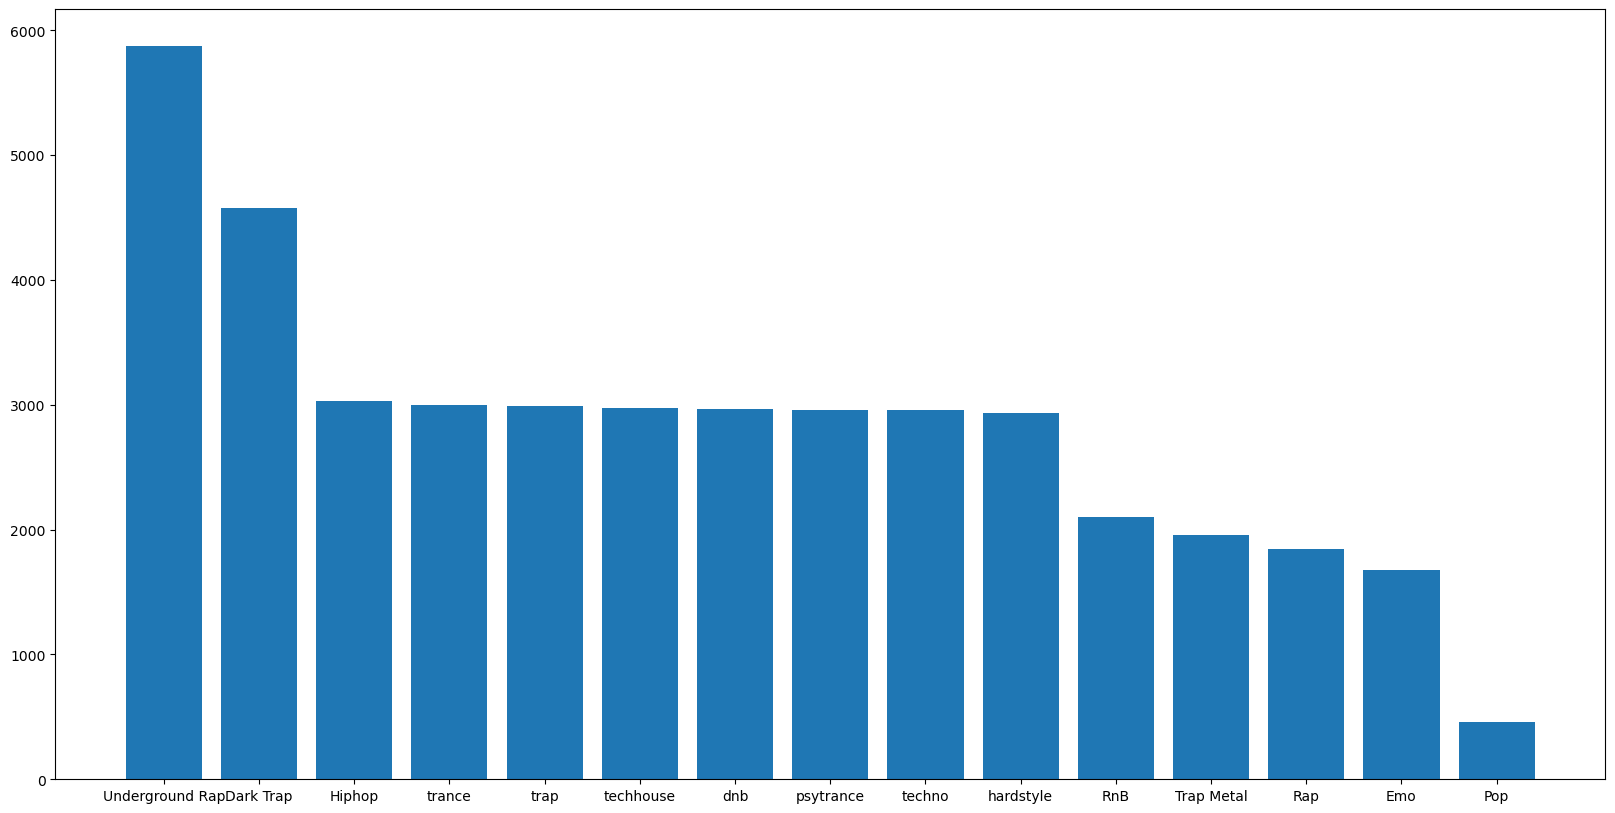

In [32]:
fig = plt.figure(figsize=(20,10))
plt.bar(height=data['genre'].value_counts().values,x=data['genre'].value_counts().index)
plt.show()

From the above bar graph it is clear that data is a bit imbalanced as there are less no.of pop songs and more no of underground and RapDark Trap

#### Correlation Analysis:-
Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis.

In [33]:
# Install the imbalanced package for sampling the dataset

pip install -U imbalanced-learn

SyntaxError: invalid syntax (963146484.py, line 3)

<Axes: >

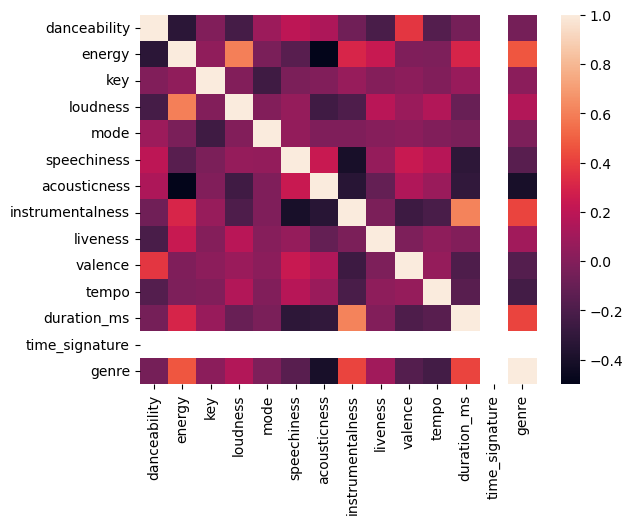

In [34]:
# Correlation Analysis

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import joblib

# Importing only the necessary functions from joblib can be useful if we only plan to use 
# those specific functions and want to avoid potential naming conflicts with other functions 
# or modules in your code.

data['genre'] = LabelEncoder().fit_transform(data['genre'])
corr = data.corr()
sns.heatmap(data=corr)

Finally selecting the most important features based on the correlation.

In [35]:
# Selecting the most important features

features = data.drop(['key','mode','time_signature','danceability','genre'],axis=1)
features

energy  loudness  speechiness  acousticness  instrumentalness  \
0       0.814    -7.364      0.40885      0.059800          0.013400   
1       0.493    -7.230      0.07940      0.264905          0.000000   
2       0.893    -4.783      0.06230      0.013800          0.000004   
3       0.781    -4.710      0.10300      0.023700          0.000000   
4       0.624    -7.668      0.29300      0.217000          0.000000   
...       ...       ...          ...           ...               ...   
42300   0.693    -5.148      0.03040      0.031500          0.000345   
42301   0.768    -7.922      0.04790      0.022500          0.000018   
42302   0.821    -3.102      0.05050      0.026000          0.000242   
42303   0.921    -4.777      0.03920      0.000551          0.029600   
42304   0.945    -5.862      0.06150      0.001890          0.000055   

       liveness  valence     tempo  duration_ms  
0        0.0556   0.3890  156.9850     124539.0  
1        0.1180   0.1240  115.0800     224427.0  
2        0.3720   0.0391  208.7635      98821.0  
3        0.1140   0.1750  186.9480     123661.0  
4        0.1660   0.5910  147.9880     123298.0  
...         ...      ...       ...          ...  
42300    0.1210   0.3940  150.0130     269208.0  
42301    0.2050   0.3830  149.9280     210112.0  
42302    0.3850   0.1240  154.9350     234823.0  
42303    0.0575   0.4880  150.0420     323200.0  
42304    0.4140   0.1340  155.0470     162161.0  

[42305 rows x 9 columns]

Performing feature scaling to normalize the values and saving the transform and separate independent and dependent variables.

In [37]:
labels = data['genre']

# Applying feature scaling
sc = StandardScaler()
features = sc.fit_transform(features)

joblib.dump(sc,"transform.save")
# The first argument, sc, represents the object that is being saved. 
# The second argument, "transform.save", is the file name or path where the serialized object 
# will be stored. By calling joblib.dump(sc, "transform.save"), the sc object is serialized and 
# written to the specified file.

# To handle imabalance in dataset perform oversampling
oversample = SMOTE()
features,labels= oversample.fit_resample(features,labels)


# Separating train(80%) adn test data(20%)
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,shuffle = True)

In [38]:
# Displaying the rows and columns of the selected features

features.shape

(88125, 9)

In [39]:
# data['genre'].iloc[36654] retrieves the value in the "genre" column at the 
# 36654th row (or position 36654).

data['genre'].iloc[36654]

8

In [40]:
xtrain.shape

(70500, 9)

# Model Building

#### 1. Random Forest Classifier:-

A random forest classifier is an ensemble machine learning algorithm that combines multiple decision trees to make predictions by aggregating their individual predictions, resulting in improved accuracy and robustness.

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

# Train the model on the training data
rf.fit(xtrain,ytrain)

# Test the model
predictions_rf=rf.predict(xtest)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Initialize a dictionary to store the evaluation metrics for each model
evaluation_metrics = {}

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(ytest, predictions_rf)
precision_rf = precision_score(ytest, predictions_rf, average='weighted')
recall_rf = recall_score(ytest, predictions_rf, average='weighted')
f1_rf = f1_score(ytest, predictions_rf, average='weighted')
confusion_rf = confusion_matrix(ytest, predictions_rf)

# Store the evaluation metrics in the dictionary
evaluation_metrics['Random Forest'] = {'Accuracy': accuracy_rf, 'Precision': precision_rf,
                                       'Recall': recall_rf, 'F1-score': f1_rf, 'Confusion Matrix': confusion_rf}

print("Evaluation results for Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:")
print(confusion_rf)

Evaluation results for Random Forest:
Accuracy: 0.7752624113475177
Precision: 0.767026169697102
Recall: 0.7752624113475177
F1-score: 0.7703012263637997
Confusion Matrix:
[[ 585   23   36   15   44   33  159  196   11   24    8   12    6   37
    26]
 [  20 1045   11   42   11   39   10    8    8   15    0    1    1   11
    10]
 [  46   23  698   25   69  117   20  121    3    2    0    2    1    2
     1]
 [   7   34   16 1106   11   15    1    7    0    1    0    4    0    6
     1]
 [  37    6   62   22  877   33   18  105    0    2    0    0    0    1
     2]
 [  28   36  118   59   61  814   12   51    3    1    0    4    0    2
     3]
 [ 111   15   19   10   28    6  809  148    3    8    0    3    0    4
    17]
 [ 197   24  197   23  174   80  219  279    1    3    0    1    0    1
     8]
 [   3    8    4    2    1    1    6    0 1143    0    0    0    0    0
     0]
 [   6    8    2    0    1    4    6    0    0 1074    8    0    0    0
    25]
 [   9    0    0    1    0    

In [56]:
 import joblib

# Assuming your trained model is stored in a variable called 'model'
joblib.dump(rf, 'model.pkl')


['model.pkl']

##### Classification Model:

We get the cross validation score for 10 splits and get the cross validation score and choose the best and build the model.

#### 2. Bagging Classifier:-

A bagging classifier is an ensemble learning algorithm that combines multiple base classifiers trained on different subsets of the training data through bootstrap aggregating (bagging) to improve prediction accuracy and reduce overfitting.

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,xtrain,ytrain, scoring='accuracy',\
                           cv=cv, n_jobs=-1,error_score='raise')

In [44]:
n_scores

array([0.7564539 , 0.75574468, 0.75276596, 0.75531915, 0.75304965,
       0.75347518, 0.75219858, 0.76042553, 0.76141844, 0.76014184,
       0.7577305 , 0.75248227, 0.75858156, 0.7612766 , 0.76056738,
       0.75801418, 0.75801418, 0.75574468, 0.75929078, 0.76496454,
       0.75687943, 0.7635461 , 0.75475177, 0.7564539 , 0.75460993,
       0.7564539 , 0.75985816, 0.75602837, 0.75375887, 0.76468085])

In [45]:
# Average cro
n_scores.mean()

0.7574893617021277

In [46]:
model = BaggingClassifier()
model.fit(xtrain,ytrain)
predictions_bag = model.predict(xtest)
predictions_bag

array([ 2,  2, 12, ...,  7,  2,  9])

In [47]:
# Accuracy of the model

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Evaluate the bagging classifier model
accuracy_bag = accuracy_score(ytest, predictions_bag)
precision_bag = precision_score(ytest, predictions_bag, average='weighted')
recall_bag = recall_score(ytest, predictions_bag, average='weighted')
f1_bag = f1_score(ytest, predictions_bag, average='weighted')
confusion_bag = confusion_matrix(ytest, predictions_bag)

# Store the evaluation metrics in the dictionary
evaluation_metrics['Bagging Classifier'] = {'Accuracy': accuracy_bag, 'Precision': precision_bag,
                                               'Recall': recall_bag, 'F1-score': f1_bag, 'Confusion Matrix': confusion_bag}

print("Evaluation results for Bagging Classifier model:")
print("Accuracy:", accuracy_bag)
print("Precision:", precision_bag)
print("Recall:", recall_bag)
print("F1-score:", f1_bag)
print("Confusion Matrix:")
print(confusion_bag)

Evaluation results for Bagging Classifier model:
Accuracy: 0.7622695035460992
Precision: 0.7561320439615442
Recall: 0.7622695035460992
F1-score: 0.7584949639062785
Confusion Matrix:
[[ 569   20   51   18   39   41  164  198    8   20    8   16    8   35
    20]
 [  20 1032   26   42   10   29    9   20    7   12    0    1    1   14
     9]
 [  50   33  667   36   70  118   26  117    3    5    1    1    0    1
     2]
 [  10   45   20 1071   10   23    3    5    1    3    0   13    0    4
     1]
 [  33    7   77   18  844   37   24  118    3    1    0    0    0    3
     0]
 [  30   36  135   65   66  786   13   52    0    0    0    4    0    2
     3]
 [ 126   12   19   11   24    4  804  148    1    7    0    2    0    4
    19]
 [ 197   26  204   27  160   83  212  288    0    3    0    1    0    1
     5]
 [   8   15    6    0    1    2    5    1 1130    0    0    0    0    0
     0]
 [   4    7    1    6    1    4    9    4    0 1052    9    0    0    0
    37]
 [   6    2    0  

#### 3. KNN Classifier:

K-nearest neighbors (KNN) classifier is a non-parametric algorithm that assigns a new data point's class label based on the majority vote of its K nearest neighbors in the feature space.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn=KNeighborsClassifier()

# Train the model on the training data
knn.fit(xtrain,ytrain)

# Test the model
predictions_knn=knn.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Evaluate the K-Nearest Neighbors model
accuracy_knn = accuracy_score(ytest, predictions_knn)
precision_knn = precision_score(ytest, predictions_knn, average='weighted')
recall_knn = recall_score(ytest, predictions_knn, average='weighted')
f1_knn = f1_score(ytest, predictions_knn, average='weighted')
confusion_knn = confusion_matrix(ytest, predictions_knn)

# Store the evaluation metrics in the dictionary
evaluation_metrics['K-Nearest Neighbors'] = {'Accuracy': accuracy_knn, 'Precision': precision_knn,
                                            'Recall': recall_knn, 'F1-score': f1_knn, 'Confusion Matrix': confusion_knn}
print("Evaluation results for KNN model:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("Confusion Matrix:")
print(confusion_knn)

Evaluation results for KNN model:
Accuracy: 0.7628936170212766
Precision: 0.746355581505097
Recall: 0.7628936170212766
F1-score: 0.7462164234826604
Confusion Matrix:
[[ 510   32   47   30   88   59  168   76   25   50    4   14   26   61
    25]
 [  12 1085   14   44    5   24    6    5    5   18    0    2    1    6
     5]
 [  35   41  720   46   70  122   34   38    6    2    1    7    0    6
     2]
 [   4   31   10 1148    7    5    1    2    0    0    0    1    0    0
     0]
 [  27   19   72    9  961   38   13   21    0    3    0    0    0    1
     1]
 [  23   35  119   64   68  838   10   20    0    2    0    7    0    4
     2]
 [  92   18   24   12   39   16  915   26    5   13    0    2    0    2
    17]
 [ 148   38  234   48  205  122  239  138    6   10    0    3    1    7
     8]
 [   3   12    4    3    5    2    4    0 1132    0    1    0    0    0
     2]
 [  14   14    0    7    0    7    5    0    0 1003   15    0    0   10
    59]
 [   1    1    0    0    1    0   

#### 4. Decision Tree Classifier:-

A decision tree classifier is a machine learning algorithm that recursively splits the data based on feature values to create a tree-like model for classification, where each internal node represents a feature test, each branch corresponds to a feature value, and each leaf node represents a class label.

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

# Train the model on the training data
df.fit(xtrain,ytrain)

# Test the model
predictions_dt=df.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(ytest, predictions_dt)
precision_dt = precision_score(ytest, predictions_dt, average='weighted')
recall_dt = recall_score(ytest, predictions_dt, average='weighted')
f1_dt = f1_score(ytest, predictions_dt, average='weighted')
confusion_dt = confusion_matrix(ytest, predictions_dt)

# Store the evaluation metrics in the dictionary
evaluation_metrics['Decision Tree'] = {'Accuracy': accuracy_dt, 'Precision': precision_dt,
                                       'Recall': recall_dt, 'F1-score': f1_dt, 'Confusion Matrix': confusion_dt}

print("Evaluation results for Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:")
print(confusion_dt)

Evaluation results for Decision Tree:
Accuracy: 0.7095035460992908
Precision: 0.7052083711587326
Recall: 0.7095035460992908
F1-score: 0.7070150410483474
Confusion Matrix:
[[ 509   25   60   24   59   41  174  176    7   18   13   14   12   44
    39]
 [  22  961   31   57   15   42   13   23   14   17    0    2    1   16
    18]
 [  62   21  588   38   78  132   41  157    7    1    0    0    0    1
     4]
 [  24   57   38  978   15   46    4   16    3    4    0   10    2   10
     2]
 [  51   14   92   25  753   51   40  126    0    3    0    1    1    3
     5]
 [  56   50  151   69   74  671   14   90    4    3    1    4    0    3
     2]
 [ 202   15   31   13   41   15  659  162    3    8    1    4    0    3
    24]
 [ 245   32  221   33  173   94  179  213    2    1    0    4    0    1
     9]
 [   5   11    1    2    4    5    7    2 1131    0    0    0    0    0
     0]
 [  14   19    1    1    5    4    4    2    0 1008   14    0    0    0
    62]
 [   6    0    0    1    2   

#### 5. Support Vector Classifier:-

A support vector classifier (SVC) is a supervised machine learning algorithm that constructs an optimal hyperplane to separate different classes by maximizing the margin between the closest data points from each class.

In [52]:
from sklearn.svm import SVC

# Create an SVM classifier
model_svm = SVC()

# Train the model on the training data
model_svm.fit(xtrain, ytrain)

# Test the model
predictions_svm=model_svm.predict(xtest)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Evaluate the Support Vector Machine model
accuracy_svm = accuracy_score(ytest, predictions_svm)
precision_svm = precision_score(ytest, predictions_svm, average='weighted')
recall_svm = recall_score(ytest, predictions_svm, average='weighted')
f1_svm = f1_score(ytest, predictions_svm, average='weighted')
confusion_svm = confusion_matrix(ytest, predictions_svm)

# Store the evaluation metrics in the dictionary
evaluation_metrics['Support Vector Machine'] = {'Accuracy': accuracy_svm, 'Precision': precision_svm,
                                               'Recall': recall_svm, 'F1-score': f1_svm, 'Confusion Matrix': confusion_svm}

print("Evaluation results for SVM model:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("Confusion Matrix:")
print(confusion_svm)

Evaluation results for SVM model:
Accuracy: 0.6644539007092198
Precision: 0.6595597030590091
Recall: 0.6644539007092198
F1-score: 0.6586490294958279
Confusion Matrix:
[[ 477   29   23   31   71   42  207  147   23   47    5   21   11   52
    29]
 [  21  750   22  174   37   76    9   18   18   59    1   10    1   21
    15]
 [  45   35  513   98  133  153   38   84   13    3    0    4    1    4
     6]
 [  16  130   58  795   53   86   11   20    0   15    0   13    0   11
     1]
 [  37   16   59   58  753   77   56   94    2    7    0    0    0    0
     6]
 [  25   68  170  223  147  454   28   60    3    0    0    8    0    3
     3]
 [  95   24   12   25   83    5  758  119    4   19    0    2    0    5
    30]
 [ 101   13  160   61  238   69  243  293    5    9    0    5    0    5
     5]
 [   3   33    9    3    0    5    7    0 1108    0    0    0    0    0
     0]
 [  10   29    3    9    0    4   10    0    0  968   17    0    0    0
    84]
 [   4    0    0    0    1    0  

###### So from the above models, we can say that the Random Forest Classifier has the highest accuracy of 77.9% ,next  Bagging and KNN classifier has almost same accuracy of 76% , Decision tree Classifier of 71.4%, and the least   is Support Vector Classifier, having a accuracy of 66.4%. 